In [1]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
canada = pd.read_csv('datasets/CAvideos.csv')
germany = pd.read_csv('datasets/DEvideos.csv')
france = pd.read_csv('datasets/FRvideos.csv')
uk = pd.read_csv('datasets/GBvideos.csv')
india = pd.read_csv('datasets/INvideos.csv')
japan = pd.read_csv('datasets/JPvideos.csv', engine='python')
korea = pd.read_csv('datasets/KRvideos.csv', engine='python')
mexico = pd.read_csv('datasets/MXvideos.csv', engine='python')
russia = pd.read_csv('datasets/RUvideos.csv', engine='python')
us = pd.read_csv('datasets/USvideos.csv')

In [3]:
#Function that reads json file and returns dictionary with category id as key and category title as value
def read_json_files(filename):
    json = pd.read_json(filename)
    Dict = {}
    for item in json['items']: 

        category_id = item['id']
        category = item['snippet']['title']
        Dict[category_id] = category
        #Replace categories 'Movies' and 'Trailers' with Film & Animation, as there are only a few of those
        if(category == 'Movies' or category == 'Trailers'):
            Dict[category_id] = 'Film & Animation'
        else:
            Dict[category_id] = category
        
    #check if category id 29 exists in dict - for some regions this id is missing in the json file for some reason
    if not('29' in Dict):
        Dict['29'] = 'Nonprofits & Activism'
        
    return Dict


In [4]:
def clean_data(df, json_file):

    df_clean = df.copy()
    df_clean = df_clean.drop(['thumbnail_link'], axis=1)

    #change the type of date columns from object to datetime64[ns] to be able to change the formatting
    #publish time - timezone is UTC - coordinated universal time
    df_clean['trending_date'] = pd.to_datetime(df_clean['trending_date'], format = '%y.%d.%m')
    df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%f%z')

    #change the formatting of date columns
    df_clean['trending_date'] = df_clean['trending_date'].dt.strftime('%Y-%m-%d').astype('datetime64[ns]')
    df_clean['publish_time'] = df_clean['publish_time'].dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    #cleaning up tags column
    #replaces |" (first tag is not enclosed with "") and "|" with ',' and removes last trailing character "
    df_clean['tags'] = df_clean['tags'].replace(to_replace='"\|"|\|"',value=',', regex=True).str.rstrip('"')
    
    #replace the value [none] in tags column with NaN
    df_clean['tags'].replace('[none]', np.nan, inplace=True)
    
    #replace value 'Deleted video' in title column with NaN
    df_clean['title'].replace('Deleted video', np.nan, inplace=True)
    
    #create dictionary of category id's and values
    category_dict = read_json_files(json_file)

    #change category_id type to string and rename column
    df_clean['category_id'] = df_clean['category_id'].astype(str)
    df_clean = df_clean.rename(columns={'category_id':'category'})

    #replace id's with category name
    df_clean['category'] = df_clean['category'].apply(category_dict.get)
    
    return df_clean



In [5]:
canada_clean = clean_data(canada, 'datasets/CA_category_id.json')
germany_clean = clean_data(germany, 'datasets/DE_category_id.json')
france_clean = clean_data(france, 'datasets/FR_category_id.json')
uk_clean = clean_data(uk, 'datasets/GB_category_id.json')
india_clean = clean_data(india, 'datasets/IN_category_id.json')
japan_clean = clean_data(japan, 'datasets/JP_category_id.json')
korea_clean = clean_data(korea, 'datasets/KR_category_id.json')
mexico_clean = clean_data(mexico, 'datasets/MX_category_id.json')
russia_clean = clean_data(russia, 'datasets/RU_category_id.json')
us_clean = clean_data(us, 'datasets/US_category_id.json')


In [6]:
#canada_clean.head()
#germany_clean.head()
#france_clean.head()
#uk_clean.head()
#india_clean.head()
#japan_clean.head()
#korea_clean.head()
#mexico_clean.head()
#russia_clean.head()
#us_clean.head()

In [7]:
ca = canada_clean.copy()
ca['country'] = 'Canada'

de = germany_clean.copy()
de['country'] = 'Germany'

fr = france_clean.copy()
fr['country'] = 'France'

gb = uk_clean.copy()
gb['country'] = 'Great Britain'

ind = india_clean.copy()
ind['country'] = 'India'

jp = japan_clean.copy()
jp['country'] = 'Japan'

kr = korea_clean.copy()
kr['country'] = 'Korea'

mx = mexico_clean.copy()
mx['country'] = 'Mexico'

ru = russia_clean.copy()
ru['country'] = 'Russia'

usa = us_clean.copy()
usa['country'] = 'USA'

all_data = pd.concat([ca, de, fr, gb, ind, jp, kr, mx, ru, usa])
all_data.reset_index(drop=True, inplace=True)

#check videos where video id = #VALUE!
all_data[all_data['video_id'] == '#VALUE!']

idx1 = [182059, 182255, 182473, 182710]
idx2 = [183801, 184007, 184282]

#Replace the id of same videos with AA or BB - these id's are not present in the dataset
for i in range(len(idx1)):
    all_data.loc[idx1[i], 'video_id'] = 'AA'
    
for i in range(len(idx2)):
    all_data.loc[idx2[i], 'video_id'] = 'BB'
    
all_data[all_data['video_id'] == '#VALUE!']


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country
182059,#VALUE!,2018-03-09,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,Rahasya,Education,2018-03-08 07:03:27,"myth,facts,top interesting facts,most interest...",68027,4963,169,477,False,False,False,FOLLOW US ON FACEBOOK : https://goo.gl/UhDWrn\...,India
182255,#VALUE!,2018-03-10,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,Rahasya,Education,2018-03-08 07:03:27,"myth,facts,top interesting facts,most interest...",143872,6914,297,540,False,False,False,FOLLOW US ON FACEBOOK : https://goo.gl/UhDWrn\...,India
182473,#VALUE!,2018-03-11,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,Rahasya,Education,2018-03-08 07:03:27,"myth,facts,top interesting facts,most interest...",233118,8381,400,624,False,False,False,FOLLOW US ON FACEBOOK : https://goo.gl/UhDWrn\...,India
182710,#VALUE!,2018-03-12,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,Rahasya,Education,2018-03-08 07:03:27,"myth,facts,top interesting facts,most interest...",258163,8991,430,640,False,False,False,FOLLOW US ON FACEBOOK : https://goo.gl/UhDWrn\...,India
183801,#VALUE!,2018-03-19,FARZAND | Official Teaser | Upcoming Marathi M...,Rajshri Marathi,Entertainment,2018-03-18 04:30:00,"Farzand,Marathi Movie Farzand,Marathi Movie 20...",111087,3513,65,183,False,False,False,Watch the official teaser of upcoming Marathi ...,India
184007,#VALUE!,2018-03-20,FARZAND | Official Teaser | Upcoming Marathi M...,Rajshri Marathi,Entertainment,2018-03-18 04:30:00,"Farzand,Marathi Movie Farzand,Marathi Movie 20...",156320,4299,93,230,False,False,False,Watch the official teaser of upcoming Marathi ...,India
184282,#VALUE!,2018-03-21,FARZAND | Official Teaser | Upcoming Marathi M...,Rajshri Marathi,Entertainment,2018-03-18 04:30:00,"Farzand,Marathi Movie Farzand,Marathi Movie 20...",206364,4930,111,252,False,False,False,Watch the official teaser of upcoming Marathi ...,India


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country


In [8]:
#Find all videos where video_id is #NAME?, find which of these videos are the same videos (by comparing channel title 
#and published time) and replace them with custom id

#Video-id is not important in itself, important thing is to separate unique videos

id_counter = 1

#.copy() is necessary to avoid SettingwithCopyWarning error
data_to_correct = all_data[all_data.video_id == '#NAME?'].copy()
    

while not data_to_correct.empty:
    #take the first item from data_to_correct, find indexes where the channel and published time is the same as in the first video
    idx = data_to_correct.index[(data_to_correct['channel_title'] == data_to_correct.iloc[0].channel_title) & (data_to_correct['publish_time'] == data_to_correct.iloc[0].publish_time)]
  
    #replace video_id in original data with generated id
    #delete the row from data_to_correct
    for i in range(len(idx)):
        all_data.loc[idx[i], 'video_id'] = str(id_counter)
        data_to_correct.drop(idx[i], inplace=True)
        
    #when we have replaced the id of the same videos, we can increase the id
    id_counter += 1
        

In [9]:
#check newly created id-s

#pd.set_option('display.max_rows', 2320)
#all_data[all_data['video_id'].apply(lambda x: len(x)<11)].sort_values('video_id')
pd.set_option('display.max_rows', 50)

In [10]:
#For some reason there are 13230 rows where the video id, trending date and country are the same - seems that somehow there are
#duplicates in the code. We need to find them and remove them (keep the first occurance)
all_data.shape

all_data = all_data.drop_duplicates(subset=['video_id', 'trending_date', 'country'], keep='first')

all_data.shape

(375942, 16)

(362712, 16)

In [11]:
import matplotlib.pyplot as plt

# allows to output plots in the notebook
%matplotlib inline 

# Set the default style
plt.style.use("ggplot")

In [12]:
sorted_data = all_data.sort_values(by=["video_id", "trending_date"])
sorted_data["time_to_trending"] = sorted_data.trending_date.dt.date - sorted_data.publish_time.dt.date
# This is a bit of a hack so that we could find the maximum and minimum time between trending_date and publish time in the next step
sorted_data["trending_time"] = sorted_data.trending_date.dt.date - sorted_data.publish_time.dt.date
sorted_data["first_day_views"] = sorted_data.views
sorted_data["last_day_views"] = sorted_data.views

In [13]:
sorted_data.head(20)

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,time_to_trending,trending_time,first_day_views,last_day_views
271137,--1skHapGUc,2018-02-10,"SI TE RÍES, PIERDES (NIVEL ASIÁTICO) #51 Los M...",TheChacal547,Entertainment,2018-02-09 19:04:43,"Videos de Risa,Si te ries pierdes,videos graci...",30914,483,77,81,False,False,False,"Video para partirse de risa! pero cuidado, int...",Mexico,1 days,1 days,30914,30914
103777,--2K8l6BWfw,2018-03-06,La Relève #2 : Jessica Rodrigues,Georgette Mag,Pets & Animals,2018-03-05 13:37:34,"Jessica Rodrigues,jumping,horse,cheval,poney,C...",4822,694,4,34,False,False,False,Retrouve-nous sur ➼ http://www.georgettemag.co...,France,1 days,1 days,4822,4822
40319,--45ws7CEN0,2018-06-12,PlayStation E3 2018 Showcase | English,PlayStation Europe,Gaming,2018-06-12 03:11:18,"playstation,playstation 4,playstation europe,p...",309197,3837,516,278,False,False,False,Show starts at 1:13:20.E3 2018 has arrived. Jo...,Canada,0 days,0 days,309197,309197
293775,--45ws7CEN0,2018-06-12,PlayStation E3 2018 Showcase | English,PlayStation Europe,Gaming,2018-06-12 03:11:18,"playstation,playstation 4,playstation europe,p...",309197,3837,516,278,False,False,False,Show starts at 1:13:20.E3 2018 has arrived. Jo...,Mexico,0 days,0 days,309197,309197
334525,--45ws7CEN0,2018-06-12,PlayStation E3 2018 Showcase | English,PlayStation Europe,Gaming,2018-06-12 03:11:18,"playstation,playstation 4,playstation europe,p...",309197,3837,516,278,False,False,False,Show starts at 1:13:20.E3 2018 has arrived. Jo...,Russia,0 days,0 days,309197,309197
279147,--6vcer7XYQ,2018-03-23,La Rosa de Guadalupe El Corsario Parte 2-2,linkerter pluss,Entertainment,2018-03-23 04:16:06,#LaRosadeGuadalupe,15435,148,12,33,False,False,False,#LaRosadeGuadalupe\n#LaRosadeGuadalupeCapitulo...,Mexico,0 days,0 days,15435,15435
279341,--6vcer7XYQ,2018-03-24,La Rosa de Guadalupe El Corsario Parte 2-2,linkerter pluss,Entertainment,2018-03-23 04:16:06,#LaRosadeGuadalupe,288113,1626,218,272,False,False,False,#LaRosadeGuadalupe\n#LaRosadeGuadalupeCapitulo...,Mexico,1 days,1 days,288113,288113
279623,--6vcer7XYQ,2018-03-25,La Rosa de Guadalupe El Corsario Parte 2-2,linkerter pluss,Entertainment,2018-03-23 04:16:06,#LaRosadeGuadalupe,414012,2161,331,416,False,False,False,#LaRosadeGuadalupe\n#LaRosadeGuadalupeCapitulo...,Mexico,2 days,2 days,414012,414012
86143,--728h8mnDY,2017-12-06,Rösti - YouCook,YouCook Cuisine,Howto & Style,2017-12-05 16:30:00,"YouCook,cuisine,recette,europe de l'ouest,15mi...",28666,2108,42,171,False,False,False,Les meilleures choses dans la vie sont les plu...,France,1 days,1 days,28666,28666
86417,--728h8mnDY,2017-12-07,Rösti - YouCook,YouCook Cuisine,Howto & Style,2017-12-05 16:30:00,"YouCook,cuisine,recette,europe de l'ouest,15mi...",39535,2573,51,269,False,False,False,Les meilleures choses dans la vie sont les plu...,France,2 days,2 days,39535,39535


In [14]:
# Group videos by titles (find unique videos) and create a dataframe of results
# There are two trending times: max and min difference between trending_date and publish_time
unique_videos = sorted_data.groupby(["video_id", "title", "channel_title", "category", "publish_time", "country"], as_index=False).agg({"trending_date": min, "time_to_trending": min, "trending_time": max, "first_day_views": "first", "last_day_views": "last"})

# Difference between max and min trending time is how long the video was in the trending page
# Add 1 day to all trending durations (if the video was trending on 2 days, then trending time will be 2 instead of 1)
unique_videos["trending_time"] = unique_videos["trending_time"] - unique_videos["time_to_trending"] + pd.Timedelta("1 day")

In [15]:
# Since this gives more than 10 (nr of countries) rows for some video ids, then some additional grouping must be done.
# See videos with video ids below for more info
unique_videos.video_id.value_counts()

FeRi86DcfyA    16
qUmfriZoMw0    13
tjA7nAHOAww    12
4xTpw-05J0k    11
Jz50eTT6y8g    11
u9Mv98Gr5pY    10
iWZmdoY1aTE    10
_y2-Aj53sxw    10
_I_D_8Z4sJE    10
ogfYd705cRs    10
DkeiKbqa02g    10
OrnpSe4OChM    10
XiHiW4N7-bo    10
elwTgpHlty0    10
pVxOVlm_lE8    10
g4Hbz2jLxvQ    10
9_LIP7qguYw    10
tCXGJQYZ9JA    10
D_6QmL6rExk     9
SCq8n_hOcN8     9
NooW_RbfdWI     9
HI-mXMr8glQ     9
FlsCjmMhFmw     9
p8npDG2ulKQ     9
QwievZ1Tx-8     9
               ..
JEDpmUVKfM8     1
LoA5IK2H5Sg     1
7L5FAHRfdaY     1
kVzWc5dUkQ8     1
OEaR96sONQI     1
eRWfjm41tz0     1
670             1
qKoPFEj9_6A     1
ubTWqVHk7Vg     1
a0JTlgQQk8Q     1
1178            1
GMd6Vc5PG7Q     1
4XmIjt0BDLo     1
b1yxCAIAIA4     1
JOEUhU5UeoA     1
_nseL5ucoC0     1
sYfyM6rhg-4     1
iEXpNw0VRcM     1
Mi4Pdl3Dk_U     1
Drcnkyf45bA     1
mOWp3aA95Lg     1
MY6CUF8PGFc     1
TBTRpuKFg-g     1
OI0Wipkxlyg     1
wPA9hr5bBGc     1
Name: video_id, Length: 185754, dtype: int64

In [16]:
unique_videos.head(20)

,video_id,title,channel_title,category,publish_time,country,first_day_views,time_to_trending,last_day_views,trending_time,trending_date
0,--1skHapGUc,"SI TE RÍES, PIERDES (NIVEL ASIÁTICO) #51 Los M...",TheChacal547,Entertainment,2018-02-09 19:04:43,Mexico,30914,1 days,30914,1 days,2018-02-10
1,--2K8l6BWfw,La Relève #2 : Jessica Rodrigues,Georgette Mag,Pets & Animals,2018-03-05 13:37:34,France,4822,1 days,4822,1 days,2018-03-06
2,--45ws7CEN0,PlayStation E3 2018 Showcase | English,PlayStation Europe,Gaming,2018-06-12 03:11:18,Canada,309197,0 days,309197,1 days,2018-06-12
3,--45ws7CEN0,PlayStation E3 2018 Showcase | English,PlayStation Europe,Gaming,2018-06-12 03:11:18,Mexico,309197,0 days,309197,1 days,2018-06-12
4,--45ws7CEN0,PlayStation E3 2018 Showcase | English,PlayStation Europe,Gaming,2018-06-12 03:11:18,Russia,309197,0 days,309197,1 days,2018-06-12
5,--6vcer7XYQ,La Rosa de Guadalupe El Corsario Parte 2-2,linkerter pluss,Entertainment,2018-03-23 04:16:06,Mexico,15435,0 days,414012,3 days,2018-03-23
6,--728h8mnDY,Rösti - YouCook,YouCook Cuisine,Howto & Style,2017-12-05 16:30:00,France,28666,1 days,39535,2 days,2017-12-06
7,--7vNbh4UNA,"Responding to ALL The Outrage, Ridiculous H3H3...",Philip DeFranco,News & Politics,2018-04-13 19:00:00,Canada,1082647,1 days,1335225,3 days,2018-04-14
8,--7vNbh4UNA,"Responding to ALL The Outrage, Ridiculous H3H3...",Philip DeFranco,News & Politics,2018-04-13 19:00:00,Germany,1082647,1 days,1082647,1 days,2018-04-14
9,--8-sr76Haw,DEMENAGEMENT DU BUREAU ! NOUVEAU STUDIO !,Collins Kosuke,Gaming,2018-05-08 14:46:11,France,6980,1 days,6980,1 days,2018-05-09


In [17]:
# Do some additional grouping to account for the fact that some videos had changed titles/categories or had been published multiple times
unique_videos = unique_videos.groupby(["video_id", "country"], as_index=False).agg({"title": "first", "publish_time": "first", "category": "last", "trending_date": min, "time_to_trending": min, "trending_time": max, "channel_title": "last", "first_day_views": "first", "last_day_views": "last"})
unique_videos.video_id.value_counts()

tCXGJQYZ9JA    10
g4Hbz2jLxvQ    10
pVxOVlm_lE8    10
XiHiW4N7-bo    10
DkeiKbqa02g    10
u9Mv98Gr5pY    10
tjA7nAHOAww    10
OrnpSe4OChM    10
iWZmdoY1aTE    10
7C2z4GqqS5E     9
MFWF9dU5Zc0     9
4uTNVumfm84     9
CX11yw6YL1w     9
elwTgpHlty0     9
QwievZ1Tx-8     9
dzxFdtWmjto     9
WS7f5xpGYn8     9
UUkn-enk2RU     9
Wpm07-BGJnE     9
aJOTlE1K90k     9
VY1eFxgRR-k     9
1FJD7jZqZEk     9
ad_higXixRA     9
kX0vO4vlJuU     9
aj8mN_7Apcw     9
               ..
KBeH9AYhRIc     1
WAUH99XjCXE     1
Vm06mkwzk9U     1
482             1
1mbipaET4sM     1
UuWYNdYWxY4     1
NAE8laqkdKo     1
MfGpfdHQOVM     1
BiYOAvST3AE     1
z2gEkdPZOM8     1
fEXJ8Qe8hJM     1
Z5LgowkBioM     1
-2g4CBUTP5A     1
DF5dAeJepTI     1
PufdeZ9F-Y0     1
Pgd_Tgi-pbQ     1
PzL_5SV0asg     1
Zo-lKoI5U8E     1
TYp6yn8mv8Q     1
UF3jJ4dX6CA     1
_h0WPboYHfU     1
RaCZBLQEnEc     1
C9Wi5KlT1jE     1
W0sv1WE7W74     1
wPA9hr5bBGc     1
Name: video_id, Length: 185754, dtype: int64

In [18]:
unique_videos.trending_time.value_counts()

1 days     144387
2 days      37983
3 days      12677
4 days       4910
5 days       2417
6 days       1264
7 days        958
8 days        533
9 days        419
11 days       365
12 days       340
13 days       334
10 days       330
14 days       279
15 days       175
16 days       128
17 days       120
18 days        99
20 days        95
19 days        83
21 days        74
36 days        73
22 days        62
23 days        54
28 days        49
24 days        48
25 days        45
37 days        44
27 days        42
35 days        41
26 days        40
29 days        39
30 days        30
34 days        27
31 days        27
32 days        25
33 days        25
38 days         3
Name: trending_time, dtype: int64

In [19]:
unique_videos.head(20)

,video_id,country,channel_title,time_to_trending,trending_time,category,title,last_day_views,publish_time,first_day_views,trending_date
0,--1skHapGUc,Mexico,TheChacal547,1 days,1 days,Entertainment,"SI TE RÍES, PIERDES (NIVEL ASIÁTICO) #51 Los M...",30914,2018-02-09 19:04:43,30914,2018-02-10
1,--2K8l6BWfw,France,Georgette Mag,1 days,1 days,Pets & Animals,La Relève #2 : Jessica Rodrigues,4822,2018-03-05 13:37:34,4822,2018-03-06
2,--45ws7CEN0,Canada,PlayStation Europe,0 days,1 days,Gaming,PlayStation E3 2018 Showcase | English,309197,2018-06-12 03:11:18,309197,2018-06-12
3,--45ws7CEN0,Mexico,PlayStation Europe,0 days,1 days,Gaming,PlayStation E3 2018 Showcase | English,309197,2018-06-12 03:11:18,309197,2018-06-12
4,--45ws7CEN0,Russia,PlayStation Europe,0 days,1 days,Gaming,PlayStation E3 2018 Showcase | English,309197,2018-06-12 03:11:18,309197,2018-06-12
5,--6vcer7XYQ,Mexico,linkerter pluss,0 days,3 days,Entertainment,La Rosa de Guadalupe El Corsario Parte 2-2,414012,2018-03-23 04:16:06,15435,2018-03-23
6,--728h8mnDY,France,YouCook Cuisine,1 days,2 days,Howto & Style,Rösti - YouCook,39535,2017-12-05 16:30:00,28666,2017-12-06
7,--7vNbh4UNA,Canada,Philip DeFranco,1 days,3 days,News & Politics,"Responding to ALL The Outrage, Ridiculous H3H3...",1335225,2018-04-13 19:00:00,1082647,2018-04-14
8,--7vNbh4UNA,Germany,Philip DeFranco,1 days,1 days,News & Politics,"Responding to ALL The Outrage, Ridiculous H3H3...",1082647,2018-04-13 19:00:00,1082647,2018-04-14
9,--8-sr76Haw,France,Collins Kosuke,1 days,1 days,Gaming,DEMENAGEMENT DU BUREAU ! NOUVEAU STUDIO !,6980,2018-05-08 14:46:11,6980,2018-05-09


In [20]:
print("Average time until a video trends is:", unique_videos.time_to_trending.mean())
print("Median time until a video trends is:", unique_videos.time_to_trending.median())
print("Average time a video stays in trending is:", unique_videos.trending_time.mean())
print("Median time a video stays in trending is:", unique_videos.trending_time.median())

Average time until a video trends is: 3 days 05:40:23.534824
Median time until a video trends is: 1 days 00:00:00
Average time a video stays in trending is: 1 days 18:00:50.106401
Median time a video stays in trending is: 1 days 00:00:00


In [21]:
countries = ["Canada", "Germany", "Great Britain", "France", "USA", "India", "Japan", "Korea", "Mexico", "Russia"]
country_stats = pd.DataFrame({"Country": countries})

,Country,average_time_to_trending,median_time_to_trending,average_time_in_trending,median_time_in_trending
0,Canada,2 days 21:00:46.883446,1 days,1 days 16:01:36.715537,1 days
1,Germany,1 days 13:39:36.422928,1 days,1 days 08:58:02.600769,1 days
2,Great Britain,36 days 20:36:40.488997,2 days,12 days 11:05:25.672371,10 days
3,France,2 days 19:25:34.513100,1 days,1 days 07:50:25.337738,1 days
4,USA,22 days 12:26:11.280113,2 days,6 days 17:08:42.059518,6 days
5,India,1 days 07:23:54.901035,1 days,1 days 23:17:01.754131,2 days
6,Japan,1 days 09:09:21.735278,1 days,1 days 02:46:24.205300,1 days
7,Korea,1 days 22:59:46.128029,1 days,1 days 23:40:40.124300,2 days
8,Mexico,1 days 18:54:13.521873,1 days,1 days 04:26:29.536014,1 days
9,Russia,2 days 05:16:29.557262,1 days,1 days 03:58:11.878829,1 days


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:223: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  data = data.fillna(fillna)


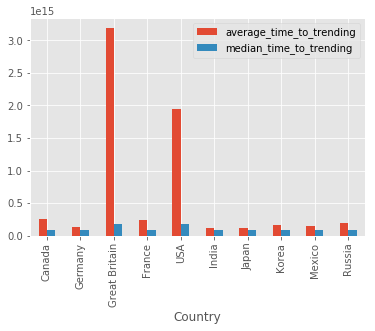

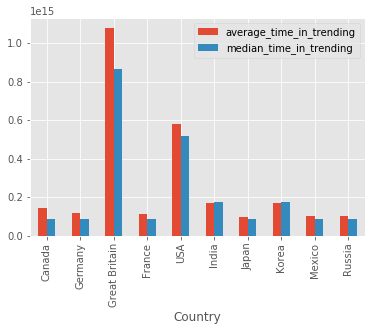

In [22]:
avg_time_to_trending = []
median_time_to_trending = []
avg_time_in_trending = []
median_time_in_trending = []

# For each country in the list of countries (defined above)
for c in countries:
    # Add median time until video makes it to trending by country
    median_time_to_trending.append(unique_videos[unique_videos.country == c].time_to_trending.median())
    avg_time_to_trending.append(unique_videos[unique_videos.country == c].time_to_trending.mean())
    median_time_in_trending.append(unique_videos[unique_videos.country == c].trending_time.median())
    avg_time_in_trending.append(unique_videos[unique_videos.country == c].trending_time.mean())
    
country_stats["average_time_to_trending"] = avg_time_to_trending
country_stats["median_time_to_trending"] = median_time_to_trending
country_stats["average_time_in_trending"] = avg_time_in_trending
country_stats["median_time_in_trending"] = median_time_in_trending
country_stats

# Currently, something is fucked up with the plots, because y-axis values are wrong
country_stats.plot.bar(x="Country", y=["average_time_to_trending", "median_time_to_trending"])
country_stats.plot.bar(x="Country", y=["average_time_in_trending", "median_time_in_trending"])

In [23]:
categories = unique_videos.category.unique()
category_stats = pd.DataFrame({"Category": categories})
category_stats

,Category
0,Entertainment
1,Pets & Animals
2,Gaming
3,Howto & Style
4,News & Politics
5,Nonprofits & Activism
6,Education
7,Sports
8,Music
9,Film & Animation


,Category,average_time_to_trending,median_time_to_trending,average_time_in_trending,median_time_in_trending
0,Entertainment,2 days 05:15:21.787049,1 days,1 days 17:20:32.119661,1 days
1,Pets & Animals,2 days 10:07:29.463220,1 days,1 days 19:19:26.600397,1 days
2,Gaming,2 days 15:57:21.142115,1 days,1 days 19:28:18.377676,1 days
3,Howto & Style,2 days 02:33:36.324233,1 days,1 days 18:07:15.688150,1 days
4,News & Politics,1 days 23:36:08.138358,1 days,1 days 12:24:34.083202,1 days
5,Nonprofits & Activism,1 days 09:58:14.865756,1 days,1 days 07:11:23.372585,1 days
6,Education,6 days 17:22:01.894303,1 days,1 days 18:35:29.855868,1 days
7,Sports,2 days 04:03:39.232992,1 days,1 days 11:43:29.288880,1 days
8,Music,8 days 09:12:32.258157,1 days,3 days 00:54:08.635021,1 days
9,Film & Animation,5 days 09:18:20.257447,1 days,1 days 20:51:51.438028,1 days


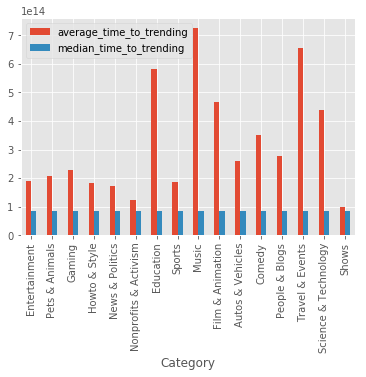

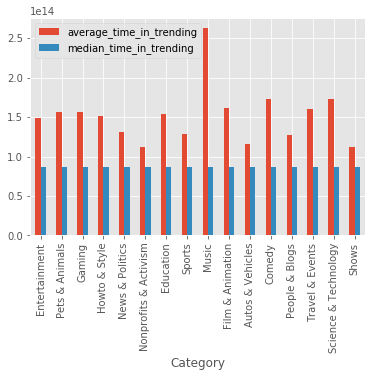

In [24]:
avg_time_to_trending = []
median_time_to_trending = []
avg_time_in_trending = []
median_time_in_trending = []

# For each country in the list of countries (defined above)
for cat in categories:
    # Add median time until video makes it to trending by country
    median_time_to_trending.append(unique_videos[unique_videos.category == cat].time_to_trending.median())
    avg_time_to_trending.append(unique_videos[unique_videos.category == cat].time_to_trending.mean())
    median_time_in_trending.append(unique_videos[unique_videos.category == cat].trending_time.median())
    avg_time_in_trending.append(unique_videos[unique_videos.category == cat].trending_time.mean())
    
category_stats["average_time_to_trending"] = avg_time_to_trending
category_stats["median_time_to_trending"] = median_time_to_trending
category_stats["average_time_in_trending"] = avg_time_in_trending
category_stats["median_time_in_trending"] = median_time_in_trending
category_stats

# Currently, something is fucked up with the plots, because y-axis values are wrong
category_stats.plot.bar(x="Category", y=["average_time_to_trending", "median_time_to_trending"])
category_stats.plot.bar(x="Category", y=["average_time_in_trending", "median_time_in_trending"])

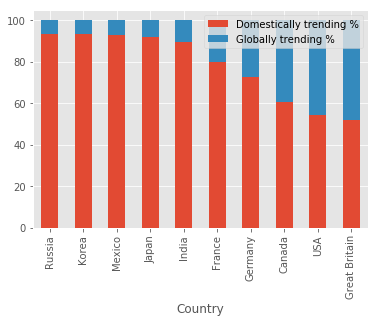

In [25]:
# The following code is commented out because it took a lot of time to run. A quicker solution to finding domestically trending videos is implemented below

# global_vids = {}  # Number of videos that are globally trending for each country
# domestic_vids = {}  # Number of videos that are only trending in the given country

# for country in countries:
#     global_vids[country] = 0
#     domestic_vids[country] = 0

# lastId = "ffffffffff"
# occured_countries = []
# for idx in range(len(unique_videos)):
#     if unique_videos.iloc[idx].video_id == lastId:
#         occured_countries.append(unique_videos.iloc[idx].country)
#     else:
#         if len(occured_countries) == 1:
#             domestic_vids[occured_countries[0]] += 1
#         else:
#             for c in occured_countries:
#                 global_vids[c] += 1
#         occured_countries = [unique_videos.iloc[idx].country]
#         lastId = unique_videos.iloc[idx].video_id

# Nr of domestically/globally trending videos per country
countries_unique_count = pd.DataFrame({"Country": countries})

# Dataframe where repeating videos are removed entirely (only videos appearing in one country's trending list remain)
countries_unique_videos = unique_videos.drop_duplicates(subset=["video_id"], keep=False)

unique_counts = []
for c in countries:
    # Nr of domestic videos for each country
    unique_counts.append(countries_unique_videos[countries_unique_videos.country == c].shape[0])

countries_unique_count["Domestically trending videos"] = unique_counts
countries_unique_count["Globally trending videos"] = [unique_videos[unique_videos.country == c].shape[0] - countries_unique_videos[countries_unique_videos.country == c].shape[0] for c in countries]
countries_unique_count["Domestically trending %"] = countries_unique_count["Domestically trending videos"] / (countries_unique_count["Domestically trending videos"] + countries_unique_count["Globally trending videos"]) * 100
countries_unique_count["Globally trending %"] = 100 - countries_unique_count["Domestically trending %"]
countries_unique_count = countries_unique_count.sort_values(by="Globally trending %")

countries_unique_count.plot.bar(x="Country", y=["Domestically trending %", "Globally trending %"], stacked=True)

In [26]:
english_df = unique_videos[(unique_videos.country == "Canada") | (unique_videos.country == "USA") | (unique_videos.country == "Great Britain")]
print("Nr of unique videos:", len(english_df.video_id.unique()))

# Find how many videos are trending in all 3 countries, in 2 countries or in only 1 country
id_counts = english_df.video_id.value_counts()
print("Nr of videos that appear in 1, 2 or 3 countries' trending list")
id_counts.value_counts()

# Variables for finding nr of common videos for Canada+USA, USA+UK, UK+Canada
canada_usa, usa_uk, uk_canada = 0, 0, 0

# Get videos that appear twice and thrice in the english_df dataframe
twice_repeating = english_df[english_df.video_id.isin(id_counts.index[id_counts == 2])]
thrice_repeating = english_df[english_df.video_id.isin(id_counts.index[id_counts == 3])]

# Group twice appearing videos by ids and find how many videos are trending in Canada & USA, USA & UK, UK & Canada
twice_grouped = twice_repeating.groupby("video_id").agg({"country": sum})
canada_usa = twice_grouped[(twice_grouped.country == "CanadaUSA") | (twice_grouped.country == "USACanada")].shape[0]
usa_uk = twice_grouped[(twice_grouped.country == "USAGreat Britain") | (twice_grouped.country == "Great BritainUSA")].shape[0]
uk_canada = twice_grouped[(twice_grouped.country == "Great BritainCanada") | (twice_grouped.country == "CanadaGreat Britain")].shape[0]

print("Nr of videos trending in Canada and USA:", canada_usa)
print("Nr of videos trending in USA and UK:", usa_uk)
print("Nr of videos trending in UK and Canada:", uk_canada)

Nr of unique videos: 30309
Nr of videos that appear in 1, 2 or 3 countries' trending list


1    27087
2     2712
3      510
Name: video_id, dtype: int64

Nr of videos trending in Canada and USA: 1756
Nr of videos trending in USA and UK: 506
Nr of videos trending in UK and Canada: 450


In [27]:
# Analysis for videos that appear in all 3 countries' trending lists
print("Average time till trending for:")
print("Canada", thrice_repeating[thrice_repeating.country == "Canada"].time_to_trending.mean())
print("USA", thrice_repeating[thrice_repeating.country == "USA"].time_to_trending.mean())
print("UK", thrice_repeating[thrice_repeating.country == "Great Britain"].time_to_trending.mean())
print("\n")

print("Average time in trending for:")
print("Canada", thrice_repeating[thrice_repeating.country == "Canada"].trending_time.mean())
print("USA", thrice_repeating[thrice_repeating.country == "USA"].trending_time.mean())
print("UK", thrice_repeating[thrice_repeating.country == "Great Britain"].trending_time.mean())

Average time till trending for:
Canada 1 days 03:48:42.352941
USA 1 days 11:17:38.823529
UK 2 days 00:25:24.705882


Average time in trending for:
Canada 3 days 04:39:31.764705
USA 8 days 18:26:49.411764
UK 17 days 03:31:45.882352


In [28]:
thrice_repeating = thrice_repeating.sort_values(by=["video_id", "time_to_trending"])

firstin = {"Canada": 0, "USA": 0, "Great Britain": 0}

for idx in range(0, thrice_repeating.shape[0], 3):
    if thrice_repeating.iloc[idx].time_to_trending != thrice_repeating.iloc[idx+1].time_to_trending:
        firstin[thrice_repeating.iloc[idx].country] += 1
    elif thrice_repeating.iloc[idx].time_to_trending != thrice_repeating.iloc[idx+2].time_to_trending:
        firstin[thrice_repeating.iloc[idx].country] += 1
        firstin[thrice_repeating.iloc[idx+1].country] += 1

print("Nr of videos that first trended in Canada:", firstin["Canada"])
print("Nr of videos that first trended in the USA:", firstin["USA"])
print("Nr of videos that first trended in the UK:", firstin["Great Britain"])
print("NB! Since some videos trended simultaneously in two countries, then for some videos two countries are accounted")

Nr of videos that first trended in Canada: 210
Nr of videos that first trended in the USA: 115
Nr of videos that first trended in the UK: 85
NB! Since some videos trended simultaneously in two countries, then for some videos two countries are accounted


In [29]:
# Overlaps between countries
overlaps = pd.DataFrame(index=countries, columns=countries)

for c1 in countries:
    for c2 in countries:
        overlaps.loc[c1][c2] = pd.merge(unique_videos[unique_videos.country == c1].video_id, unique_videos[unique_videos.country == c2].video_id, how="inner").shape[0]

overlaps

overlaps_proportional = overlaps.copy()
for column in overlaps_proportional.columns:
    overlaps_proportional[column] = overlaps_proportional[column] / unique_videos[unique_videos.country == column].shape[0]
    
overlaps_proportional

,Canada,Germany,Great Britain,France,USA,India,Japan,Korea,Mexico,Russia
Canada,24418,5307,960,4190,2266,1448,595,599,1752,597
Germany,5307,29622,531,4029,1104,797,433,381,1563,1985
Great Britain,960,531,3272,440,1016,103,100,148,414,182
France,4190,4029,440,30571,643,920,427,345,1461,946
USA,2266,1104,1016,643,6351,231,139,149,583,200
India,1448,797,103,920,231,16521,154,97,402,139
Japan,595,433,100,427,139,154,13093,515,334,170
Korea,599,381,148,345,149,97,515,16090,263,152
Mexico,1752,1563,414,1461,583,402,334,263,33945,448
Russia,597,1985,182,946,200,139,170,152,448,34761


,Canada,Germany,Great Britain,France,USA,India,Japan,Korea,Mexico,Russia
Canada,1,0.179157,0.293399,0.137058,0.356794,0.087646,0.0454441,0.0372281,0.0516129,0.0171744
Germany,0.21734,1,0.162286,0.131792,0.173831,0.0482416,0.0330711,0.0236793,0.0460451,0.0571042
Great Britain,0.0393153,0.0179259,1,0.0143927,0.159975,0.00623449,0.00763767,0.00919826,0.0121962,0.00523575
France,0.171595,0.136014,0.134474,1,0.101244,0.0556867,0.0326128,0.0214419,0.0430402,0.0272144
USA,0.0928004,0.0372696,0.310513,0.021033,1,0.0139822,0.0106164,0.00926041,0.0171748,0.00575357
India,0.0593005,0.0269057,0.0314792,0.0300939,0.0363722,1,0.011762,0.00602859,0.0118427,0.00399873
Japan,0.0243673,0.0146175,0.0305623,0.0139675,0.0218863,0.00932147,1,0.0320075,0.00983945,0.00489054
Korea,0.0245311,0.0128621,0.0452323,0.0112852,0.0234609,0.00587132,0.039334,1,0.00774783,0.00437272
Mexico,0.0717503,0.0527648,0.126528,0.0477904,0.0917966,0.0243327,0.0255098,0.0163456,1,0.012888
Russia,0.0244492,0.067011,0.0556235,0.0309444,0.0314911,0.00841353,0.012984,0.00944686,0.0131978,1


Categories


Entertainment            104363
People & Blogs            52246
Music                     41299
News & Politics           35701
Comedy                    25988
Sports                    23012
Film & Animation          20181
Howto & Style             18546
Gaming                    11053
Science & Technology       8061
Education                  7672
Autos & Vehicles           4677
Pets & Animals             4520
Nonprofits & Activism      2766
Travel & Events            1720
Shows                       907
Name: category, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Categories')

Text(0.5, 1.0, 'Most popular categories for all of the countries')

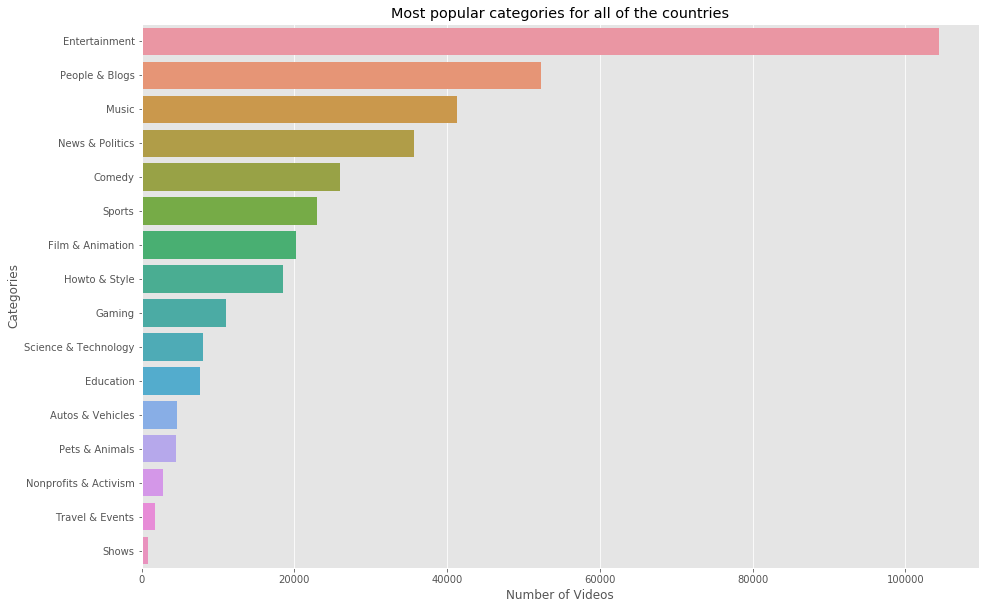

In [30]:
import seaborn as sns

#Most popular attributes for all data
print('\033[1m' + "Categories" + '\033[0m') # '\033[1m' is bold, '\033[0m' is the end
all_data.category.value_counts()
categ = all_data.category.value_counts().reset_index() #most popular categories

plt.figure(figsize=(15,10))
ax = sns.barplot(y=categ['index'],x=categ['category'], data=categ)
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Most popular categories for all of the countries")

Channels


The Late Show with Stephen Colbert        971
WWE                                       784
Late Night with Seth Meyers               770
TheEllenShow                              737
The Tonight Show Starring Jimmy Fallon    699
Jimmy Kimmel Live                         696
VikatanTV                                 683
PewDiePie                                 642
RadaanMedia                               601
The Late Late Show with James Corden      579
CNN                                       578
FBE                                       554
Netflix                                   548
MLG Highlights                            531
Screen Junkies                            489
ESPN                                      485
SET India                                 485
BuzzFeedVideo                             476
Çukur                                     466
Warner Bros. Pictures                     461
Name: channel_title, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Channels')

Text(0.5, 1.0, 'Most popular channels for all of the countries')

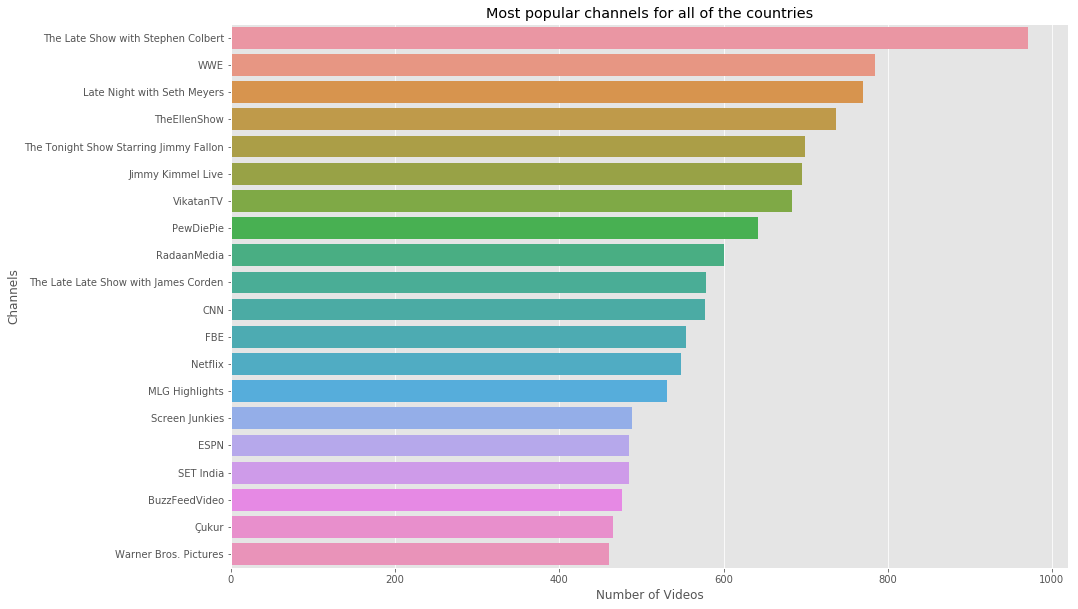

In [31]:
print('\033[1m' + "Channels")
all_data.channel_title.value_counts().head(20)
chan = all_data.channel_title.value_counts().head(20).reset_index() #Most popular channels

plt.figure(figsize=(15,10))
ax = sns.barplot(y=chan['index'],x=chan['channel_title'], data=chan)
plt.xlabel("Number of Videos")
plt.ylabel("Channels")
plt.title("Most popular channels for all of the countries")

In [32]:
popular_channels = all_data.channel_title.value_counts().head(20)
channel_stats = pd.DataFrame({"Channel": popular_channels.index})
channel_stats

,Channel
0,The Late Show with Stephen Colbert
1,WWE
2,Late Night with Seth Meyers
3,TheEllenShow
4,The Tonight Show Starring Jimmy Fallon
5,Jimmy Kimmel Live
6,VikatanTV
7,PewDiePie
8,RadaanMedia
9,The Late Late Show with James Corden


,Channel,average_time_to_trending,median_time_to_trending,average_time_in_trending,median_time_in_trending
0,The Late Show with Stephen Colbert,1 days 01:52:04.873096,1 days,1 days 16:36:32.893401,1 days
1,WWE,1 days 01:28:09.795918,1 days,2 days 01:53:52.653061,1 days
2,Late Night with Seth Meyers,0 days 21:25:42.857142,1 days,2 days 08:21:25.714285,1 days
3,TheEllenShow,1 days 05:48:19.115044,1 days,2 days 04:53:05.840707,1 days
4,The Tonight Show Starring Jimmy Fallon,1 days 01:49:42.857142,1 days,2 days 07:46:17.142857,1 days
5,Jimmy Kimmel Live,1 days 03:46:21.270903,1 days,2 days 09:18:39.732441,2 days
6,VikatanTV,1 days 00:57:07.438016,1 days,1 days 02:22:48.595041,1 days
7,PewDiePie,1 days 02:20:52.173913,1 days,2 days 06:57:23.478260,1 days
8,RadaanMedia,1 days 00:41:27.523992,1 days,1 days 03:54:55.969289,1 days
9,The Late Late Show with James Corden,1 days 03:45:12.796208,1 days,2 days 22:44:55.734597,1 days


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:223: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  data = data.fillna(fillna)


Average time to trending for all 20 most popular channels: 1 days 03:55:19.730619
Average time in trending for all 20 most popular channels: 2 days 07:54:34.490709


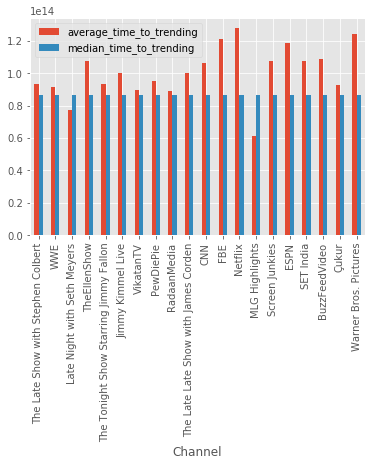

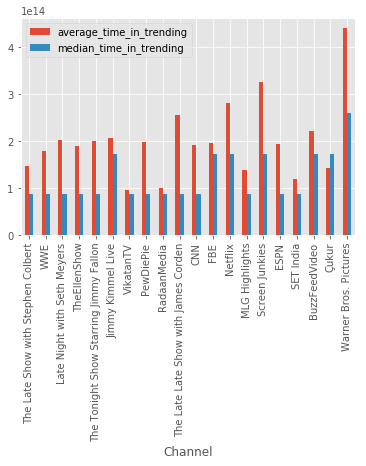

In [33]:
avg_time_to_trending = []
median_time_to_trending = []
avg_time_in_trending = []
median_time_in_trending = []

# For each country in the list of countries (defined above)
for ch in popular_channels.index:
    # Add median time until video makes it to trending by country
    median_time_to_trending.append(unique_videos[unique_videos.channel_title == ch].time_to_trending.median())
    avg_time_to_trending.append(unique_videos[unique_videos.channel_title == ch].time_to_trending.mean())
    median_time_in_trending.append(unique_videos[unique_videos.channel_title == ch].trending_time.median())
    avg_time_in_trending.append(unique_videos[unique_videos.channel_title == ch].trending_time.mean())
    
channel_stats["average_time_to_trending"] = avg_time_to_trending
channel_stats["median_time_to_trending"] = median_time_to_trending
channel_stats["average_time_in_trending"] = avg_time_in_trending
channel_stats["median_time_in_trending"] = median_time_in_trending
channel_stats

# Currently, something is fucked up with the plots, because y-axis values are wrong
channel_stats.plot.bar(x="Channel", y=["average_time_to_trending", "median_time_to_trending"])
channel_stats.plot.bar(x="Channel", y=["average_time_in_trending", "median_time_in_trending"])

print("Average time to trending for all 20 most popular channels:", channel_stats.average_time_to_trending.mean())
print("Average time in trending for all 20 most popular channels:", channel_stats.average_time_in_trending.mean())

Tags


nan              36169
funny            14559
comedy           11935
2018             11219
news              6259
music             5851
2017              5659
video             5546
humor             5024
review            4037
television        4012
show              3986
vlog              3958
Pop               3926
interview         3837
live              3743
food              3610
comedian          3554
tv                3416
funny videos      3401
trailer           3359
how to            3233
movie             3174
funny video       3126
Comedy            3113
rap               3049
entertainment     2929
new               2924
celebrity         2916
official          2851
celebrities       2851
talk show         2777
humour            2762
fun               2713
jokes             2705
hollywood         2676
film              2668
challenge         2664
football          2634
reaction          2629
late night        2565
youtube           2488
music video       2472
politics   

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Tags')

Text(0.5, 1.0, 'Most popular tags for all of the countries')

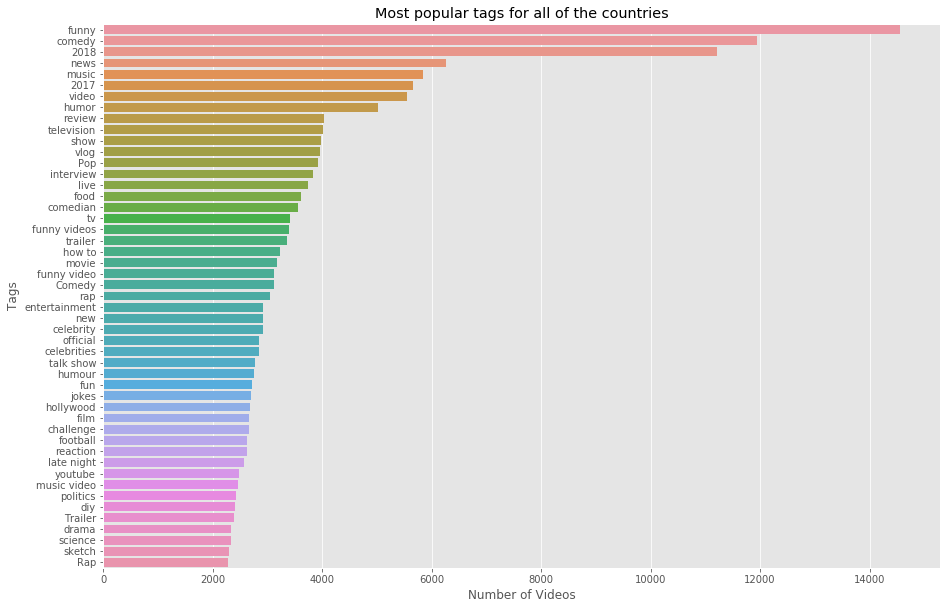

In [34]:
#Most popular tags
print('\033[1m' + "Tags")
tags=[]
for a in all_data.tags:
    for tag in str(a).split(','):
        tags.append(tag)
df = pd.DataFrame(tags,columns=['tags'])
df.tags.value_counts().head(50)
tag = df.tags.value_counts(dropna=True).head(50).reset_index()

tag=tag.drop(tag.index[tag['index']=='nan'].tolist()[0]) # drop the nan value

plt.figure(figsize=(15,10))
ax = sns.barplot(y=tag['index'],x=tag['tags'], data=tag)
plt.xlabel("Number of Videos")
plt.ylabel("Tags")
plt.title("Most popular tags for all of the countries")

In [35]:
#Biggest views
print('\033[1m' + "Views")
biggestViews = all_data.views.nlargest(500) #500 biggest viewed videos
views = []
for i in range(len(biggestViews)):
    views.append(all_data.loc[biggestViews.index[i]])
views=pd.DataFrame(views) #all 500 videos in dataframe

unique_views = views.video_id.unique() #unique video ids from 500 videos
biggestViews20 = []
for i in range(20):
    biggestViews20.append(views[views.video_id==unique_views[i]].iloc[0]) #find the first video with such id
biggestViews20 = pd.DataFrame(biggestViews20)
biggestViews20["likes/all"] = biggestViews20.likes/(biggestViews20.likes+biggestViews20.dislikes)
biggestViews20["dislikes/all"] = biggestViews20.dislikes/(biggestViews20.likes+biggestViews20.dislikes)
biggestViews20 #first 20 unique video with biggest views

#Biggest amount of likes
print('\033[1m' + "Likes")
biggestLikes = all_data.likes.nlargest(500) #500 most liked videos
likes = []
for i in range(len(biggestLikes)):
    likes.append(all_data.loc[biggestLikes.index[i]])
likes=pd.DataFrame(likes) #all 500 videos in dataframe

unique_likes = likes.video_id.unique() #unique video ids from 500 videos
biggestLikes20 = []
for i in range(20):
    biggestLikes20.append(likes[likes.video_id==unique_likes[i]].iloc[0]) #find the first video with such id
biggestLikes20 = pd.DataFrame(biggestLikes20)
biggestLikes20["likes/all"] = biggestLikes20.likes/(biggestLikes20.likes+biggestLikes20.dislikes)
biggestLikes20["dislikes/all"] = biggestLikes20.dislikes/(biggestLikes20.likes+biggestLikes20.dislikes)
biggestLikes20 #first 20 unique video with most likes

#Biggest amount of dislikes
print('\033[1m' + "Dislikes")
biggestDislikes = all_data.dislikes.nlargest(500) #500 most disliked videos
dislikes = []
for i in range(len(biggestDislikes)):
    dislikes.append(all_data.loc[biggestDislikes.index[i]])
dislikes=pd.DataFrame(dislikes) #all 500 videos in dataframe

unique_dislikes = dislikes.video_id.unique() #unique video ids from 500 videos
biggestDislikes20 = []
for i in range(20):
    biggestDislikes20.append(dislikes[dislikes.video_id==unique_dislikes[i]].iloc[0]) #find the first video with such id
biggestDislikes20 = pd.DataFrame(biggestDislikes20)
biggestDislikes20["likes/all"] = biggestDislikes20.likes/(biggestDislikes20.likes+biggestDislikes20.dislikes)
biggestDislikes20["dislikes/all"] = biggestDislikes20.dislikes/(biggestDislikes20.likes+biggestDislikes20.dislikes)
biggestDislikes20 #first 20 unique video with most dislikes

#Biggest amount of comments
print('\033[1m' + "Comments")
biggestComments = all_data.comment_count.nlargest(500) #500 most commented videos
comments = []
for i in range(len(biggestComments)):
    comments.append(all_data.loc[biggestComments.index[i]])
comments=pd.DataFrame(comments) #all 500 videos in dataframe

unique_comments = comments.video_id.unique() #unique video ids from 500 videos
biggestComments20 = []
for i in range(20):
    biggestComments20.append(comments[comments.video_id==unique_comments[i]].iloc[0]) #find the first video with such id
biggestComments20 = pd.DataFrame(biggestComments20)
biggestComments20["likes/all"] = biggestComments20.likes/(biggestComments20.likes+biggestComments20.dislikes)
biggestComments20["dislikes/all"] = biggestComments20.dislikes/(biggestComments20.likes+biggestComments20.dislikes)
biggestComments20 #first 20 unique video with most comments

#Likes and dislikes rates
allLikesDislikes = all_data.copy() #calculating likes and dislikes rates
allLikesDislikes["likes/all"] = allLikesDislikes.likes/(allLikesDislikes.likes+allLikesDislikes.dislikes)
allLikesDislikes["dislikes/all"] = allLikesDislikes.dislikes/(allLikesDislikes.likes+allLikesDislikes.dislikes)

#Biggest likes over dislikes rate
print('\033[1m' + "Likes over dislikes")
likesDislikes=allLikesDislikes.copy()
#find where views are bigger than 100 000
likesDislikes=likesDislikes.where(likesDislikes["views"]>100000).sort_values(by=['likes/all','trending_date'],ascending=False) 
likesDislikes=likesDislikes.head(500)

unique_likesDislikes = likesDislikes.video_id.unique() #unique video ids from 500 videos
biggestlikesDislikes20 = []
for i in range(20):
    biggestlikesDislikes20.append(likesDislikes[likesDislikes.video_id==unique_likesDislikes[i]].iloc[0]) 
biggestlikesDislikes20 = pd.DataFrame(biggestlikesDislikes20)
biggestlikesDislikes20 #first 20 unique video with biggest likes/dislikes rate

#Biggest dislikes over likes rate
print('\033[1m' + "Dislikes over likes")
dislikesLikes=allLikesDislikes.copy()
#find where views are bigger than 100 000
dislikesLikes=dislikesLikes.where(dislikesLikes["views"]>100000).sort_values(by=['dislikes/all','trending_date'],ascending=False) 
dislikesLikes=dislikesLikes.head(500)

unique_dislikesLikes = dislikesLikes.video_id.unique() #unique video ids from 500 videos
biggestdislikesLikes20 = []
for i in range(20):
    biggestdislikesLikes20.append(dislikesLikes[dislikesLikes.video_id==unique_dislikesLikes[i]].iloc[0]) 
biggestdislikesLikes20 = pd.DataFrame(biggestdislikesLikes20)
biggestdislikesLikes20 #first 20 unique video with biggest dislikes/likes rate


Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
150857,_I_D_8Z4sJE,2018-04-07,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",424538912,2818771,149275,99380,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,Great Britain,0.949706,0.050294
156905,9jI-z9QN6g8,2018-05-18,"Te Bote Remix - Casper, Nio García, Darell, Ni...",Flow La Movie,Music,2018-04-11 22:00:00,"Te Bote,Te Bote Remix,Flow La Movie,Ozuna,Nio ...",337621571,2581961,166549,113564,False,False,False,Flow La Movie Presenta - Te Boté Remix - Caspe...,Great Britain,0.939404,0.060596
147990,kLpH1nSLJSs,2018-03-23,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,Music,2018-02-15 00:00:03,"Bad,Bunny,Bad Bunny,Video Oficial,Music Video,...",328860380,3823879,215530,225216,False,False,False,Bad Bunny - Amorfoda | Video Oficial\n\n-Click...,Great Britain,0.946643,0.053357
143607,wfWkmURBNv8,2018-03-01,Ozuna x Romeo Santos - El Farsante Remix,Ozuna,Music,2018-01-30 15:00:05,"Ozuna,Reggaeton,Odisea,Odisea The Album,Romeo ...",288811992,1618180,151147,67506,False,False,False,DESCARGA Odisea Aqui: http://apple.co/2vX00sT\...,Great Britain,0.914574,0.085426
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
148381,xpVfcZ0ZcFM,2018-03-25,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",258164991,4737873,117198,301756,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,Great Britain,0.975861,0.024139
158165,ffxKSjUwKdU,2018-05-26,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",208876887,3394437,150086,259613,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,Great Britain,0.957657,0.042343
158168,zEf423kYfqk,2018-05-26,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,Music,2018-04-20 10:40:51,"Becky G,Natti Natasha,Natti Natasha Music,Natt...",200862743,1668418,142569,97826,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,Great Britain,0.921276,0.078724
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
140620,sGIm0-dQd8M,2018-02-14,Dura - Daddy Yankee (Video Oficial),Daddy Yankee,Music,2018-01-18 22:32:49,"daddy yankee reggaeton,daddy yankee youtube,mu...",167456025,1633407,74005,65395,False,False,False,Dura - Daddy Yankee - nuevo video oficial 2018...,Great Britain,0.956657,0.043343


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
159083,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Great Britain,0.964456,0.035544
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
148381,xpVfcZ0ZcFM,2018-03-25,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",258164991,4737873,117198,301756,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,Great Britain,0.975861,0.024139
147990,kLpH1nSLJSs,2018-03-23,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,Music,2018-02-15 00:00:03,"Bad,Bunny,Bad Bunny,Video Oficial,Music Video,...",328860380,3823879,215530,225216,False,False,False,Bad Bunny - Amorfoda | Video Oficial\n\n-Click...,Great Britain,0.946643,0.053357
158165,ffxKSjUwKdU,2018-05-26,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",208876887,3394437,150086,259613,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,Great Britain,0.957657,0.042343
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
127229,kTlv5_Bs8aw,2017-12-07,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",54083634,2960250,57944,556154,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Great Britain,0.980802,0.019198
150857,_I_D_8Z4sJE,2018-04-07,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",424538912,2818771,149275,99380,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,Great Britain,0.949706,0.050294
128636,6ZfuNTqbHE8,2017-12-14,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",100672931,2701353,56313,368739,False,False,False,There was an idea… Avengers: Infinity War. In ...,Great Britain,0.979579,0.020421
156454,p8npDG2ulKQ,2018-05-16,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",29742824,2700801,29341,371864,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Great Britain,0.989253,0.010747


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
135229,QwZT7T-TXT0,2018-01-18,So Sorry.,Logan Paul Vlogs,Entertainment,2018-01-02 16:42:21,"logan paul vlog,logan paul,logan,paul,olympics...",45349447,1572111,1944971,1626501,False,False,False,NaN,Great Britain,0.446993,0.553007
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
138755,oWjxSkJpxFU,2018-02-05,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",26703269,2061275,545595,704824,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Great Britain,0.790709,0.209291
2898,pOHQdIDds6s,2017-11-28,Jake Paul - It's Everyday Bro (Remix) [feat. G...,Jake Paul,People & Blogs,2017-11-23 00:00:51,"Jake,Paul,logan,paul,its,every,day,Team,10,bro...",12921578,448453,504340,168477,False,False,False,GET IT'S EVERYDAY BRO (REMIX) [feat. Gucci Man...,Canada,0.470672,0.529328
143214,qtTM2YV3bI8,2018-02-27,Lucas Lucco e Pabllo Vittar - Paraíso,Lucas Lucco,Music,2018-01-28 23:41:31,"paraiso,lucas lucco,pabllo vittar,lucas lucco ...",54087829,1184184,421473,275795,False,False,False,Ouça e baixe Paraíso em todas as plataformas d...,Great Britain,0.737507,0.262493
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
76034,84LBjXaeKk4,2018-05-17,Netta - Toy - Israel - LIVE - Grand Final - Eu...,Eurovision Song Contest,Entertainment,2018-05-12 21:00:52,"Eurovision Song Contest,2018,Lisbon,Netta,Toy,...",20929664,184529,361763,91466,False,False,False,Netta represented Israel at the Grand Final of...,Germany,0.337785,0.662215
352056,_5d-sQ7Fh5M,2018-02-09,LOGAN PAUL IS BACK!,Logan Paul Vlogs,Entertainment,2018-02-04 22:02:27,"logan paul vlog,logan paul,logan,paul,olympics...",14161833,1216340,291900,436698,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,USA,0.806463,0.193537
315047,ZGEoqPpJQLE,2018-02-28,FACE - Я РОНЯЮ ЗАПАД (prod. by JuloOntheTrack),FACE,Music,2018-02-25 16:37:52,"#FACE #ЯРОНЯЮЗАПАД,фейс,бургер,я роняю запад,f...",3209893,123077,270121,56272,False,False,False,FOLLOW:\nvk.com/face\ninstagram.com/facepublic...,Russia,0.313015,0.686985
132430,LFhT6H6pRWg,2018-01-02,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",1348067,10576,258504,33809,False,False,False,Ajit Pai has been at the heart of the net neut...,Great Britain,0.039304,0.960696


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
135229,QwZT7T-TXT0,2018-01-18,So Sorry.,Logan Paul Vlogs,Entertainment,2018-01-02 16:42:21,"logan paul vlog,logan paul,logan,paul,olympics...",45349447,1572111,1944971,1626501,False,False,False,NaN,Great Britain,0.446993,0.553007
159083,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Great Britain,0.964456,0.035544
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
138755,oWjxSkJpxFU,2018-02-05,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",26703269,2061275,545595,704824,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Great Britain,0.790709,0.209291
126802,kTlv5_Bs8aw,2017-12-05,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",48759109,2901830,54630,559197,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Great Britain,0.981522,0.018478
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
314825,51wobJ4jOU4,2018-02-27,Распаковка Samsung Galaxy S9+,Wylsacom,Science & Technology,2018-02-25 17:01:22,"iPhone,Apple,wylsa,Wylsacom,galaxy,распаковка,...",2606405,535682,10490,523855,False,False,False,Выиграй Galaxy S9+ на 64 GB:\n1. Подпишись на ...,Russia,0.980794,0.019206
144437,OK3GJ0WIQ8s,2018-03-06,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",23416810,2672433,29088,477233,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Great Britain,0.989233,0.010767
34599,32sYGCOYJUM,2018-05-14,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Sơn Tùng M-TP Official,Music,2018-05-11 17:00:47,"chạy ngay đi mv,chạy ngay đi,chay ngay di mv,c...",29662624,827026,135931,445251,False,False,False,#ChayNgayDi #RunNow #เรียกใช้เดี๋ยวนี้ #MTPEnt...,Canada,0.858840,0.141160
352056,_5d-sQ7Fh5M,2018-02-09,LOGAN PAUL IS BACK!,Logan Paul Vlogs,Entertainment,2018-02-04 22:02:27,"logan paul vlog,logan paul,logan,paul,olympics...",14161833,1216340,291900,436698,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,USA,0.806463,0.193537


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
161317,N1HAMUAXzbs,2018-06-14,Kris Wu – Like That (Official Music Video),Kris Wu,Music,2018-05-22 15:05:18,"Kris Wu,Wu Yi Fan,吴亦凡,fan shi,wuyifan,kw,kris,...",13799079.0,123856.0,0.0,10903.0,0.0,0.0,0.0,Special thanks to Stella Maxwell.Get “Like Tha...,Great Britain,1.000000,0.000000
303525,n_SuWOaNQMA,2017-12-30,Власти ЯНАО устраивают митинги против себя,Roman Max,People & Blogs,2017-12-29 07:27:29,"Ямал,ЯНАО,митинг,коррупция,Дмитрий Кобылкин,гу...",124706.0,1047.0,0.0,19.0,0.0,0.0,0.0,"На Ямале люди, связанные с «Единой Россией» и ...",Russia,1.000000,0.000000
127220,xF9kTkjrHdQ,2017-12-07,Roberto Carlos vs France 1997,Saint,Sports,2011-02-03 14:07:55,"536282C,1",111834.0,13.0,0.0,1.0,0.0,0.0,0.0,,Great Britain,1.000000,0.000000
44017,KqNX5O1m9dc,2017-11-29,Star Wars: Die letzten Jedi - Kinospot: Das Er...,Star Wars Deutschland,Film & Animation,2017-11-28 16:26:36,"Star Wars,Kinospot,Filmclip,The Last Jedi,Die ...",841961.0,194.0,0.0,24.0,0.0,0.0,0.0,Die Saga geht weiter und die Zeit ist gekommen...,Germany,1.000000,0.000000
331431,apgEUxQGOHg,2018-05-27,Alone in the Game | AT&T AUDIENCE Network,Audience Network,Entertainment,2018-05-25 00:57:02,"AT&T,ATT,AT&T AUDIENCE,DirectTV,Direct TV,U-Ve...",564044.0,11688.0,1.0,2.0,0.0,0.0,0.0,Alone in the Game premieres Thursday June 28th...,Russia,0.999914,0.000086
219772,XdVhT60Loxg,2017-11-16,유설(YUSEOL) - 'Ocean View' M/V Teaser,NEWPLAN ENTERTAINMENT,Music,2017-11-11 09:00:02,NaN,331219.0,10533.0,5.0,261.0,0.0,0.0,0.0,유설(YUSEOL) - 'Ocean View' M/V Teaser\n\n#유설 #Y...,Korea,0.999526,0.000474
251776,PVrgn2oshDI,2018-06-03,180602 LOVE YOURSELF 팬싸인회 EUPHORIA / 방탄소년단 정국 ...,HEADLINER,Entertainment,2018-06-02 15:32:01,"JUNGKOOK,정국,BTS,방탄소년단,방탄,전정국,BANGTAN BOYS,정국직캠...",134108.0,15749.0,10.0,382.0,0.0,0.0,0.0,HDLNR FILM by HEADLINER- 헤드라이너 채널의 모든 영상은 재업로드...,Korea,0.999365,0.000635
222543,_9SguIVvAaE,2017-12-02,[BT21] Animated Stickers - UNIVERSTAR #2,BT21,People & Blogs,2017-11-30 09:44:53,"BT21,BTS,방탄소년단,방탄,아미,ARMY,A.R.M.Y,빅히트,엔터테인먼트,B...",172931.0,32763.0,23.0,1108.0,0.0,0.0,0.0,The Scene Stealer!\n\nDownload on LINE 📱 👉 htt...,Korea,0.999298,0.000702
60030,T99oRpCsLtc,2018-02-19,[MIXTAPE] I.M - Fly With Me (Teaser),starshipTV,Music,2018-02-18 12:00:01,"몬스타엑스,몬엑,몬베베,몬스타,아이엠,믹스테잎,믹테,플라이위드미,뮤비,티저,셔누,원...",127877.0,35338.0,25.0,2829.0,0.0,0.0,0.0,스타쉽 엔터테인먼트 STARSHIP ENTERTAINMENT\nArtist : 몬스...,Germany,0.999293,0.000707
220253,CTTQG7A_ScU,2017-11-19,[BT21] Making of BT21 - EP.10,BT21,People & Blogs,2017-11-17 09:54:31,"Making,episode,BT21,BTS,방탄소년단,방탄,아미,ARMY,A.R.M...",291387.0,33576.0,26.0,926.0,0.0,0.0,0.0,"Stars of tomorrow, Universtar BT21, created by...",Korea,0.999226,0.000774


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
269863,D8S7yuE4eIY,2018-02-04,ATLAS 2 - 1 CRUZ AZUL | PUEBLA 2 - 0 CHIVAS LI...,ViralFutbolHD,Sports,2018-02-03 06:31:18,NaN,144137.0,1.0,140.0,5.0,0.0,0.0,0.0,ATLAS VS CRUZ AZUL | PUEBLA 2 - 0 CHIVAS LIGA ...,Mexico,0.007092,0.992908
309870,pay0OHVh3L0,2018-02-02,Трейлер пресконференции Павла Грудинина,Современная Коммуна,People & Blogs,2018-02-01 06:01:23,"грудинин,грудинин2018,загрудинина",252243.0,47.0,3128.0,513.0,0.0,0.0,0.0,NaN,Russia,0.014803,0.985197
210897,_NIULCv8yMc,2018-04-25,泰葉からのお知らせです,泰葉エンターテイメント,Music,2018-04-23 22:32:07,泰葉,105447.0,129.0,5083.0,0.0,1.0,0.0,0.0,みなさまいつも応援ありがとうございます。\n泰葉よりお知らせがございます。\n音楽チームに恵...,Japan,0.024751,0.975249
306061,mXy8kiFUb4I,2018-01-14,"Юлий Онешко, это видео для тебя",Dasha Day,People & Blogs,2018-01-13 07:26:04,"комедия,юмор,смешно,блог,juliusspeak,julius sp...",223493.0,2547.0,99863.0,9090.0,0.0,0.0,0.0,"Юлий Онешко, это видео для тебя\n\nПРЕДЫДУЩЕЕ ...",Russia,0.024871,0.975129
307095,tsijLVXpPNg,2018-01-19,"Реалити шоу Игра за Престол, пилотная серия",Пирамида Козлоу,People & Blogs,2018-01-18 08:50:36,"Выборы,Выборы Президента,Кредитная Амнистия,Ми...",104173.0,84.0,3232.0,100.0,0.0,0.0,0.0,Кандидат в Президенты РФ психолог Михаил Козло...,Russia,0.025332,0.974668
307472,EQrof-5Waag,2018-01-21,За сколько Грудинин продаёт Россию?,Левой правоЙ,People & Blogs,2018-01-19 16:42:54,"грудинин,кпрф,выборы,политика,новости,сми,мигр...",135182.0,447.0,14918.0,1930.0,0.0,0.0,0.0,NaN,Russia,0.029092,0.970908
308547,yZTxKkGrIL4,2018-01-26,ОСТОРОЖНО МОШЕННИКИ на телеканале Домашний,Игра за Престол,People & Blogs,2018-01-25 05:01:19,"выборы,михаил козлов,президент,путин,амнистия,...",109028.0,24.0,705.0,64.0,0.0,0.0,0.0,Кандидат в Президенты Михаил Козлов со своими ...,Russia,0.032922,0.967078
307652,dyD3ryhnn_4,2018-01-22,Отчёт Навального перед спонсорами за 2017 год,Артем Захаров,People & Blogs,2018-01-21 05:36:24,"Юмор,смешно,руки базуки,шурыгина,семенов,малах...",191804.0,1544.0,43758.0,1446.0,0.0,0.0,0.0,NaN,Russia,0.034082,0.965918
6216,LFhT6H6pRWg,2017-12-15,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",649781.0,5505.0,140080.0,16730.0,0.0,0.0,0.0,Ajit Pai has been at the heart of the net neut...,Canada,0.037813,0.962187
306884,FVxoMfzsIZQ,2018-01-18,Трейлер сенсационного реалити шоу о Выборах Пр...,Пирамида Козлоу,People & Blogs,2018-01-16 07:20:17,"Выборы,Выбоы Президента,Михаил Козлов,Ксения С...",219644.0,1627.0,38985.0,1253.0,0.0,0.0,0.0,Реальный кандидат психолог Михаил Козлов ежедн...,Russia,0.040062,0.959938


In [36]:
countries = ["Canada", "Germany", "Great Britain", "France", "USA", "India", "Japan", "Korea", "Mexico", "Russia"]

Canada
Categories


Entertainment            13451
News & Politics           4159
People & Blogs            4105
Comedy                    3773
Music                     3731
Sports                    2787
Film & Animation          2066
Howto & Style             2007
Gaming                    1344
Science & Technology      1155
Education                  991
Travel & Events            392
Pets & Animals             369
Autos & Vehicles           353
Shows                      124
Nonprofits & Activism       74
Name: category, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Categories')

Text(0.5, 1.0, 'Most popular categories for Canada')

Germany
Categories


Entertainment            15292
People & Blogs            5988
News & Politics           2935
Sports                    2752
Comedy                    2534
Film & Animation          2379
Music                     2372
Howto & Style             1745
Gaming                    1565
Autos & Vehicles           873
Education                  844
Science & Technology       806
Nonprofits & Activism      256
Pets & Animals             251
Travel & Events            141
Shows                      107
Name: category, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Categories')

Text(0.5, 1.0, 'Most popular categories for Germany')

Great Britain
Categories


Music                    13698
Entertainment             9055
People & Blogs            2923
Film & Animation          2564
Howto & Style             1928
Sports                    1903
Comedy                    1819
Gaming                    1778
News & Politics           1218
Pets & Animals             533
Science & Technology       516
Education                  457
Autos & Vehicles           144
Travel & Events             96
Nonprofits & Activism       90
Shows                       20
Name: category, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Categories')

Text(0.5, 1.0, 'Most popular categories for Great Britain')

France
Categories


Entertainment            9819
People & Blogs           5719
Comedy                   4343
Sports                   4342
Music                    3946
News & Politics          3752
Howto & Style            2361
Film & Animation         2170
Gaming                   1459
Science & Technology      802
Education                 769
Autos & Vehicles          673
Pets & Animals            237
Travel & Events           119
Nonprofits & Activism     114
Shows                      99
Name: category, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Categories')

Text(0.5, 1.0, 'Most popular categories for France')

USA
Categories


Entertainment            9943
Music                    6467
Howto & Style            4142
Comedy                   3453
People & Blogs           3208
News & Politics          2485
Science & Technology     2397
Film & Animation         2343
Sports                   2172
Education                1654
Pets & Animals            920
Gaming                    816
Travel & Events           401
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
Name: category, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Categories')

Text(0.5, 1.0, 'Most popular categories for USA')

India
Categories


Entertainment            14636
News & Politics           4694
Music                     3187
Comedy                    2897
People & Blogs            2350
Film & Animation          1446
Education                 1161
Howto & Style              798
Sports                     637
Science & Technology       514
Shows                      148
Nonprofits & Activism      103
Autos & Vehicles            69
Gaming                      55
Travel & Events              8
Pets & Animals               3
Name: category, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Categories')

Text(0.5, 1.0, 'Most popular categories for India')

Japan
Categories


Entertainment            4396
People & Blogs           2811
Sports                   1511
News & Politics          1018
Music                     926
Film & Animation          855
Pets & Animals            834
Gaming                    712
Howto & Style             572
Comedy                    488
Autos & Vehicles          229
Science & Technology      106
Travel & Events            92
Education                  88
Nonprofits & Activism      13
Name: category, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Categories')

Text(0.5, 1.0, 'Most popular categories for Japan')

Korea
Categories


Entertainment            8364
News & Politics          6938
People & Blogs           6651
Film & Animation         2022
Comedy                   1886
Music                    1723
Gaming                   1288
Sports                    892
Pets & Animals            686
Howto & Style             528
Education                 463
Nonprofits & Activism     268
Shows                     156
Autos & Vehicles          118
Science & Technology      104
Travel & Events            92
Name: category, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Categories')

Text(0.5, 1.0, 'Most popular categories for Korea')

Mexico
Categories


Entertainment            13473
People & Blogs            8153
Sports                    4049
Music                     3360
News & Politics           3103
Howto & Style             2466
Comedy                    1738
Film & Animation          1297
Gaming                     993
Education                  531
Science & Technology       531
Nonprofits & Activism      252
Autos & Vehicles           252
Travel & Events            117
Pets & Animals              83
Shows                        3
Name: category, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Categories')

Text(0.5, 1.0, 'Most popular categories for Mexico')

Russia
Categories


People & Blogs           10338
Entertainment             5934
News & Politics           5399
Comedy                    3057
Film & Animation          3039
Howto & Style             1999
Sports                    1967
Music                     1889
Autos & Vehicles          1582
Nonprofits & Activism     1539
Science & Technology      1130
Gaming                    1043
Education                  714
Pets & Animals             604
Travel & Events            262
Shows                      193
Name: category, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Categories')

Text(0.5, 1.0, 'Most popular categories for Russia')

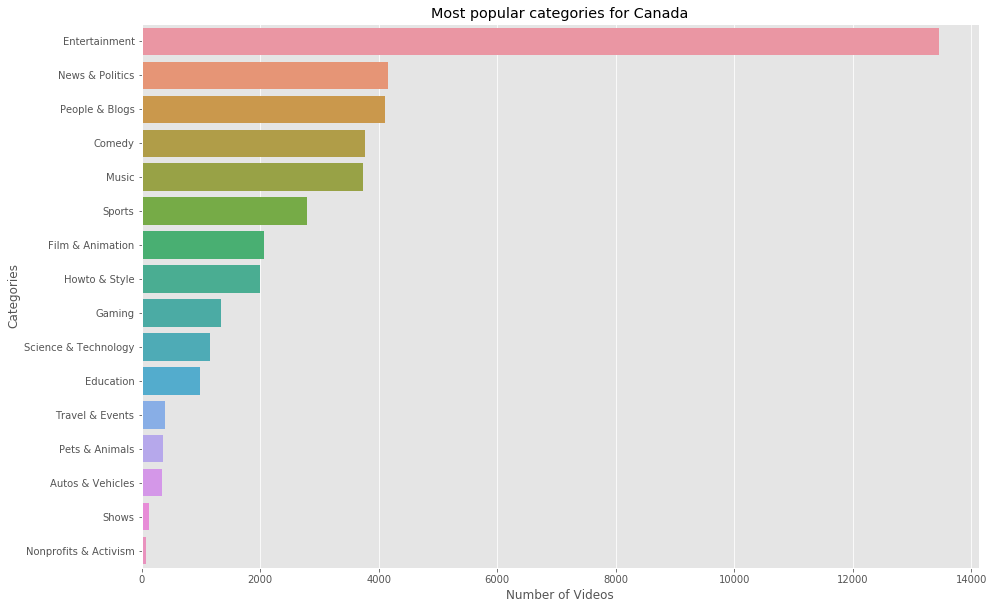

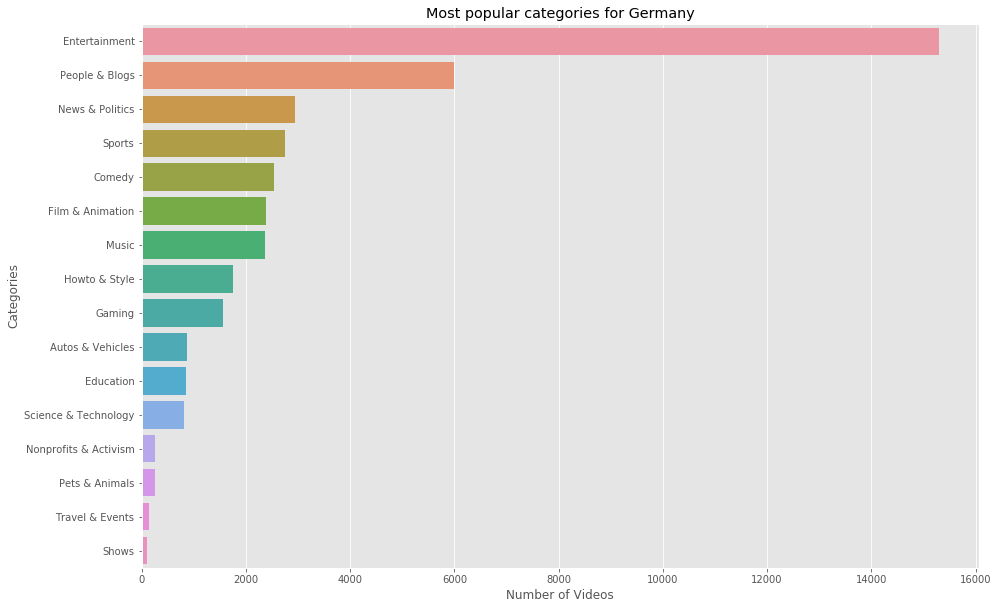

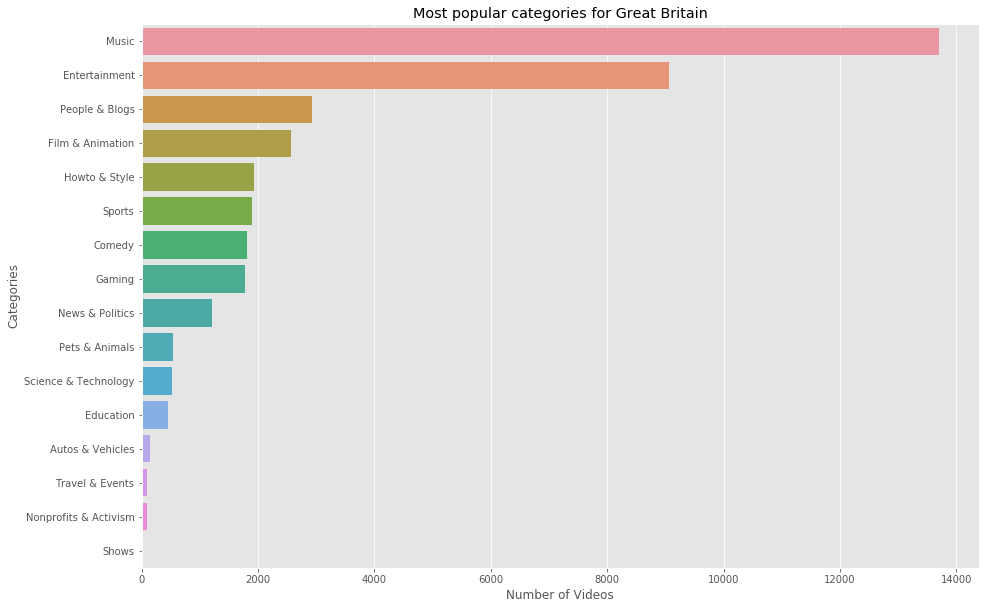

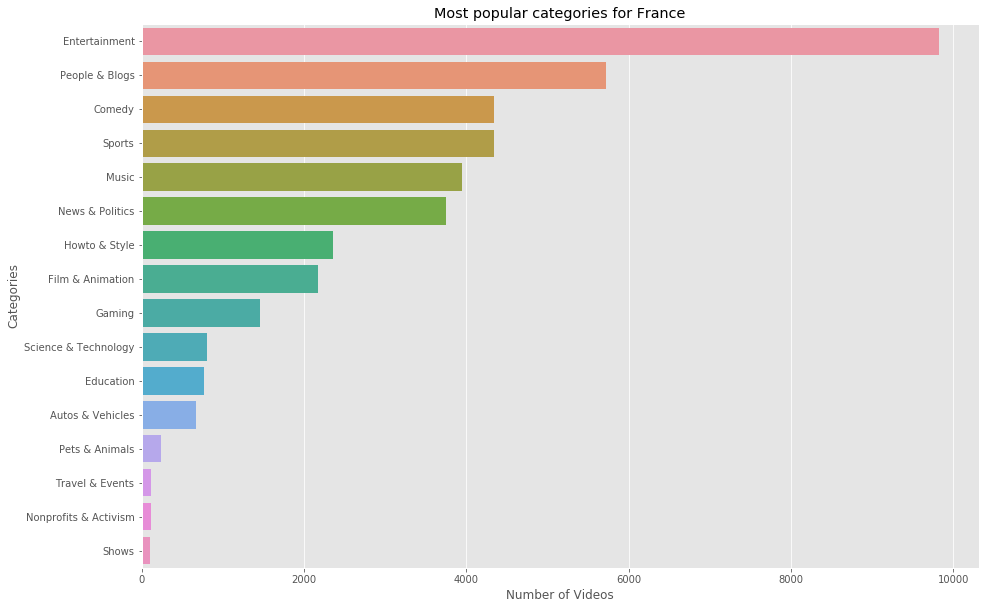

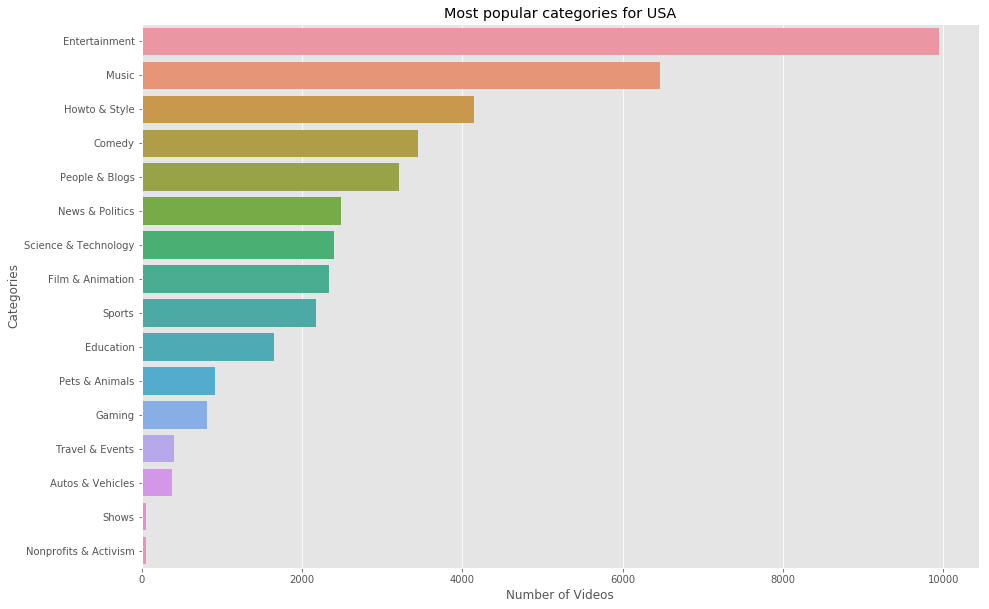

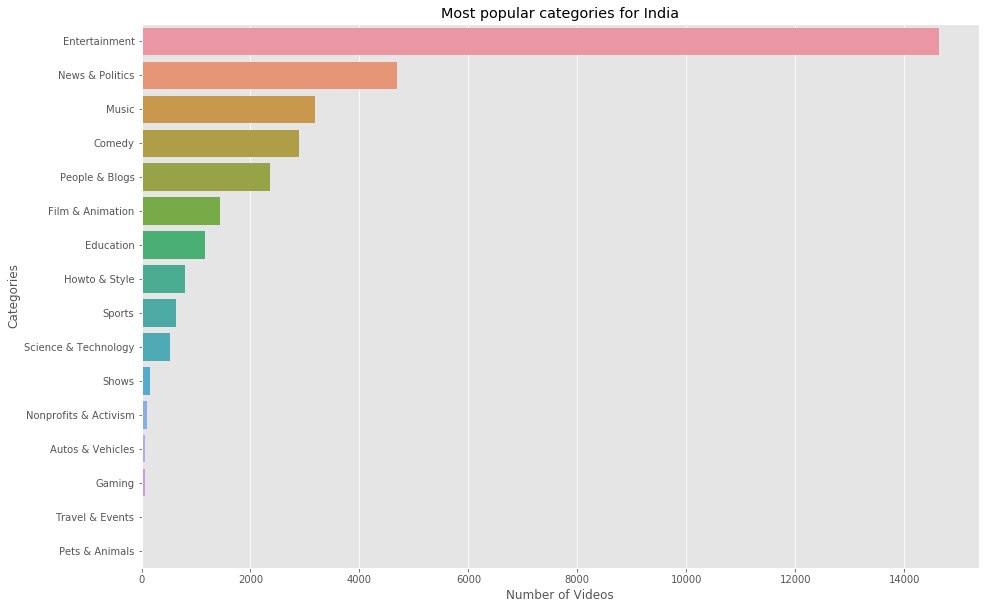

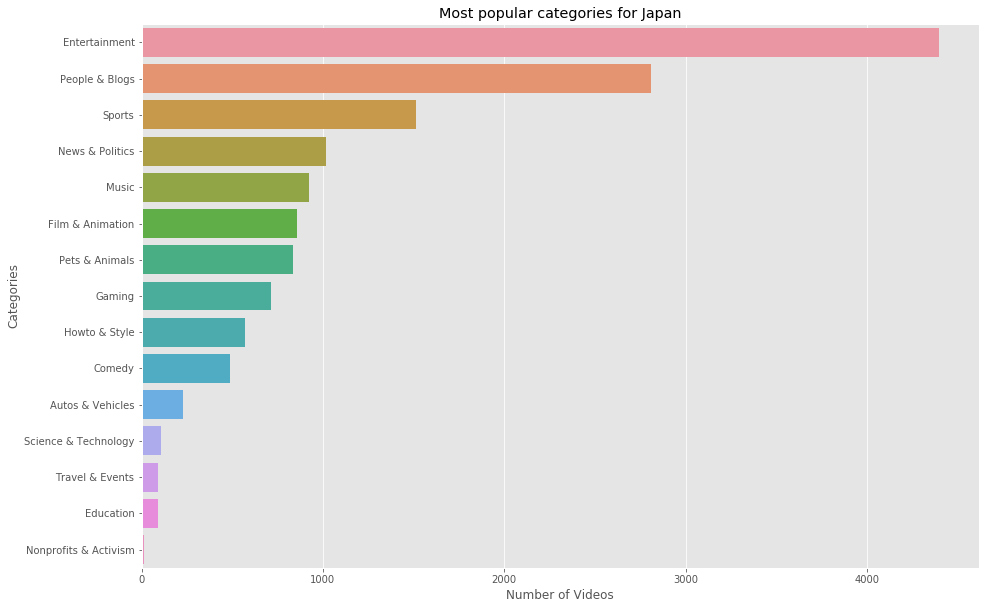

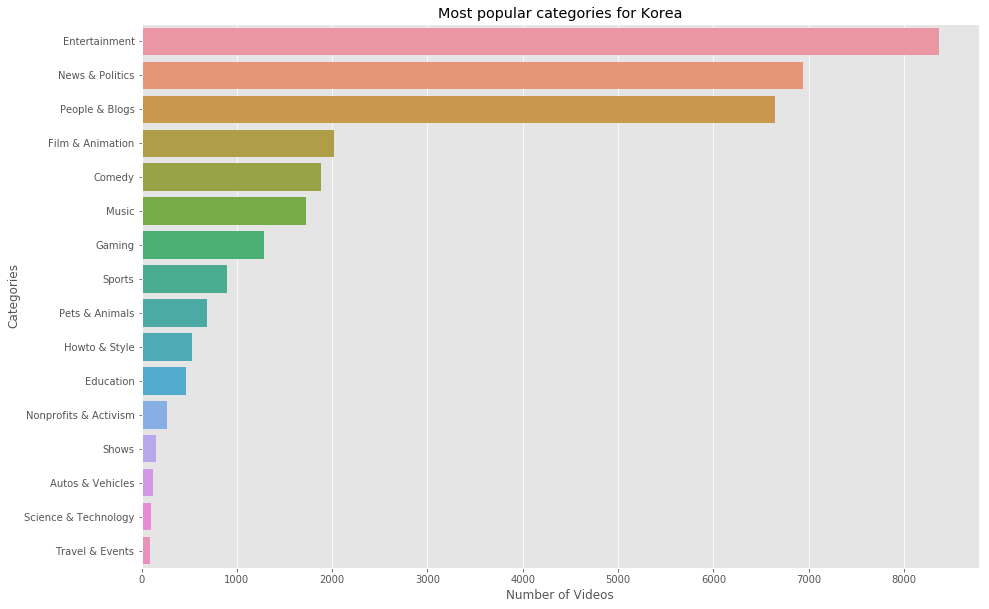

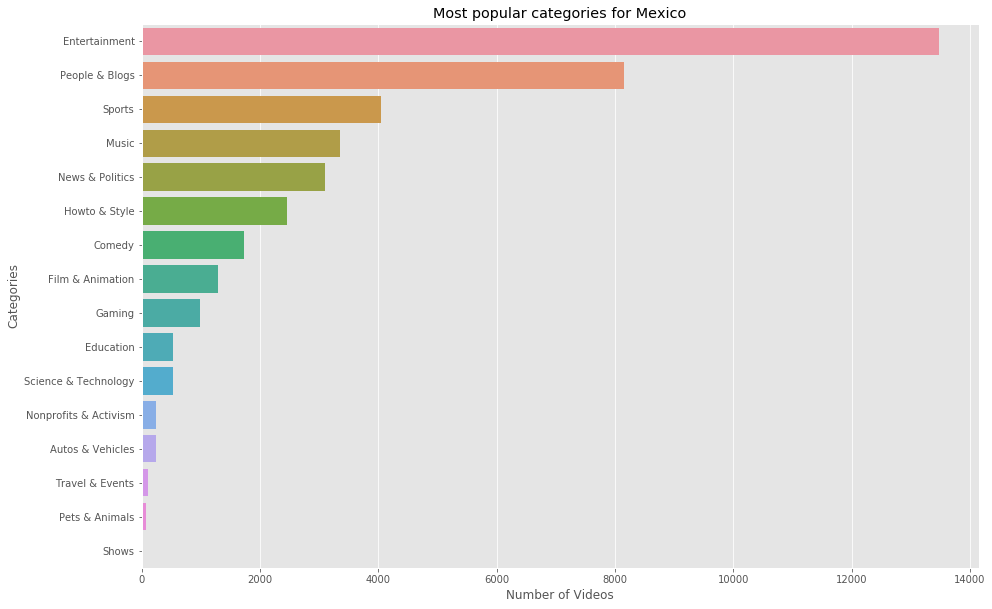

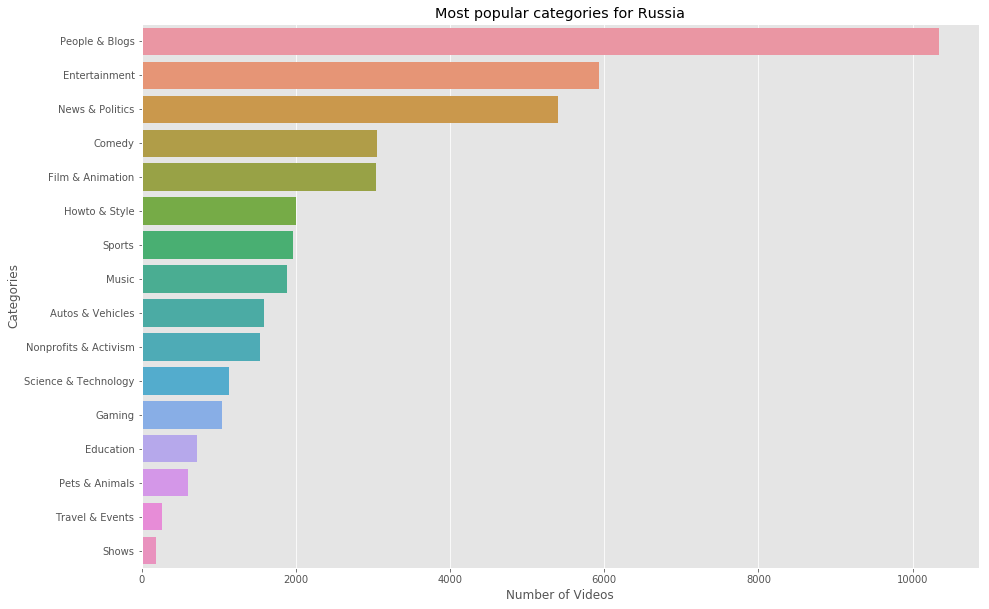

In [37]:
for c in countries:
    country_data = all_data[all_data['country']==c]
    print('\033[1m' + c)
    print('\033[1m' + "Categories" + '\033[0m') # '\033[1m' is bold, '\033[0m' is the end
    country_data.category.value_counts() #most popular categories
    categ = country_data.category.value_counts().reset_index()
    
    plt.figure(figsize=(15,10))
    ax = sns.barplot(y=categ['index'],x=categ['category'], data=categ)
    plt.xlabel("Number of Videos")
    plt.ylabel("Categories")
    plt.title("Most popular categories for "+c)

Canada
Channels


SET India                             192
MSNBC                                 189
FBE                                   188
The Young Turks                       186
REACT                                 183
VikatanTV                             182
CNN                                   182
The Late Show with Stephen Colbert    172
RadaanMedia                           168
ARY Digital                           168
Philip DeFranco                       167
MLG Highlights                        165
Comment Awards                        163
BuzzFeedVideo                         160
Good Mythical Morning                 157
CollegeHumor                          153
TheEllenShow                          150
Breakfast Club Power 105.1 FM         149
The View                              149
Late Night with Seth Meyers           148
Name: channel_title, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Channels')

Text(0.5, 1.0, 'Most popular channels for Canada')

Germany
Channels


Galileo                               200
Ruhrpottwache                         185
Анатолий Шарий                        182
Auf Streife                           180
Çukur                                 180
atv                                   179
Promiflash                            172
JP Performance                        159
The Daily Show with Trevor Noah       140
Söz Dizi                              140
Adını Sen Koy                         134
Klinik am Südring                     133
Россия 24                             131
VikatanTV                             130
Made My Day                           130
Esra Erol'da                          127
The Late Show with Stephen Colbert    126
Sallys Welt                           126
Beni Affet                            125
World Wide Wohnzimmer                 123
Name: channel_title, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Channels')

Text(0.5, 1.0, 'Most popular channels for Germany')

Great Britain
Channels


TheEllenShow                              205
The Tonight Show Starring Jimmy Fallon    205
Jimmy Kimmel Live                         204
Saturday Night Live                       203
WWE                                       202
The Late Late Show with James Corden      199
Late Night with Seth Meyers               191
Breakfast Club Power 105.1 FM             191
The Late Show with Stephen Colbert        187
Netflix                                   184
SMTOWN                                    178
Warner Bros. Pictures                     168
Movieclips Trailers                       162
RedLetterMedia                            161
BBC Radio 1                               157
jypentertainment                          155
PewDiePie                                 151
Marvel Entertainment                      147
TMZSports                                 145
WORLDSTARHIPHOP                           142
Name: channel_title, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Channels')

Text(0.5, 1.0, 'Most popular channels for Great Britain')

France
Channels


Troom Troom FR                  195
Elhiwar Ettounsi                181
sam zirah                       173
Lama Faché                      171
Marodi TV Sénégal               169
VikatanTV                       167
Touche pas à mon poste !        157
Çukur                           151
Topito                          150
RadaanMedia                     147
Lolywood                        143
THIRU TV                        139
Attessia TV                     137
France Inter                    134
WatchMojo Français              133
Un gars une fille | Officiel    128
BRICO SYMPA                     128
Dr Nozman                       125
Okay.africa                     124
NDEKO ELIEZER TOKOKOMA          123
Name: channel_title, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Channels')

Text(0.5, 1.0, 'Most popular channels for France')

USA
Channels


ESPN                                      202
The Tonight Show Starring Jimmy Fallon    197
Netflix                                   193
Vox                                       192
TheEllenShow                              192
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         185
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
CNN                                       179
Saturday Night Live                       174
WIRED                                     170
BuzzFeedVideo                             169
INSIDER                                   167
The Late Late Show with James Corden      163
TED-Ed                                    162
Tom Scott                                 159
WWE                                       157
CollegeHumor                              156
Name: channel_title, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Channels')

Text(0.5, 1.0, 'Most popular channels for USA')

India
Channels


etvteluguindia        204
VikatanTV             204
SAB TV                203
ETV Plus India        203
Study IQ education    202
Flowers Comedy        201
Tarang TV             199
SET India             195
Mazhavil Manorama     195
RadaanMedia           193
V6 News Telugu        189
Technical Guruji      186
mallemalatv           184
Vijay Television      181
ETV Jabardasth        180
Saregama TVShows      178
zeetvtelugu           176
Colors TV             173
T-Series              172
zeetv                 168
Name: channel_title, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Channels')

Text(0.5, 1.0, 'Most popular channels for India')

Japan
Channels


DHCテレビ                 98
釣りよかでしょう。              84
MAX鈴木 TV               67
釣りよか飯                  66
TV Derana              59
今日ヤバイ奴に会った             58
釣りいろは                  54
ブチかまし                  54
MEGWIN TV              51
はいじぃ迷作劇場               50
釣りよかHOUSE              50
AbemaTV公式 YouTube      49
kattyanneru/かっちゃんねる    47
Momo and Tenももと天       46
水溜りボンド                 46
Afro Blue              43
Kohachannel            41
ハイサイ探偵団                40
avex                   40
Touch Play             39
Name: channel_title, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Channels')

Text(0.5, 1.0, 'Most popular channels for Japan')

Korea
Channels


도봉박홍기                     198
신의한수                      193
정규재TV                     188
보겸 TV                     168
JTBC News                 163
윤창중칼럼세상 TV                162
철구형 (CHULTUBE)            149
밴쯔                        148
1등 미디어                    144
최고다윽박                     142
뉴스데일리베스트                  142
영국남자 Korean Englishman    140
TV Derana                 138
tbs 시민의 방송                130
YTN NEWS                  121
Ripple_S                  120
조갑제TV                     119
프란                        118
옴니버스                      117
매직텔러                      113
Name: channel_title, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Channels')

Text(0.5, 1.0, 'Most popular channels for Korea')

Mexico
Channels


Cracks                     185
Badabun                    184
Troom Troom Es             167
Cracks MX                  162
Las Estrellas              154
Televisa Telenovelas       149
El Salvador 4K             145
Tu COSMOPOLIS              142
Enamorándonos              136
Ventaneando                133
Draw My Life en Español    130
Azteca Novelas             130
Campechaneando             128
TikTak Draw                128
Imagen Entretenimiento     126
Venga La Alegría           125
GENIAL                     120
Eliot Channel Mx           119
Franco Escamilla           119
IDEAS EN 5 MINUTOS         117
Name: channel_title, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Channels')

Text(0.5, 1.0, 'Most popular channels for Mexico')

Russia
Channels


Анатолий Шарий                                         197
Эхо Москвы                                             184
Модные Практики с Паукште Ириной Михайловной           169
Wylsacom                                               166
Россия 24                                              159
kamikadzedead                                          159
След - новый сезон                                     155
Калнина Наталья                                        154
PanArmenian TV                                         152
Трум Трум                                              144
Конец близок или свидетели финансового апокалипсиса    140
НТВ                                                    138
Xəzər Media                                            136
DaiFiveTop                                             134
Yoll                                                   132
Акыркы Кабарлар - Санжар Калматай                      132
telblog.net                                            1

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Channels')

Text(0.5, 1.0, 'Most popular channels for Russia')

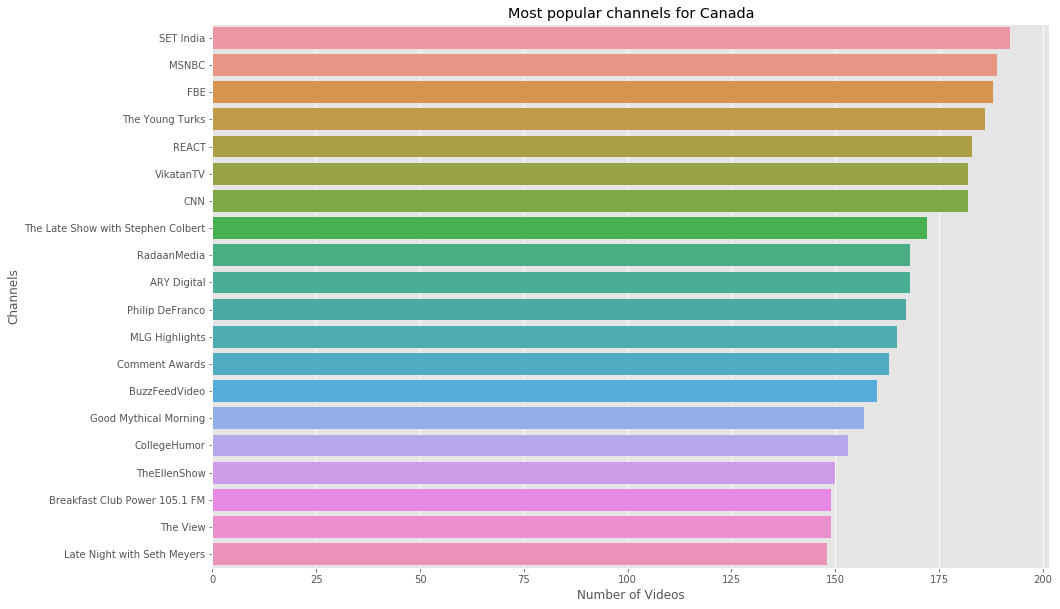

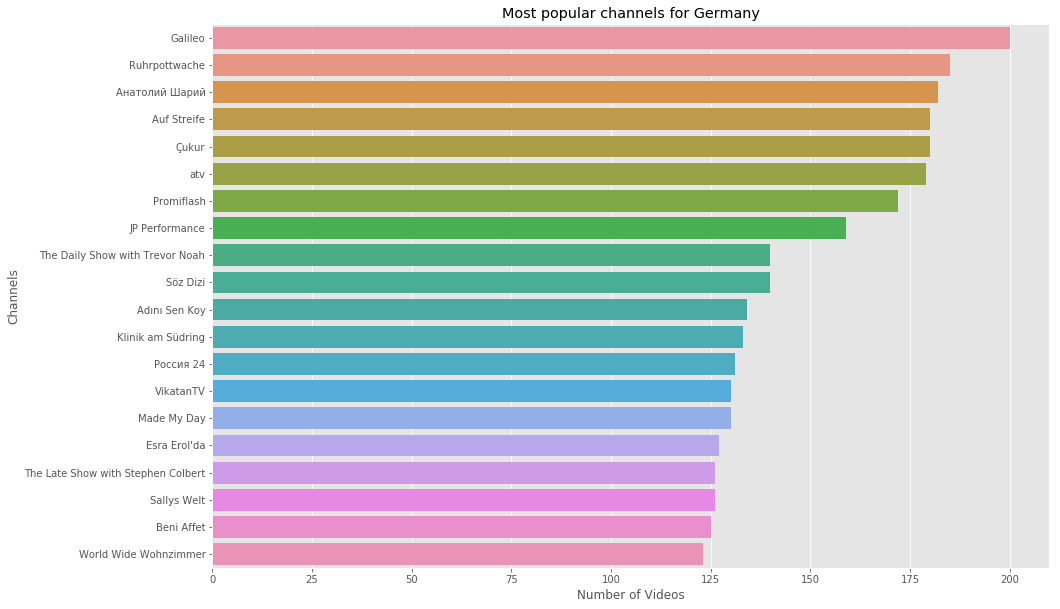

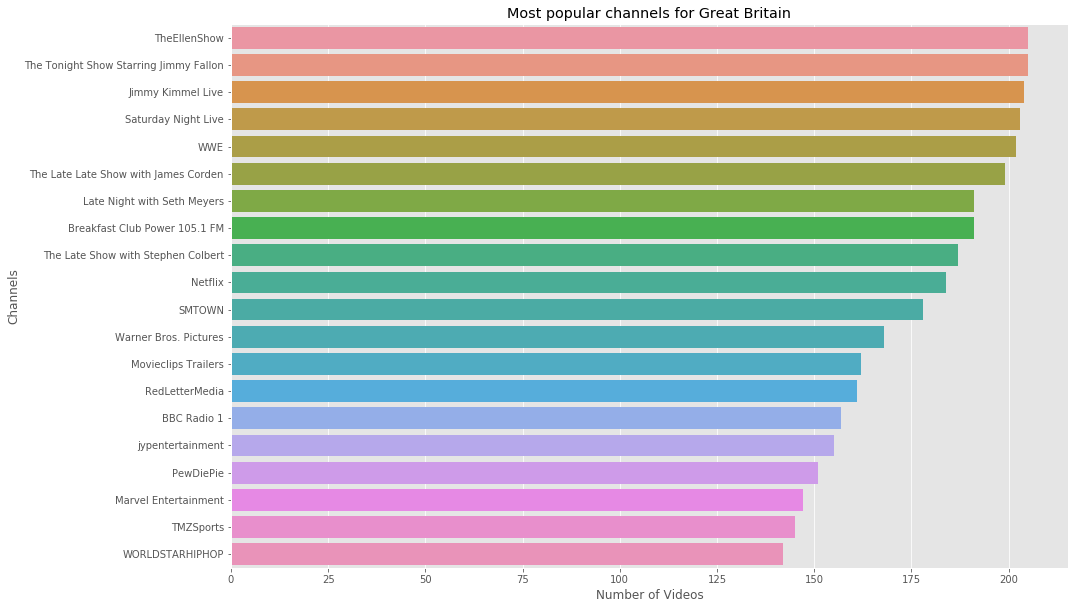

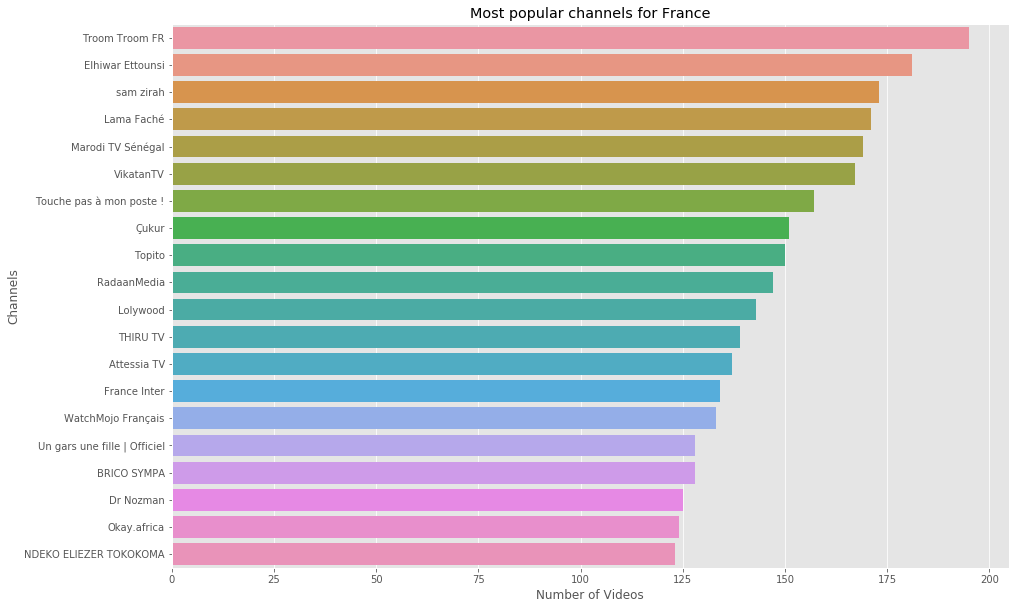

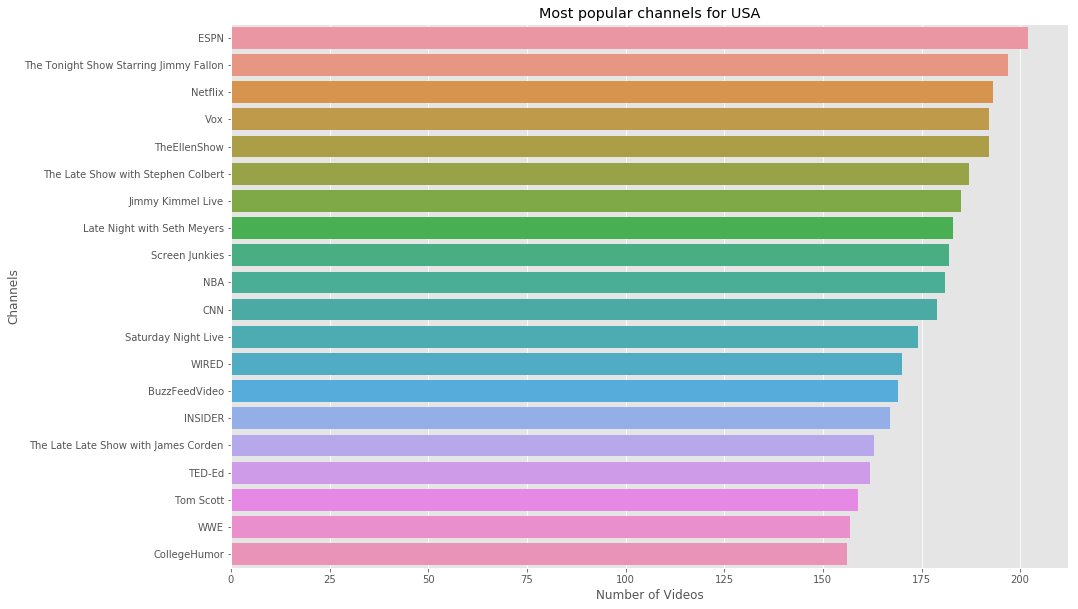

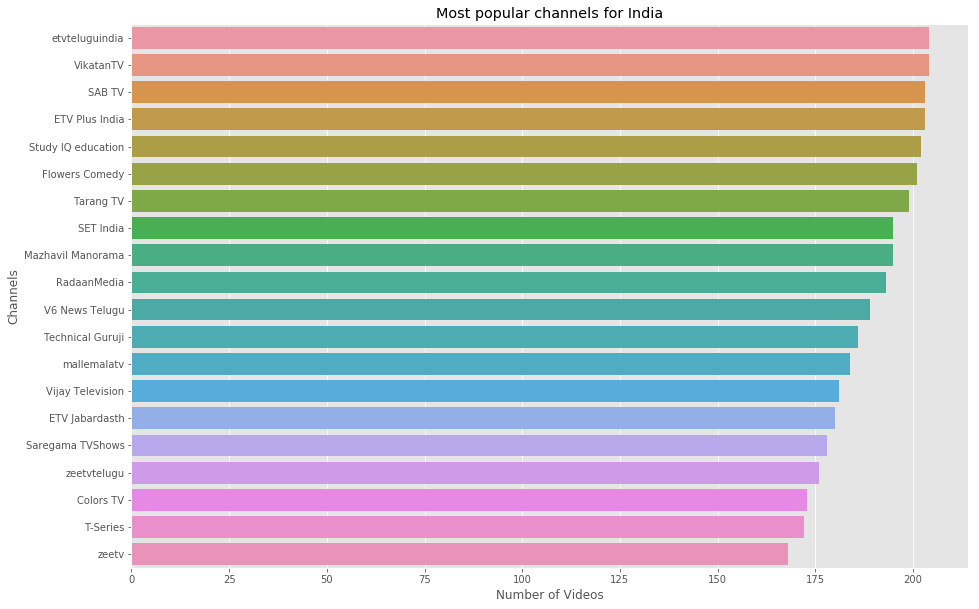

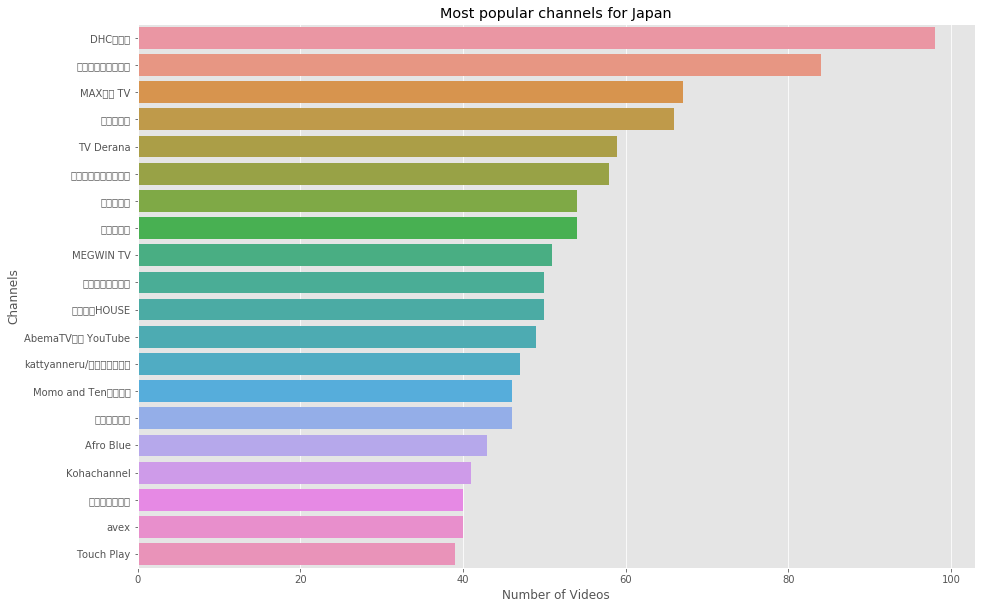

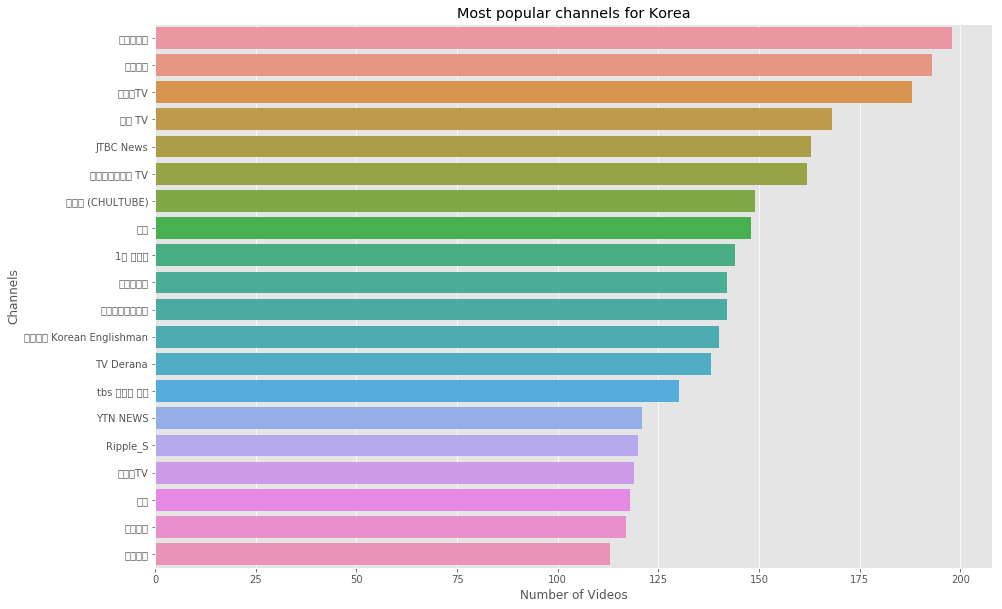

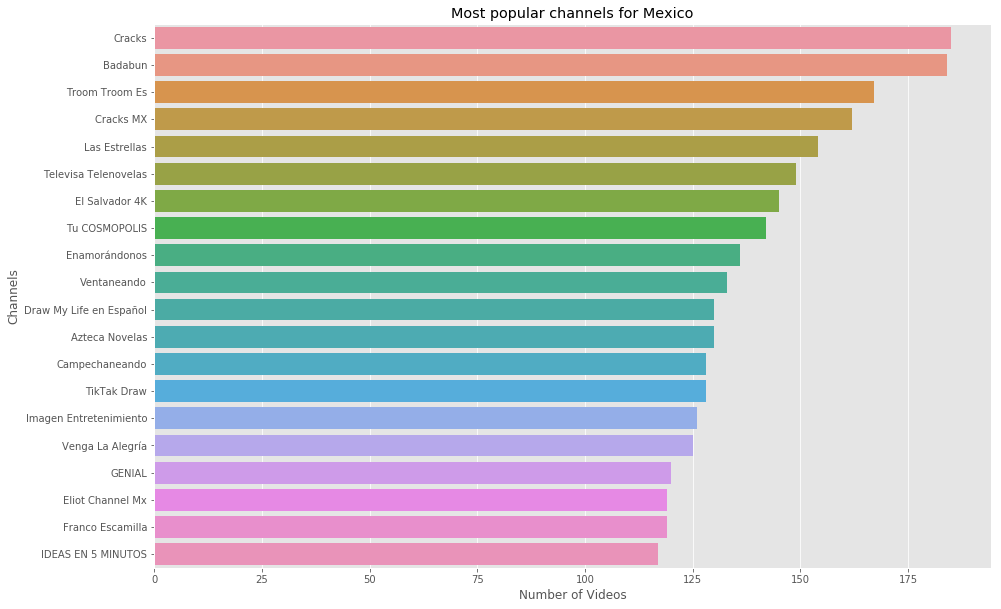

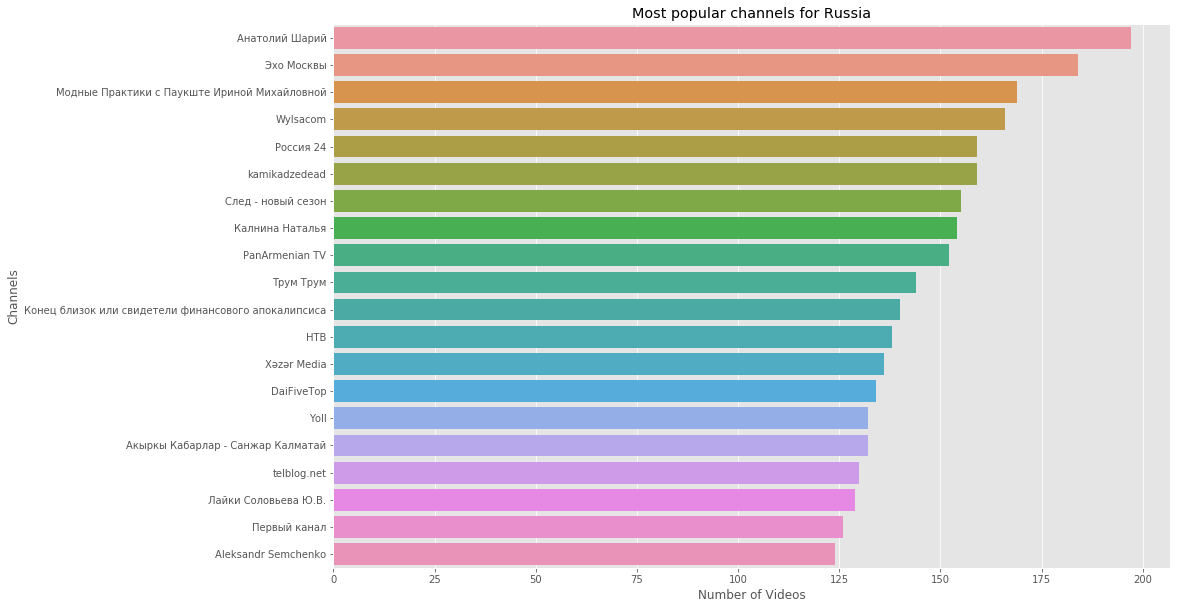

In [38]:
for c in countries:
    country_data = all_data[all_data['country']==c]
    print('\033[1m' + c)
    print('\033[1m' + "Channels")
    country_data.channel_title.value_counts().head(20) #Most popular channels
    chan = country_data.channel_title.value_counts().head(20).reset_index()
    
    plt.figure(figsize=(15,10))
    ax = sns.barplot(y=chan['index'],x=chan['channel_title'], data=chan)
    plt.xlabel("Number of Videos")
    plt.ylabel("Channels")
    plt.title("Most popular channels for "+c)

Canada
Tags


funny              3416
comedy             2432
nan                2386
news               1452
2018               1147
video              1034
politics           1010
humor               959
food                915
review              911
music               875
reaction            854
2017                767
family friendly     764
talk show           757
interview           750
comedian            730
donald trump        693
News                675
trump               660
funny videos        655
react               637
Donald Trump        634
television          627
how to              622
nba                 618
entertainment       594
science             593
basketball          582
sports              575
jokes               569
podcast             547
celebrity           546
hollywood           544
movie               543
show                539
family              530
game                520
Entertainment       518
Comedy              516
rap                 506
animation       

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Tags')

Text(0.5, 1.0, 'Most popular tags for Canada')

Germany
Tags


nan                   3031
2018                  1399
funny                 1232
comedy                1192
deutsch               1122
TV                    1064
tv                     911
german                 734
2017                   722
news                   708
atv                    689
dizi                   671
lustig                 645
music                  585
rap                    565
Deutschland            560
star tv                512
essen                  509
Comedy                 506
Reality TV             505
humor                  497
review                 496
SAT.1                  493
video                  490
Highlights             478
diy                    476
yeni dizi              453
challenge              445
DIY                    441
hd                     420
comedian               413
AfD                    411
vlog                   410
youtube                397
tricks                 395
show                   390
kochen                 389
F

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Tags')

Text(0.5, 1.0, 'Most popular tags for Germany')

Great Britain
Tags


funny             2609
comedy            2299
nan               2002
music             1953
Pop               1549
2018              1374
video             1180
music video       1150
Records           1130
interview         1115
official          1101
humor             1060
live               993
Rap                983
vlog               956
trailer            935
movie              864
hip hop            850
celebrity          827
Music              826
comedian           803
Trailer            777
2017               754
rap                749
late night         740
celebrities        733
new                721
hollywood          717
pop                704
film               694
funny video        673
television         671
jokes              667
star wars          650
Hip Hop            639
christmas          614
news               610
review             609
Comedy             597
Alternative        591
entertainment      591
fashion            583
Hop                579
NBC        

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Tags')

Text(0.5, 1.0, 'Most popular tags for Great Britain')

France
Tags


nan               5304
humour            2034
2018              1489
football          1176
france             835
2017               628
rap                627
video              614
divertissement     609
musique            603
live               602
tv                 596
freestyle          552
interview          550
funny              539
France             524
foot               514
senegal            482
paris              468
drole              466
français           461
sport              461
vidéo              456
sketch             447
amour              433
news               429
film               423
série              412
tuto               411
maroc              409
replay             407
comedy             398
fun                388
vlog               385
top 10             385
theatre            383
fr                 381
zap                381
politique          380
clip               353
télé réalité       352
rire               352
couple             352
recette    

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Tags')

Text(0.5, 1.0, 'Most popular tags for France')

USA
Tags


funny              3597
comedy             2927
how to             1602
nan                1534
music              1298
Pop                1278
2018               1270
humor              1184
food               1159
science            1111
review             1004
makeup              989
news                987
celebrity           930
vlog                926
video               888
tutorial            864
comedian            859
live                859
interview           845
cooking             802
television          776
celebrities         768
fun                 736
movie               734
cute                727
family friendly     716
Comedy              715
trailer             709
Trailer             701
beauty              694
official            689
2017                676
hollywood           674
funny video         673
NBC                 673
challenge           658
animation           652
entertainment       651
education           648
Records             647
sports          

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Tags')

Text(0.5, 1.0, 'Most popular tags for USA')

India
Tags


comedy                       2028
funny                        1787
show                         1269
television                   1269
nan                          1265
serial                       1206
full episode                 1185
daily soap                   1130
watch online                 1119
funny videos                 1056
latest news                   892
2018                          863
news                          828
India                         758
telugu                        727
bollywood                     716
hindi                         686
jabardasth                    674
latest                        671
entertainment                 668
india                         665
Zee5                          656
punjabi songs                 645
breaking news                 616
extra jabardasth              598
tollywood                     538
comedy videos                 531
Comedy                        477
ozee                          472
telugu news   

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Tags')

Text(0.5, 1.0, 'Most popular tags for India')

Japan
Tags


nan         2285
料理           555
おもしろ         452
猫            433
ニュース         390
お笑い          363
アニメ          363
かわいい         355
釣り           319
大食い          312
funny        309
cat          307
動画           287
可愛い          277
ゲーム          276
爆笑           273
面白           270
衝撃           259
レシピ          250
面白い          242
UUUM         238
実況           236
cute         235
YouTuber     230
japan        225
japanese     225
ねこ           225
都市伝説         216
YouTube      214
検証           210
釣りよかでしょう     205
ネコ           201
dog          200
佐賀よかでしょう     200
チャレンジ        197
楽しい          195
山口達也         194
大谷翔平         192
作り方          192
TOKIO        189
2018         188
ドッキリ         186
子猫           186
実験           183
映画           182
韓国           181
乃木坂46        179
プロ野球         173
ネタ           170
政治           168
Name: tags, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Tags')

Text(0.5, 1.0, 'Most popular tags for Japan')

Korea
Tags


nan        6702
먹방         1896
문재인        1645
뉴스         1201
김정은         932
철구          907
리뷰          888
트럼프         783
박근혜         733
영화          695
mukbang     687
방탄소년단       679
대도서관        647
홍준표         624
이명박         614
꿀잼          606
밴쯔          606
레전드         601
북한          591
한국          584
자유한국당       578
미국          565
워너원         549
웃긴          529
고양이         519
양띵          518
게임          511
김어준         510
korean      507
아프리카        499
BTS         495
BJ          493
아프리카TV      493
대한민국        484
평창올림픽       471
아이돌         466
청와대         461
일본          457
장난감         454
안철수         441
허팝          438
악어          436
남자          434
영국남자        434
중국          430
예능          426
윰댕          425
JTBC        421
웃긴영상        414
감스트         414
Name: tags, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Tags')

Text(0.5, 1.0, 'Most popular tags for Korea')

Mexico
Tags


nan                7678
2018               1696
noticias           1299
mexico             1253
Televisa            901
2017                795
tv azteca           788
de                  755
comedia             702
español             679
viral               676
video               663
amor                657
humor               599
entretenimiento     583
top                 581
famosos             569
futbol              559
funny               556
amlo                553
videos              548
Noticias            522
televisa            513
tops                491
México              478
curiosidades        476
chismes             472
messi               470
resumen             465
enamorandonos       443
AMLO                442
news                431
goles               419
recetas             415
morena              409
youtube             396
top 10              386
pri                 375
vs                  375
Real Madrid         370
trucos              368
musica          

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Tags')

Text(0.5, 1.0, 'Most popular tags for Mexico')

Russia
Tags


nan                  3982
юмор                 1910
новости              1792
2018                 1667
обзор                1633
политика             1629
путин                1411
россия               1167
Россия               1164
Путин                1058
приколы              1032
топ                  1010
выборы                885
шоу                   773
2017                  761
прикол                749
своими руками         715
экономика             679
последние новости     660
видео                 651
кино                  616
сериал                595
клип                  588
угар                  583
влог                  581
факты                 581
подборка              524
любовь                518
интервью              514
лучшее                513
украина               491
топ 10                489
смешно                484
Навальный             476
президент             475
рецепт                473
фильм                 470
музыка                466
Украина     

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Videos')

Text(0, 0.5, 'Tags')

Text(0.5, 1.0, 'Most popular tags for Russia')

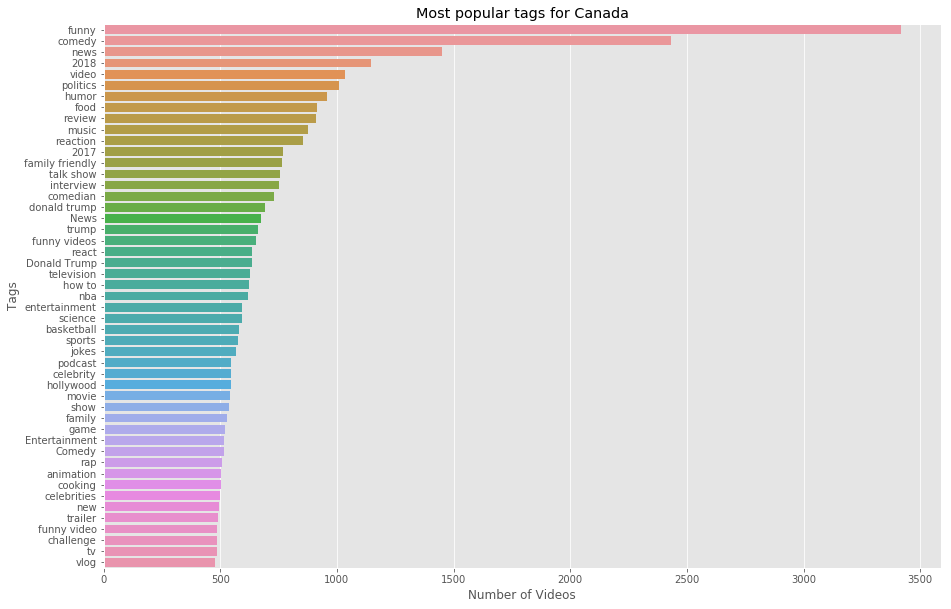

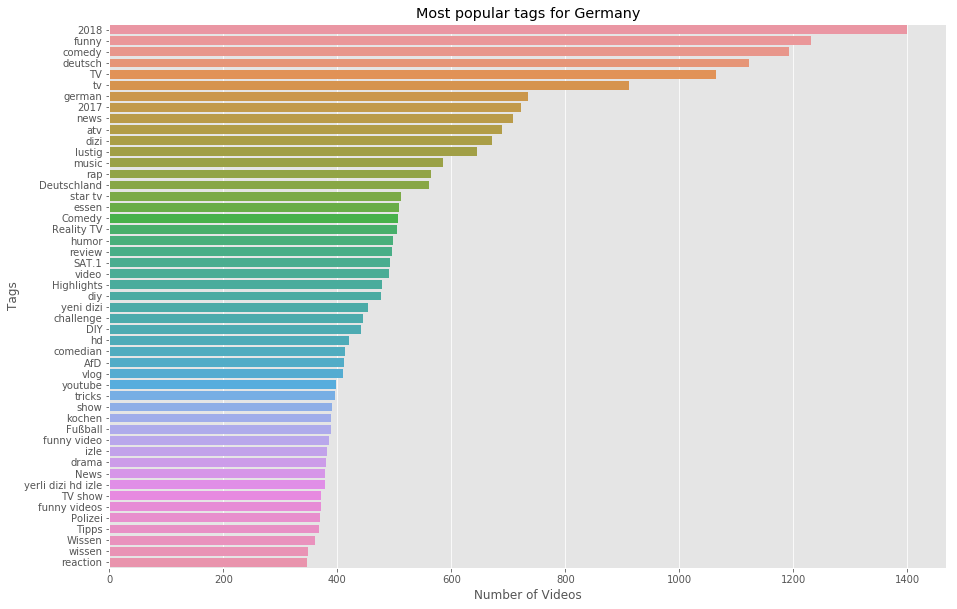

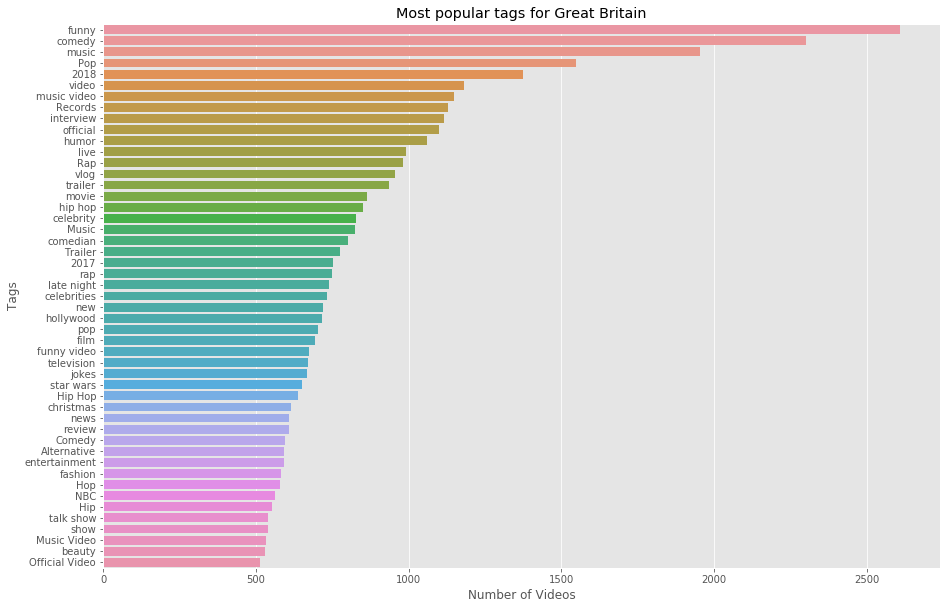

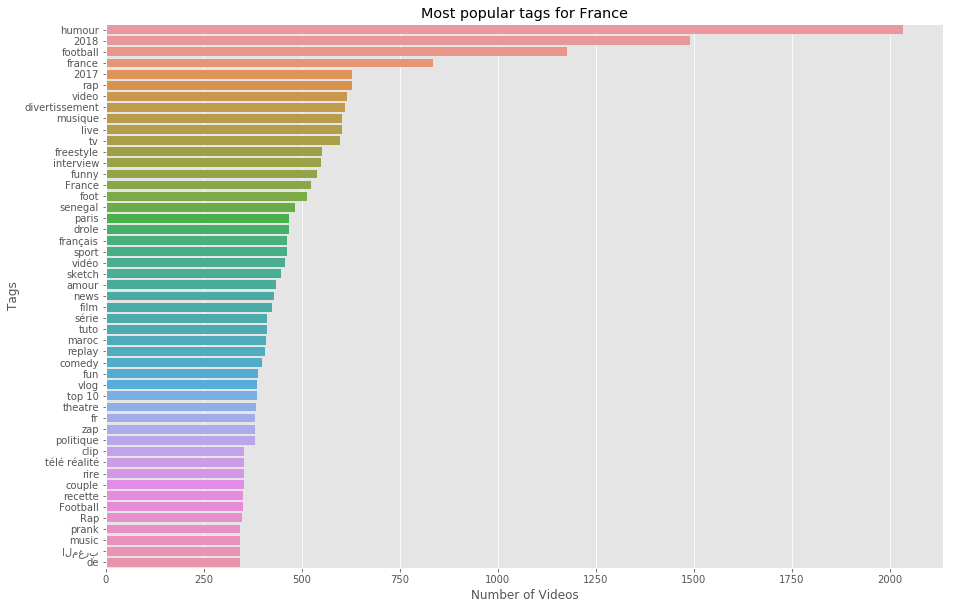

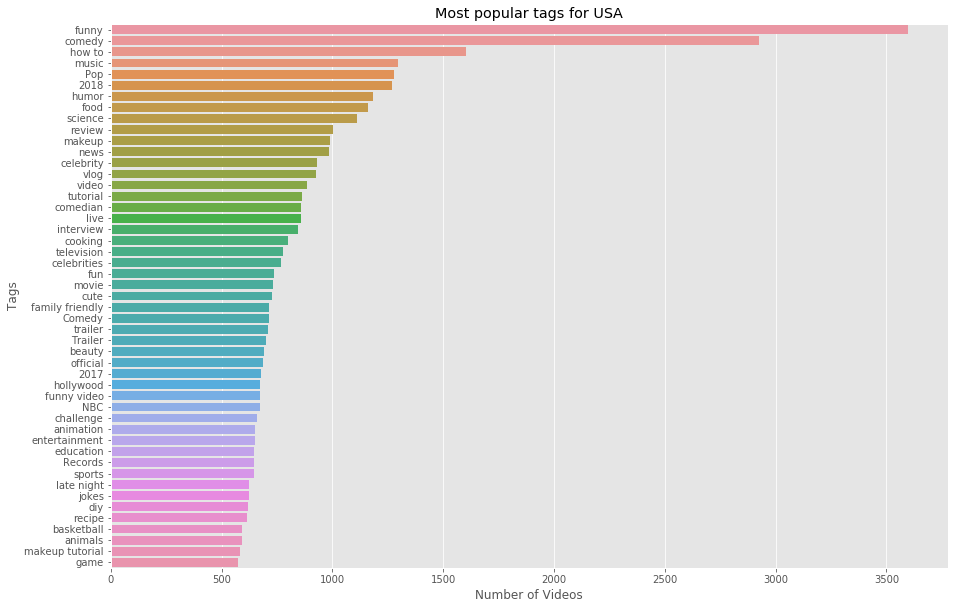

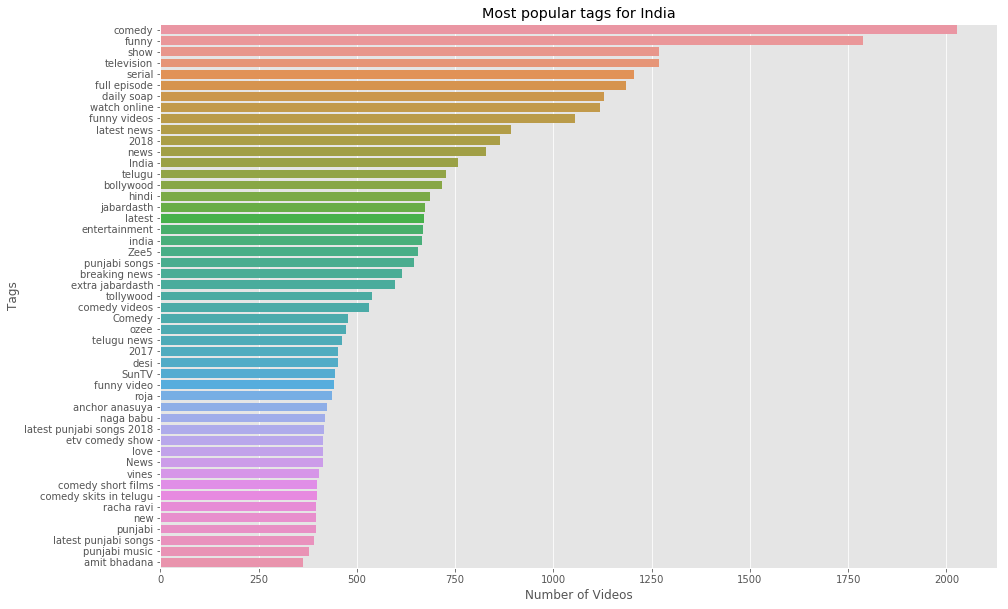

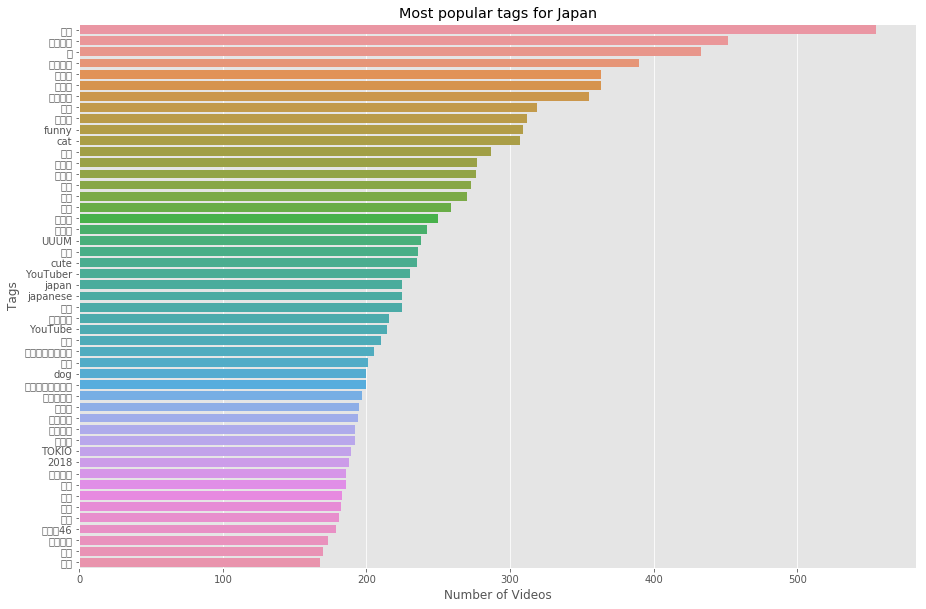

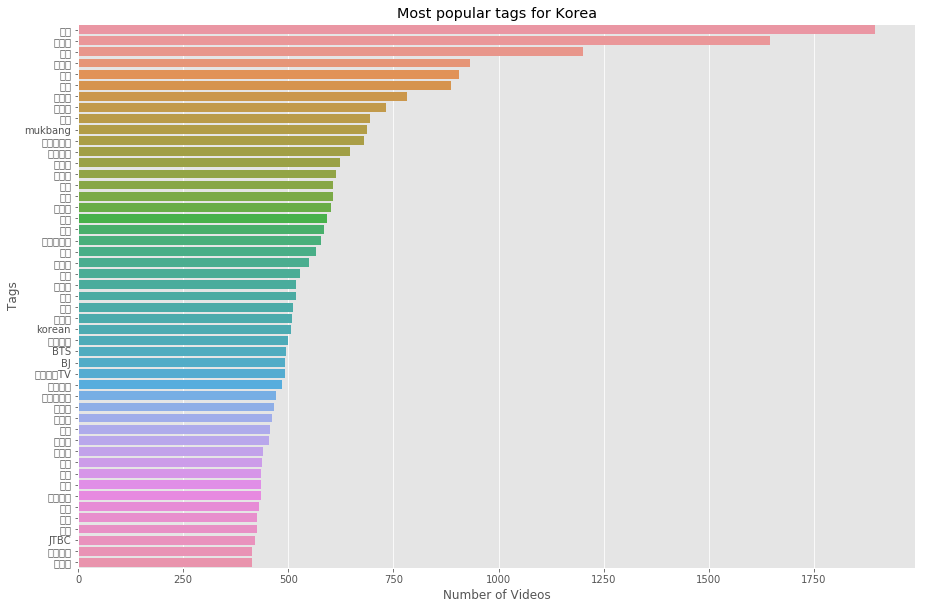

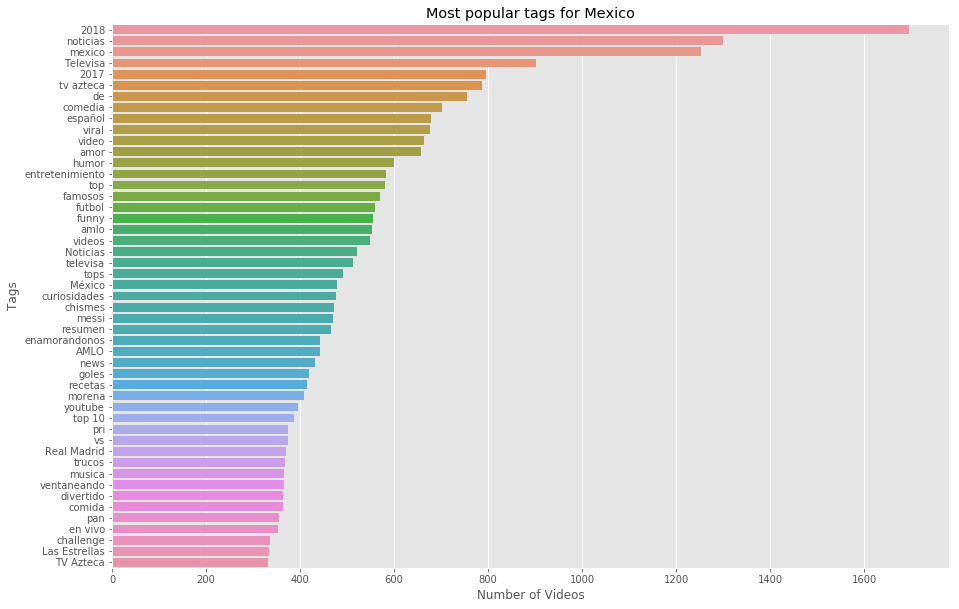

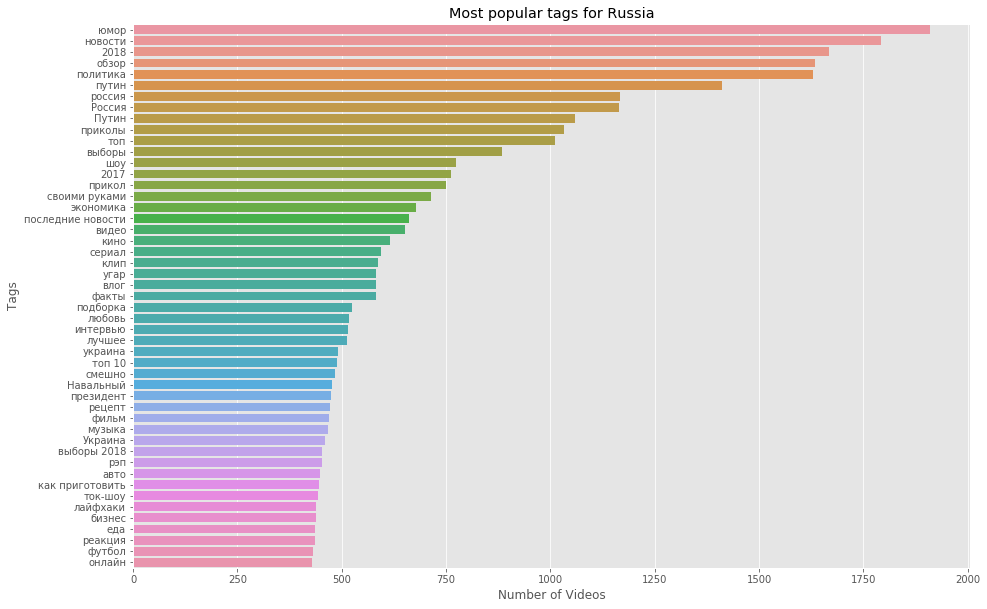

In [39]:
for c in countries:
    country_data = all_data[all_data['country']==c]
    print('\033[1m' + c)
    print('\033[1m' + "Tags")
    tags=[]
    for a in country_data.tags:
        for tag in str(a).split(','):
            tags.append(tag)
    df = pd.DataFrame(tags,columns=['tags'])
    df.tags.value_counts().head(50)
    tag = df.tags.value_counts().head(50).reset_index()
    
    tag=tag.drop(tag.index[tag['index']=='nan'].tolist()[0]) # drop the nan value
    
    plt.figure(figsize=(15,10))
    ax = sns.barplot(y=tag['index'],x=tag['tags'], data=tag)
    plt.xlabel("Number of Videos")
    plt.ylabel("Tags")
    plt.title("Most popular tags for "+c)

In [40]:
#Most popular attributes for each country separately
for c in countries:
    country_data = all_data[all_data['country']==c]
    print('\033[1m' + c)
    
    #Biggest views
    print('\033[1m' + "Views")
    biggestViews = country_data.views.nlargest(500) #500 biggest viewed videos
    views = []
    for i in range(len(biggestViews)):
        views.append(country_data.loc[biggestViews.index[i]])
    views=pd.DataFrame(views) #all 500 videos in dataframe

    unique_views = views.video_id.unique() #unique video ids from 500 videos
    biggestViews20 = []
    for i in range(20):
        biggestViews20.append(views[views.video_id==unique_views[i]].iloc[0]) #find the first video with such id
    biggestViews20 = pd.DataFrame(biggestViews20)
    biggestViews20["likes/all"] = biggestViews20.likes/(biggestViews20.likes+biggestViews20.dislikes)
    biggestViews20["dislikes/all"] = biggestViews20.dislikes/(biggestViews20.likes+biggestViews20.dislikes)
    biggestViews20 #first 20 unique video with biggest views

    #Biggest amount of likes
    print('\033[1m' + "Likes")
    biggestLikes = country_data.likes.nlargest(500) #500 most liked videos
    likes = []
    for i in range(len(biggestLikes)):
        likes.append(country_data.loc[biggestLikes.index[i]])
    likes=pd.DataFrame(likes) #all 500 videos in dataframe

    unique_likes = likes.video_id.unique() #unique video ids from 500 videos
    biggestLikes20 = []
    for i in range(20):
        biggestLikes20.append(likes[likes.video_id==unique_likes[i]].iloc[0]) #find the first video with such id
    biggestLikes20 = pd.DataFrame(biggestLikes20)
    biggestLikes20["likes/all"] = biggestLikes20.likes/(biggestLikes20.likes+biggestLikes20.dislikes)
    biggestLikes20["dislikes/all"] = biggestLikes20.dislikes/(biggestLikes20.likes+biggestLikes20.dislikes)
    biggestLikes20 #first 20 unique video with most likes

    #Biggest amount of dislikes
    print('\033[1m' + "Dislikes")
    biggestDislikes = country_data.dislikes.nlargest(500) #500 most disliked videos
    dislikes = []
    for i in range(len(biggestDislikes)):
        dislikes.append(country_data.loc[biggestDislikes.index[i]])
    dislikes=pd.DataFrame(dislikes) #all 500 videos in dataframe

    unique_dislikes = dislikes.video_id.unique() #unique video ids from 500 videos
    biggestDislikes20 = []
    for i in range(20):
        biggestDislikes20.append(dislikes[dislikes.video_id==unique_dislikes[i]].iloc[0]) #find the first video with such id
    biggestDislikes20 = pd.DataFrame(biggestDislikes20)
    biggestDislikes20["likes/all"] = biggestDislikes20.likes/(biggestDislikes20.likes+biggestDislikes20.dislikes)
    biggestDislikes20["dislikes/all"] = biggestDislikes20.dislikes/(biggestDislikes20.likes+biggestDislikes20.dislikes)
    biggestDislikes20 #first 20 unique video with most dislikes

    #Biggest amount of comments
    print('\033[1m' + "Comments")
    biggestComments = country_data.comment_count.nlargest(500) #500 most commented videos
    comments = []
    for i in range(len(biggestComments)):
        comments.append(country_data.loc[biggestComments.index[i]])
    comments=pd.DataFrame(comments) #all 500 videos in dataframe

    unique_comments = comments.video_id.unique() #unique video ids from 500 videos
    biggestComments20 = []
    for i in range(20):
        biggestComments20.append(comments[comments.video_id==unique_comments[i]].iloc[0]) #find the first video with such id
    biggestComments20 = pd.DataFrame(biggestComments20)
    biggestComments20["likes/all"] = biggestComments20.likes/(biggestComments20.likes+biggestComments20.dislikes)
    biggestComments20["dislikes/all"] = biggestComments20.dislikes/(biggestComments20.likes+biggestComments20.dislikes)
    biggestComments20 #first 20 unique video with most comments

    #Likes and dislikes rates
    allLikesDislikes = country_data.copy() #calculating likes and dislikes rates
    allLikesDislikes["likes/all"] = allLikesDislikes.likes/(allLikesDislikes.likes+allLikesDislikes.dislikes)
    allLikesDislikes["dislikes/all"] = allLikesDislikes.dislikes/(allLikesDislikes.likes+allLikesDislikes.dislikes)

    #Biggest likes over dislikes rate
    print('\033[1m' + "Likes over dislikes")
    likesDislikes=allLikesDislikes.copy()
    #find where views are bigger than 100 000
    likesDislikes=likesDislikes.where(likesDislikes["views"]>100000).sort_values(by=['likes/all','trending_date'],ascending=False) 
    likesDislikes=likesDislikes.head(500)

    unique_likesDislikes = likesDislikes.video_id.unique() #unique video ids from 500 videos
    biggestlikesDislikes20 = []
    for i in range(20):
        biggestlikesDislikes20.append(likesDislikes[likesDislikes.video_id==unique_likesDislikes[i]].iloc[0]) 
    biggestlikesDislikes20 = pd.DataFrame(biggestlikesDislikes20)
    biggestlikesDislikes20 #first 20 unique video with biggest likes/dislikes rate

    #Biggest dislikes over likes rate
    print('\033[1m' + "Dislikes over likes")
    dislikesLikes=allLikesDislikes.copy()
    #find where views are bigger than 100 000
    dislikesLikes=dislikesLikes.where(dislikesLikes["views"]>100000).sort_values(by=['dislikes/all','trending_date'],ascending=False) 
    dislikesLikes=dislikesLikes.head(500)

    unique_dislikesLikes = dislikesLikes.video_id.unique() #unique video ids from 500 videos
    biggestdislikesLikes20 = []
    for i in range(20):
        biggestdislikesLikes20.append(dislikesLikes[dislikesLikes.video_id==unique_dislikesLikes[i]].iloc[0]) 
    biggestdislikesLikes20 = pd.DataFrame(biggestdislikesLikes20)
    biggestdislikesLikes20 #first 20 unique video with biggest dislikes/likes rate
    



Canada
Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
5900,FlsCjmMhFmw,2017-12-13,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",137843120,3014479,1602383,817582,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Canada,0.652928,0.347072
34361,VYOjWnS4cMY,2018-05-13,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",98938809,3037318,161813,319502,False,False,False,“This is America” by Childish Gambino http://s...,Canada,0.949420,0.050580
4699,6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",89930713,2606665,53011,347982,False,False,False,There was an idea… Avengers: Infinity War. In ...,Canada,0.980069,0.019931
36453,7C2z4GqqS5E,2018-05-23,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",80738011,5053338,165854,1114800,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Canada,0.968222,0.031778
22029,_I_D_8Z4sJE,2018-03-06,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",61163906,629164,23851,26762,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,Canada,0.963476,0.036524
1712,TyHvyGVs42U,2017-11-22,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,Music,2017-11-17 05:00:01,"Luis,Fonsi,Demi,Lovato,Échame,La,Culpa,UMLE,La...",56843038,1904853,87444,108084,False,False,False,“Échame La Culpa” disponible ya en todas las p...,Canada,0.956109,0.043891
31796,u9Mv98Gr5pY,2018-04-30,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",53071887,1243479,44414,134673,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Canada,0.965514,0.034486
17237,BhIEIO0vaBE,2018-02-10,To Our Daughter,Kylie Jenner,People & Blogs,2018-02-04 20:27:38,"Kylie Jenner,Kylie,Travis Scott,Baby,Annoucement",51243149,0,0,0,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,Canada,NaN,NaN
39208,aJOTlE1K90k,2018-06-06,Maroon 5 - Girls Like You ft. Cardi B,Maroon5VEVO,Music,2018-05-31 04:00:00,"Maroon,Girls,Like,You,Interscope,Records*,Pop",47778378,2178332,36133,128810,False,False,False,Girls Like You” is out now.http://smarturl.it/...,Canada,0.983683,0.016317
20055,xpVfcZ0ZcFM,2018-02-24,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",47362934,2469057,31843,158262,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,Canada,0.987267,0.012733


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
36453,7C2z4GqqS5E,2018-05-23,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",80738011,5053338,165854,1114800,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Canada,0.968222,0.031778
34361,VYOjWnS4cMY,2018-05-13,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",98938809,3037318,161813,319502,False,False,False,“This is America” by Childish Gambino http://s...,Canada,0.949420,0.050580
5900,FlsCjmMhFmw,2017-12-13,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",137843120,3014479,1602383,817582,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Canada,0.652928,0.347072
4699,6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",89930713,2606665,53011,347982,False,False,False,There was an idea… Avengers: Infinity War. In ...,Canada,0.980069,0.019931
2873,kTlv5_Bs8aw,2017-11-28,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",27670973,2542863,41122,519092,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Canada,0.984086,0.015914
20055,xpVfcZ0ZcFM,2018-02-24,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",47362934,2469057,31843,158262,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,Canada,0.987267,0.012733
33633,p8npDG2ulKQ,2018-05-09,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",18574625,2407419,21907,340125,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Canada,0.990982,0.009018
21466,OK3GJ0WIQ8s,2018-03-03,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15777624,2392594,21872,437036,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Canada,0.990941,0.009059
30900,ffxKSjUwKdU,2018-04-25,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",45998071,2195120,78228,192685,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Canada,0.965589,0.034411
39208,aJOTlE1K90k,2018-06-06,Maroon 5 - Girls Like You ft. Cardi B,Maroon5VEVO,Music,2018-05-31 04:00:00,"Maroon,Girls,Like,You,Interscope,Records*,Pop",47778378,2178332,36133,128810,False,False,False,Girls Like You” is out now.http://smarturl.it/...,Canada,0.983683,0.016317


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
5900,FlsCjmMhFmw,2017-12-13,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",137843120,3014479,1602383,817582,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Canada,0.652928,0.347072
2898,pOHQdIDds6s,2017-11-28,Jake Paul - It's Everyday Bro (Remix) [feat. G...,Jake Paul,People & Blogs,2017-11-23 00:00:51,"Jake,Paul,logan,paul,its,every,day,Team,10,bro...",12921578,448453,504340,168477,False,False,False,GET IT'S EVERYDAY BRO (REMIX) [feat. Gucci Man...,Canada,0.470672,0.529328
14852,oWjxSkJpxFU,2018-01-29,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",22387656,1919980,461660,625010,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Canada,0.806159,0.193841
305,PRlmRnU9qts,2017-11-15,Jake Paul - Saturday Night (Song) feat. Nick C...,Jake Paul,People & Blogs,2017-11-12 00:26:46,"Jake,Paul,logan,paul,its,every,day,Team,10,bro...",5156718,198368,200391,74776,False,False,False,😃 SUBSCRIBE ► http://bit.ly/SUB2JAKEPAUL | ★ P...,Canada,0.497463,0.502537
6686,LFhT6H6pRWg,2017-12-17,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",961961,7955,190227,24116,False,False,False,Ajit Pai has been at the heart of the net neut...,Canada,0.040140,0.959860
35970,ooyjaVdt-jA,2018-05-21,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,Gaming,2018-05-17 17:09:38,"call of duty,cod,activision,Black Ops 4",7576267,301840,174645,122659,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,Canada,0.633472,0.366528
36453,7C2z4GqqS5E,2018-05-23,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",80738011,5053338,165854,1114800,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Canada,0.968222,0.031778
20325,V5cOvyDpWfM,2018-02-25,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,Sports,2018-02-19 01:37:11,"mlg highlights,mlg,basketball,highlights,sport...",19890243,53817,164693,60921,False,False,False,🏀Fergie Performs The U.S. National Anthem / 20...,Canada,0.246291,0.753709
8769,Tz50vEX0nwE,2017-12-27,Объявляем забастовку избирателей,Алексей Навальный,Nonprofits & Activism,2017-12-25 14:28:08,"Навальный,Навальный2018,ЦИК,Панфилова,Отказ,От...",2226879,247289,163586,84945,False,False,False,Алексея Навального незаконно не допустили до в...,Canada,0.601859,0.398141
35735,xBht9TG7ySw,2018-05-20,Race 3 | Official Trailer | Salman Khan | Remo...,Salman Khan Films,Entertainment,2018-05-15 12:13:00,"Race 3,Race 3 Official Trailer,Salman Khan,Rem...",24523092,525575,162731,88851,False,False,False,Jo dikhta hai woh hamesha sach nahi hota! The ...,Canada,0.763578,0.236422


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
36453,7C2z4GqqS5E,2018-05-23,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",80738011,5053338,165854,1114800,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Canada,0.968222,0.031778
4996,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",75969469,2251826,1127811,827755,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Canada,0.666292,0.333708
14852,oWjxSkJpxFU,2018-01-29,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",22387656,1919980,461660,625010,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Canada,0.806159,0.193841
2873,kTlv5_Bs8aw,2017-11-28,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",27670973,2542863,41122,519092,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Canada,0.984086,0.015914
34599,32sYGCOYJUM,2018-05-14,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Sơn Tùng M-TP Official,Music,2018-05-11 17:00:47,"chạy ngay đi mv,chạy ngay đi,chay ngay di mv,c...",29662624,827026,135931,445251,False,False,False,#ChayNgayDi #RunNow #เรียกใช้เดี๋ยวนี้ #MTPEnt...,Canada,0.858840,0.141160
21466,OK3GJ0WIQ8s,2018-03-03,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15777624,2392594,21872,437036,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Canada,0.990941,0.009059
29241,FhllRWReNEE,2018-04-17,Melting Every Lipstick From Sephora Together,Safiya Nygaard,People & Blogs,2018-04-14 19:55:26,"melting every lipstick from sephora together,m...",5534178,335949,6707,349112,False,False,False,We melted one of every lipstick from Sephora t...,Canada,0.980426,0.019574
4699,6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",89930713,2606665,53011,347982,False,False,False,There was an idea… Avengers: Infinity War. In ...,Canada,0.980069,0.019931
33633,p8npDG2ulKQ,2018-05-09,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",18574625,2407419,21907,340125,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Canada,0.990982,0.009018
34361,VYOjWnS4cMY,2018-05-13,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",98938809,3037318,161813,319502,False,False,False,“This is America” by Childish Gambino http://s...,Canada,0.949420,0.050580


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
33206,nByvlE7y71Q,2018-05-07,THE POPULAR DANCE TUTORIALS OF 90s-CURRENT W/B...,JaeSix,People & Blogs,2018-05-06 15:00:07,"Jae,Jae Park,Jae Hyung Park,박제형,데이식스,JYP,JYPE,...",165176.0,34756.0,28.0,4429.0,0.0,0.0,0.0,I DON'T KNOW WHY I'M WRITING IN CAPS BUT EVERY...,Canada,0.999195,0.000805
32215,PMEkmiQP5bg,2018-05-02,G.C.F in Osaka,BANGTANTV,Music,2018-04-30 13:03:49,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",2942269.0,688754.0,687.0,61516.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,Canada,0.999004,0.000996
35790,udAQmQ7W0Q8,2018-05-20,BTS Dish About Debuting New Music At The 2018 ...,Access,Entertainment,2018-05-18 16:09:39,"Access,bts jimin,rm,bts kpop,billboard music a...",189531.0,16371.0,20.0,737.0,0.0,0.0,0.0,BTS sits with Access' Scott Evans and dish abo...,Canada,0.998780,0.001220
13374,_N6QovHPQmo,2018-01-21,Sing Anything Challenge ( w/Jess and Gabriel C...,Jacko Brazier,Entertainment,2018-01-20 22:23:21,"comedy,Jacko brazier,jess conte,gabriel xonte,...",138532.0,13799.0,17.0,778.0,0.0,0.0,0.0,Well... this was a bad idea..\n\n* vomit warni...,Canada,0.998770,0.001230
6771,tb-dW5x2DAc,2017-12-17,BTS Tell Us What They Love About Each Other & ...,AskAnythingChat,Music,2017-12-16 13:12:08,"AskAnythingChat,Ask Anything Chat,Live Chat,Li...",324230.0,31439.0,40.0,2575.0,0.0,0.0,0.0,BTS Tell Us What They Love About Each Other & ...,Canada,0.998729,0.001271
14448,1Cj8d6EcFp0,2018-01-27,The Adventure Zone: Balance trailer,MBMBaM,Entertainment,2018-01-25 22:20:25,"mbmbam,my brother my brother and me,comedy pod...",124681.0,16317.0,24.0,850.0,0.0,0.0,0.0,Listen to The Adventure Zone now: https://itun...,Canada,0.998531,0.001469
40781,axaovrFYNzY,2018-06-14,"180613 JIN & V - Even If I Die, It's You (Hwar...",Jung Hyun Ran,People & Blogs,2018-06-13 12:46:48,"bts,방탄소년단,bts festa v jin,v jin hwarang ost,hw...",793776.0,95387.0,141.0,4841.0,0.0,0.0,0.0,NaN,Canada,0.998524,0.001476
35328,MWb2vazaD28,2018-05-18,BTS On Their Favorite Body Parts & Their Fan-O...,Access,Entertainment,2018-05-17 23:35:18,"Access,hollywood,access hollywood,music,k-pop,...",262771.0,42936.0,66.0,3772.0,0.0,0.0,0.0,BTS loves their devoted fans. The boy band tel...,Canada,0.998465,0.001535
9960,S9TdkoI7-mA,2018-01-02,인피니트(INFINITE) Tell Me MV Teaser (Short ver.),woolliment,Entertainment,2018-01-01 15:00:02,"인피니트,INFINITE,TOP SEED,TELL ME,성규,동우,우현,성열,엘,성종",195269.0,33774.0,52.0,4351.0,0.0,0.0,0.0,"If you like this Video, Plz click LIKE and SUB...",Canada,0.998463,0.001537
4386,3tU8ad5Sosk,2017-12-05,The Guys Go Camping,SuperMega,Comedy,2017-12-03 16:00:00,"supermega,super mega,super mega show,supermega...",120208.0,15331.0,24.0,998.0,0.0,0.0,0.0,Here's a short little thing we threw together ...,Canada,0.998437,0.001563


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
6216,LFhT6H6pRWg,2017-12-15,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",649781.0,5505.0,140080.0,16730.0,0.0,0.0,0.0,Ajit Pai has been at the heart of the net neut...,Canada,0.037813,0.962187
6229,8d_202l55LU,2017-12-15,The FCC repeals its net neutrality rules,Washington Post,News & Politics,2017-12-14 18:49:06,"fcc net neutrality,breaking news video,video u...",985179.0,4870.0,110709.0,19843.0,0.0,0.0,0.0,Federal regulators vote to allow Internet prov...,Canada,0.042136,0.957864
24901,0m4RQ_wOXCk,2018-03-20,Cirque Du Soleil Performer Falls To His Death ...,Wochit News,News & Politics,2018-03-19 00:47:09,"Cirque du Soleil,Instagram,Florida,Death,Time,...",198215.0,33.0,554.0,20.0,0.0,0.0,0.0,"Cirque du Soleil said on Sunday, an experience...",Canada,0.056218,0.943782
6247,8I_NkJ8VTEI,2017-12-15,Judge Roy Moore Campaign Statement,Roy Moore for Senate,People & Blogs,2017-12-14 03:04:05,NaN,603783.0,3307.0,46779.0,0.0,1.0,0.0,0.0,"December 13, 2017 | Montgomery, Alabama",Canada,0.066026,0.933974
6567,0OMx2rinpbI,2017-12-16,FCC Has Voted To Repeal Net Neutrality | TIME,TIME,News & Politics,2017-12-14 17:35:55,"fcc net neutrality,net neutrality,fcc,internet...",349669.0,1288.0,17657.0,111.0,0.0,0.0,0.0,The landmark Federal Communications Commission...,Canada,0.067986,0.932014
19789,l8B5dqjsZUs,2018-02-23,Reboot: The Guardian Code Official Trailer,ReBoot: The Guardian Code,Film & Animation,2018-02-22 00:54:24,"ReBoottgc,Netflix,NetflixKids,Mainframe,Rainma...",140413.0,436.0,5630.0,2306.0,0.0,0.0,0.0,It’s official! We are excited to share a sneak...,Canada,0.071876,0.928124
19145,Kp0cKMxlFWg,2018-02-20,French Figure Skater Finishes Despite Wardrobe...,Wochit Entertainment,Sports,2018-02-19 14:58:17,"Figure skating,Nightmare,Gabriella Papadakis,C...",553655.0,162.0,1276.0,83.0,0.0,0.0,0.0,Gabriella Papadakis suffered a figure skating ...,Canada,0.112656,0.887344
19506,Z25jDxWVIEc,2018-02-21,JO 2018 : Oups ! La patineuse Gabriella Papada...,Closer,People & Blogs,2018-02-19 12:52:03,"insolite,yt,closer",220550.0,140.0,1047.0,142.0,0.0,0.0,0.0,Le programme court de Gabriella Papadakis et G...,Canada,0.117944,0.882056
10381,p80Ltsq8l9o,2018-01-04,LOGAN PAUL FINDS DEAD MAN (DELETED VIDEO),Thenewlorayo,Entertainment,2018-01-02 22:22:04,NaN,159710.0,228.0,1345.0,136.0,0.0,0.0,0.0,"hes a fucking moron, so is his stupid little b...",Canada,0.144946,0.855054
22590,AKfU_lzEnWw,2018-03-09,Копия видео 8 марта 2018 г.,Serghei Arhirii,People & Blogs,2018-03-08 11:14:53,NaN,186044.0,648.0,3651.0,197.0,0.0,0.0,0.0,NaN,Canada,0.150733,0.849267


Germany
Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
46336,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",113876217,2811217,1470386,787174,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Germany,0.656580,0.343420
44943,6ZfuNTqbHE8,2017-12-04,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",80360459,2513103,49170,335920,False,False,False,There was an idea… Avengers: Infinity War. In ...,Germany,0.980810,0.019190
77172,7C2z4GqqS5E,2018-05-22,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",73463137,4924056,156026,1084435,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Germany,0.969287,0.030713
74985,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",73432600,2478908,124291,263984,False,False,False,“This is America” by Childish Gambino http://s...,Germany,0.952255,0.047745
62772,_I_D_8Z4sJE,2018-03-05,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",50896717,550476,20865,23521,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,Germany,0.963481,0.036519
72276,u9Mv98Gr5pY,2018-04-28,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",49185287,1204863,42254,130891,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Germany,0.966119,0.033881
57917,BhIEIO0vaBE,2018-02-09,To Our Daughter,Kylie Jenner,People & Blogs,2018-02-04 20:27:38,"Kylie Jenner,Kylie,Travis Scott,Baby,Annoucement",48635732,0,0,0,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,Germany,NaN,NaN
64610,-BQJo3vK8O8,2018-03-14,Maluma - El Préstamo (Official Video),MalumaVEVO,Music,2018-03-09 11:00:01,"Maluma Music,Maluma Official Video,Maluma Vide...",44725448,575878,48583,28152,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...,Germany,0.922200,0.077800
65932,QwievZ1Tx-8,2018-03-21,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",42862117,1465000,28312,182514,False,False,False,In theaters April 27. Get your tickets now: ht...,Germany,0.981041,0.018959
71537,ffxKSjUwKdU,2018-04-24,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",39530559,2068564,72572,185944,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Germany,0.966106,0.033894


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
77172,7C2z4GqqS5E,2018-05-22,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",73463137,4924056,156026,1084435,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Germany,0.969287,0.030713
46336,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",113876217,2811217,1470386,787174,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Germany,0.656580,0.343420
44943,6ZfuNTqbHE8,2017-12-04,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",80360459,2513103,49170,335920,False,False,False,There was an idea… Avengers: Infinity War. In ...,Germany,0.980810,0.019190
74985,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",73432600,2478908,124291,263984,False,False,False,“This is America” by Childish Gambino http://s...,Germany,0.952255,0.047745
43661,kTlv5_Bs8aw,2017-11-27,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",24628712,2454901,37133,502471,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Germany,0.985099,0.014901
74303,p8npDG2ulKQ,2018-05-08,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15875379,2285426,19400,326719,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Germany,0.991583,0.008417
60625,xpVfcZ0ZcFM,2018-02-22,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",33591858,2152153,24525,140517,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,Germany,0.988733,0.011267
71537,ffxKSjUwKdU,2018-04-24,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",39530559,2068564,72572,185944,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Germany,0.966106,0.033894
62164,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",10695328,2050551,14714,387391,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Germany,0.992875,0.007125
55605,oWjxSkJpxFU,2018-01-28,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",21104436,1867615,435190,607646,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Germany,0.811017,0.188983


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
46336,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",113876217,2811217,1470386,787174,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Germany,0.656580,0.343420
55605,oWjxSkJpxFU,2018-01-28,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",21104436,1867615,435190,607646,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Germany,0.811017,0.188983
76034,84LBjXaeKk4,2018-05-17,Netta - Toy - Israel - LIVE - Grand Final - Eu...,Eurovision Song Contest,Entertainment,2018-05-12 21:00:52,"Eurovision Song Contest,2018,Lisbon,Netta,Toy,...",20929664,184529,361763,91466,False,False,False,Netta represented Israel at the Grand Final of...,Germany,0.337785,0.662215
43275,pOHQdIDds6s,2017-11-25,Jake Paul - It's Everyday Bro (Remix) [feat. G...,Jake Paul,People & Blogs,2017-11-23 00:00:51,"Jake,Paul,logan,paul,its,every,day,Team,10,bro...",8834904,386849,350118,156609,False,False,False,GET IT'S EVERYDAY BRO (REMIX) [feat. Gucci Man...,Germany,0.524920,0.475080
77646,HfRZ67HSDdA,2018-05-25,"Тимати feat. Егор Крид - Гучи (премьера клипа,...",Тимати,Music,2018-05-22 09:12:47,"тимати,timati,black star,Егор Крид,где ты где ...",11026129,457218,216944,59106,False,False,False,Слушай и скачивай трек «Гучи»: https://black-s...,Germany,0.678202,0.321798
61621,ZGEoqPpJQLE,2018-02-27,FACE - Я РОНЯЮ ЗАПАД (prod. by JuloOntheTrack),FACE,Music,2018-02-25 16:37:52,#FACE #ЯРОНЯЮЗАПАД,2386955,105530,199587,39185,False,False,False,FOLLOW:\nvk.com/face\ninstagram.com/facepublic...,Germany,0.345867,0.654133
76965,ooyjaVdt-jA,2018-05-21,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,Gaming,2018-05-17 17:09:38,"call of duty,cod,activision,Black Ops 4",7576267,301840,174645,122659,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,Germany,0.633472,0.366528
49549,Tz50vEX0nwE,2017-12-27,Объявляем забастовку избирателей,Алексей Навальный,Nonprofits & Activism,2017-12-25 14:28:08,"Навальный,Навальный2018,ЦИК,Панфилова,Отказ,От...",2226879,247289,163586,84945,False,False,False,Алексея Навального незаконно не допустили до в...,Germany,0.601859,0.398141
77172,7C2z4GqqS5E,2018-05-22,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",73463137,4924056,156026,1084435,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Germany,0.969287,0.030713
50868,SUMFmOpFw7w,2018-01-02,Новогоднее обращение Алексея Навального,Алексей Навальный,Nonprofits & Activism,2017-12-31 11:55:06,"Навальный,Обращение,Новогоднее обращение 2017,...",1628572,187475,149738,34973,False,False,False,Новогоднее обращение Алексея Навального. Включ...,Germany,0.555954,0.444046


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
77172,7C2z4GqqS5E,2018-05-22,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",73463137,4924056,156026,1084435,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Germany,0.969287,0.030713
45885,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",75969469,2251819,1127810,827755,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Germany,0.666292,0.333708
55291,oWjxSkJpxFU,2018-01-27,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",19092511,1782257,398360,611327,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Germany,0.817318,0.182682
61493,51wobJ4jOU4,2018-02-27,Распаковка Samsung Galaxy S9+,Wylsacom,Science & Technology,2018-02-25 17:01:22,"iPhone,Apple,wylsa,Wylsacom,galaxy,распаковка,...",2606405,535674,10490,523850,False,False,False,Выиграй Galaxy S9+ на 64 GB:\n1. Подпишись на ...,Germany,0.980793,0.019207
43661,kTlv5_Bs8aw,2017-11-27,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",24628712,2454901,37133,502471,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Germany,0.985099,0.014901
75359,32sYGCOYJUM,2018-05-13,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Sơn Tùng M-TP Official,Music,2018-05-11 17:00:47,"chạy ngay đi mv,chạy ngay đi,chay ngay di mv,c...",27470728,753626,118983,401470,False,False,False,#ChayNgayDi #RunNow #เรียกใช้เดี๋ยวนี้ #MTPEnt...,Germany,0.863647,0.136353
62164,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",10695328,2050551,14714,387391,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Germany,0.992875,0.007125
44943,6ZfuNTqbHE8,2017-12-04,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",80360459,2513103,49170,335920,False,False,False,There was an idea… Avengers: Infinity War. In ...,Germany,0.980810,0.019190
74303,p8npDG2ulKQ,2018-05-08,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15875379,2285426,19400,326719,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Germany,0.991583,0.008417
81263,PM47LAAT3j8,2018-06-12,EL SECUESTRO - ESPECIAL 8 MILLONES,AuronPlay,Comedy,2018-06-11 16:22:24,NaN,2497718,421493,5431,315801,False,False,False,PARTICIPA AQUÍ: https://goo.gl/ZkKBWg ES UN SO...,Germany,0.987279,0.012721


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
44017,KqNX5O1m9dc,2017-11-29,Star Wars: Die letzten Jedi - Kinospot: Das Er...,Star Wars Deutschland,Film & Animation,2017-11-28 16:26:36,"Star Wars,Kinospot,Filmclip,The Last Jedi,Die ...",841961.0,194.0,0.0,24.0,0.0,0.0,0.0,Die Saga geht weiter und die Zeit ist gekommen...,Germany,1.000000,0.000000
60030,T99oRpCsLtc,2018-02-19,[MIXTAPE] I.M - Fly With Me (Teaser),starshipTV,Music,2018-02-18 12:00:01,"몬스타엑스,몬엑,몬베베,몬스타,아이엠,믹스테잎,믹테,플라이위드미,뮤비,티저,셔누,원...",127877.0,35338.0,25.0,2829.0,0.0,0.0,0.0,스타쉽 엔터테인먼트 STARSHIP ENTERTAINMENT\nArtist : 몬스...,Germany,0.999293,0.000707
74208,nByvlE7y71Q,2018-05-07,THE POPULAR DANCE TUTORIALS OF 90s-CURRENT W/B...,JaeSix,People & Blogs,2018-05-06 15:00:07,"Jae,Jae Park,Jae Hyung Park,박제형,데이식스,JYP,JYPE,...",165176.0,34756.0,28.0,4429.0,0.0,0.0,0.0,I DON'T KNOW WHY I'M WRITING IN CAPS BUT EVERY...,Germany,0.999195,0.000805
77148,I_YATAIvd4g,2018-05-22,Jackson Wang - Fendiman (Teaser),JacksonWangVEVO,Music,2018-05-21 16:00:03,"Jackson,Wang,OKAY,TEAM,WANG,Pop,王嘉尔,王嘉爾,JYP,GO...",189799.0,43504.0,37.0,2731.0,0.0,0.0,0.0,Official teaser for Jackson Wang's Fendiman vi...,Germany,0.999150,0.000850
73111,PMEkmiQP5bg,2018-05-02,G.C.F in Osaka,BANGTANTV,Music,2018-04-30 13:03:49,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",2942269.0,688754.0,687.0,61516.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,Germany,0.999004,0.000996
76653,udAQmQ7W0Q8,2018-05-20,BTS Dish About Debuting New Music At The 2018 ...,Access,Entertainment,2018-05-18 16:09:39,"Access,bts jimin,rm,bts kpop,billboard music a...",189531.0,16371.0,20.0,737.0,0.0,0.0,0.0,BTS sits with Access' Scott Evans and dish abo...,Germany,0.998780,0.001220
41404,1YEXXIWqkMM,2017-11-16,[PREVIEW] BTS (방탄소년단) 2018 Season’s greetings ...,BANGTANTV,Music,2017-11-15 15:00:10,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",1002924.0,237301.0,299.0,11933.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,Germany,0.998742,0.001258
70602,D5tett-Kb6w,2018-04-19,Black on Black,SMTOWN,Music,2018-04-18 11:01:38,"NCT,NCT 2018,TAEYONG,JAEHYUN,JUNGWOO,KUN,CHENL...",338711.0,57202.0,86.0,3525.0,0.0,0.0,0.0,NCT 2018's Black on Black MV will be released ...,Germany,0.998499,0.001501
76257,MWb2vazaD28,2018-05-18,BTS On Their Favorite Body Parts & Their Fan-O...,Access,Entertainment,2018-05-17 23:35:18,"Access,hollywood,access hollywood,music,k-pop,...",262771.0,42936.0,66.0,3772.0,0.0,0.0,0.0,BTS loves their devoted fans. The boy band tel...,Germany,0.998465,0.001535
78923,eW7LqZkIF2E,2018-05-31,NCT RECORDING DIARY #1,SMTOWN,Music,2018-05-31 10:00:11,"NCT U,NCT,NCT 2018,엔시티,TAEYONG,WINWIN,LUCAS,TE...",237667.0,54860.0,97.0,4873.0,0.0,0.0,0.0,NaN,Germany,0.998235,0.001765


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
47200,8d_202l55LU,2017-12-15,The FCC repeals its net neutrality rules,Washington Post,News & Politics,2017-12-14 18:49:06,"fcc net neutrality,breaking news video,video u...",985179.0,4870.0,110709.0,19843.0,0.0,0.0,0.0,Federal regulators vote to allow Internet prov...,Germany,0.042136,0.957864
48992,I5GaxM-DydU,2017-12-24,Michael Schumacher: Das wunder der weihnacht -...,Promi News,Entertainment,2017-12-20 10:21:32,"Michael Schumacher,Das große Weihnachts Wunder...",588667.0,1515.0,21958.0,1823.0,0.0,0.0,0.0,Michael Schumacher: Das große Weihnachts-Wunde...,Germany,0.064542,0.935458
70389,tqUtEAnEEYU,2018-04-18,Traut sich Kollegah nicht mehr alleine raus? |...,BILD,News & Politics,2018-04-16 10:00:08,"Bild,Bild Zeitung,Nachrichten,Unterhaltung,Sta...",437653.0,2216.0,28975.0,4059.0,0.0,0.0,0.0,+++ KORREKTUR: bei 0:42 steht fälschlicherweis...,Germany,0.071046,0.928954
69577,VUiqCH48ztg,2018-04-14,Echo: Farid Bang und Kollegah werden ausgebuht,BILD,News & Politics,2018-04-12 21:41:45,"Bild,Bild Zeitung,Nachrichten,Unterhaltung,Sta...",111330.0,604.0,6216.0,1122.0,0.0,0.0,0.0,"Schande beim Echo, Deutschlands wichtigstem Mu...",Germany,0.088563,0.911437
71727,JvWSwTvInGA,2018-04-25,Единственное опубликованное видео смертельног...,Первый Криворожский,News & Politics,2018-04-24 04:29:03,"кривой рог,дтп,авария,проспект металлургов,пер...",279296.0,252.0,1990.0,182.0,0.0,0.0,0.0,Потерпевшей стороной передано в распоряжении р...,Germany,0.112400,0.887600
56085,o-HkuyyBEHM,2018-01-31,Lil Lano - FALSCHEN SUPREME Pt.2 (prod.by Benn...,Lil Lano,Entertainment,2018-01-28 19:15:08,"Alec,Lil Lano,Trap,ich bin der beste",611142.0,12546.0,72237.0,18266.0,0.0,0.0,0.0,Ananas ist der Squad🍍 #pineapplegang #kellerga...,Germany,0.147978,0.852022
60760,KC7dNncfbQA,2018-02-23,MasterChefGR – 2ος Κύκλος – Επεισόδιο 34,MasterChef Greece,People & Blogs,2018-02-22 21:00:01,"MasterChef,MasterChefGR,MasterChefGreece,Maste...",114548.0,463.0,2632.0,1260.0,0.0,0.0,0.0,----------------------------------------------...,Germany,0.149596,0.850404
42081,KfQCTUNyoac,2017-11-20,British rider Daniel Hegarty dies in crash at ...,奇趣探索,Education,2017-11-18 10:39:51,"奇趣探索,格蘭披治,電單車,轉灣失控,車手,格蘭披治26,格蘭披治機車,格蘭披治摩托車,赫加...",560530.0,255.0,1428.0,442.0,0.0,0.0,0.0,格蘭披治電單車轉灣失控車手飛出，Daniel Hegarty R.I.P.\n\nBriti...,Germany,0.151515,0.848485
62168,YYzcHyhj4u8,2018-03-02,Ich habe MiiMii getroffen | Leon Machère,Leon Machère,Entertainment,2018-02-25 10:30:12,"Leon,Machere,Pranks,Funny,FAME,F.A.M.E,King of...",706004.0,18731.0,97323.0,12924.0,0.0,0.0,0.0,FOLGT MIR AUF:\nInstagram ► https://instagram....,Germany,0.161399,0.838601
70209,R8_7qgXm_Tg,2018-04-17,Skandal bei ECHO-Party: Hier prügelt sich Rapp...,Promiflash,Entertainment,2018-04-13 15:11:58,"Echo,Kollegah,Farid Bang,Deutsche Stars",467026.0,2381.0,12157.0,1763.0,0.0,0.0,0.0,Die Schlagzeilen um Farid Bang (31) werden woh...,Germany,0.163778,0.836222


Great Britain
Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
150857,_I_D_8Z4sJE,2018-04-07,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",424538912,2818771,149275,99380,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,Great Britain,0.949706,0.050294
156905,9jI-z9QN6g8,2018-05-18,"Te Bote Remix - Casper, Nio García, Darell, Ni...",Flow La Movie,Music,2018-04-11 22:00:00,"Te Bote,Te Bote Remix,Flow La Movie,Ozuna,Nio ...",337621571,2581961,166549,113564,False,False,False,Flow La Movie Presenta - Te Boté Remix - Caspe...,Great Britain,0.939404,0.060596
147990,kLpH1nSLJSs,2018-03-23,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,Music,2018-02-15 00:00:03,"Bad,Bunny,Bad Bunny,Video Oficial,Music Video,...",328860380,3823879,215530,225216,False,False,False,Bad Bunny - Amorfoda | Video Oficial\n\n-Click...,Great Britain,0.946643,0.053357
143607,wfWkmURBNv8,2018-03-01,Ozuna x Romeo Santos - El Farsante Remix,Ozuna,Music,2018-01-30 15:00:05,"Ozuna,Reggaeton,Odisea,Odisea The Album,Romeo ...",288811992,1618180,151147,67506,False,False,False,DESCARGA Odisea Aqui: http://apple.co/2vX00sT\...,Great Britain,0.914574,0.085426
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
148381,xpVfcZ0ZcFM,2018-03-25,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",258164991,4737873,117198,301756,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,Great Britain,0.975861,0.024139
158165,ffxKSjUwKdU,2018-05-26,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",208876887,3394437,150086,259613,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,Great Britain,0.957657,0.042343
158168,zEf423kYfqk,2018-05-26,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,Music,2018-04-20 10:40:51,"Becky G,Natti Natasha,Natti Natasha Music,Natt...",200862743,1668418,142569,97826,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,Great Britain,0.921276,0.078724
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
140620,sGIm0-dQd8M,2018-02-14,Dura - Daddy Yankee (Video Oficial),Daddy Yankee,Music,2018-01-18 22:32:49,"daddy yankee reggaeton,daddy yankee youtube,mu...",167456025,1633407,74005,65395,False,False,False,Dura - Daddy Yankee - nuevo video oficial 2018...,Great Britain,0.956657,0.043343


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
159083,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Great Britain,0.964456,0.035544
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
148381,xpVfcZ0ZcFM,2018-03-25,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",258164991,4737873,117198,301756,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,Great Britain,0.975861,0.024139
147990,kLpH1nSLJSs,2018-03-23,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,Music,2018-02-15 00:00:03,"Bad,Bunny,Bad Bunny,Video Oficial,Music Video,...",328860380,3823879,215530,225216,False,False,False,Bad Bunny - Amorfoda | Video Oficial\n\n-Click...,Great Britain,0.946643,0.053357
158165,ffxKSjUwKdU,2018-05-26,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",208876887,3394437,150086,259613,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,Great Britain,0.957657,0.042343
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
127229,kTlv5_Bs8aw,2017-12-07,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",54083634,2960250,57944,556154,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Great Britain,0.980802,0.019198
150857,_I_D_8Z4sJE,2018-04-07,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",424538912,2818771,149275,99380,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,Great Britain,0.949706,0.050294
128636,6ZfuNTqbHE8,2017-12-14,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",100672931,2701353,56313,368739,False,False,False,There was an idea… Avengers: Infinity War. In ...,Great Britain,0.979579,0.020421
156454,p8npDG2ulKQ,2018-05-16,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",29742824,2700801,29341,371864,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Great Britain,0.989253,0.010747


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
135229,QwZT7T-TXT0,2018-01-18,So Sorry.,Logan Paul Vlogs,Entertainment,2018-01-02 16:42:21,"logan paul vlog,logan paul,logan,paul,olympics...",45349447,1572111,1944971,1626501,False,False,False,NaN,Great Britain,0.446993,0.553007
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
138755,oWjxSkJpxFU,2018-02-05,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",26703269,2061275,545595,704824,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Great Britain,0.790709,0.209291
143214,qtTM2YV3bI8,2018-02-27,Lucas Lucco e Pabllo Vittar - Paraíso,Lucas Lucco,Music,2018-01-28 23:41:31,"paraiso,lucas lucco,pabllo vittar,lucas lucco ...",54087829,1184184,421473,275795,False,False,False,Ouça e baixe Paraíso em todas as plataformas d...,Great Britain,0.737507,0.262493
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
139249,_5d-sQ7Fh5M,2018-02-08,LOGAN PAUL IS BACK!,Logan Paul Vlogs,Entertainment,2018-02-04 22:02:27,"logan paul vlog,logan paul,logan,paul,olympics...",13754992,1207457,280675,432534,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,Great Britain,0.811391,0.188609
132430,LFhT6H6pRWg,2018-01-02,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",1348067,10576,258504,33809,False,False,False,Ajit Pai has been at the heart of the net neut...,Great Britain,0.039304,0.960696
147990,kLpH1nSLJSs,2018-03-23,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,Music,2018-02-15 00:00:03,"Bad,Bunny,Bad Bunny,Video Oficial,Music Video,...",328860380,3823879,215530,225216,False,False,False,Bad Bunny - Amorfoda | Video Oficial\n\n-Click...,Great Britain,0.946643,0.053357
159083,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Great Britain,0.964456,0.035544
148776,V5cOvyDpWfM,2018-03-27,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,Sports,2018-02-19 01:37:11,"mlg highlights,mlg,basketball,highlights,sport...",22975455,69172,193053,71735,False,False,False,🏀Fergie Performs The U.S. National Anthem / 20...,Great Britain,0.263789,0.736211


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
135229,QwZT7T-TXT0,2018-01-18,So Sorry.,Logan Paul Vlogs,Entertainment,2018-01-02 16:42:21,"logan paul vlog,logan paul,logan,paul,olympics...",45349447,1572111,1944971,1626501,False,False,False,NaN,Great Britain,0.446993,0.553007
159083,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Great Britain,0.964456,0.035544
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
138755,oWjxSkJpxFU,2018-02-05,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",26703269,2061275,545595,704824,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Great Britain,0.790709,0.209291
126802,kTlv5_Bs8aw,2017-12-05,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",48759109,2901830,54630,559197,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Great Britain,0.981522,0.018478
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
144437,OK3GJ0WIQ8s,2018-03-06,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",23416810,2672433,29088,477233,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Great Britain,0.989233,0.010767
139249,_5d-sQ7Fh5M,2018-02-08,LOGAN PAUL IS BACK!,Logan Paul Vlogs,Entertainment,2018-02-04 22:02:27,"logan paul vlog,logan paul,logan,paul,olympics...",13754992,1207457,280675,432534,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,Great Britain,0.811391,0.188609
156454,p8npDG2ulKQ,2018-05-16,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",29742824,2700801,29341,371864,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Great Britain,0.989253,0.010747
128636,6ZfuNTqbHE8,2017-12-14,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",100672931,2701353,56313,368739,False,False,False,There was an idea… Avengers: Infinity War. In ...,Great Britain,0.979579,0.020421


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
161317,N1HAMUAXzbs,2018-06-14,Kris Wu – Like That (Official Music Video),Kris Wu,Music,2018-05-22 15:05:18,"Kris Wu,Wu Yi Fan,吴亦凡,fan shi,wuyifan,kw,kris,...",13799079.0,123856.0,0.0,10903.0,0.0,0.0,0.0,Special thanks to Stella Maxwell.Get “Like Tha...,Great Britain,1.000000,0.000000
127220,xF9kTkjrHdQ,2017-12-07,Roberto Carlos vs France 1997,Saint,Sports,2011-02-03 14:07:55,"536282C,1",111834.0,13.0,0.0,1.0,0.0,0.0,0.0,,Great Britain,1.000000,0.000000
136692,v9ea5VDQfXg,2018-01-26,JONGHYUN 종현 '우린 봄이 오기 전에 (Before Our Spring)' MV,SMTOWN,Music,2018-01-24 03:00:02,"JONGHYUN,종현,샤이니,SHINee,우린 봄이 오기 전에,Before Our ...",1745016.0,332997.0,354.0,27522.0,0.0,0.0,0.0,JONGHYUN's Poet | Artist has been released.\nL...,Great Britain,0.998938,0.001062
141970,N6hVmn9FM7o,2018-02-21,Farewell.,ArchD n' Bacon_,Gaming,2018-02-02 20:41:43,Oblivion,149127.0,10189.0,12.0,242.0,0.0,0.0,0.0,NaN,Great Britain,0.998824,0.001176
125690,c5_LROaHGtw,2017-11-30,[EPISODE] BTS (방탄소년단) 'MIC Drop' MV Shooting,BANGTANTV,Music,2017-11-29 10:00:03,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",1447420.0,245075.0,354.0,12157.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,Great Britain,0.998558,0.001442
130927,bUMWiiOlee4,2017-12-26,[몬채널][S] 몬스타엑스(MONSTA X) - 그놈의 크리스마스 (Lonely C...,MONSTA X,Music,2017-12-18 09:00:02,"MONSTAX,MX,MONSTA X,MONSTA,LONELY CHRISTMAS,ME...",331120.0,46699.0,69.0,2490.0,0.0,0.0,0.0,iTunes Download ▶https://itunes.apple.com/us/a...,Great Britain,0.998525,0.001475
133854,o8lSb-UOA3M,2018-01-12,Dan and Phil Video Bloopers 2017!,AmazingPhil,Howto & Style,2018-01-10 19:30:44,"dan and phil,phil lester,dan howell,bloopers,f...",609056.0,103689.0,171.0,8155.0,0.0,0.0,0.0,Come and see us LIVE on tour in 2018!! http://...,Great Britain,0.998354,0.001646
160890,nc6pLSQGcHQ,2018-06-12,Shawn Mendes: Perfectly Wrong #LateLateShow,The Late Late Show with James Corden,Entertainment,2018-06-08 05:51:33,"The Late Late Show,Late Late Show,James Corden...",580038.0,58921.0,99.0,2999.0,0.0,0.0,0.0,Music guest Shawn Mendes wraps up his week wit...,Great Britain,0.998323,0.001677
123231,nshmwFK3yd8,2017-11-17,[Mnet Present Special] SEVENTEEN - CHANGE UP,M2,Entertainment,2017-11-07 11:12:56,"엠넷,Mnet,엠투,M2,MPD,엠피디,엠넷 프레젠트,프레젠트,present,mne...",138991.0,10009.0,17.0,306.0,0.0,0.0,0.0,페이스북 : facebook.com/2ndmnet\n유튜브 : youtube.com...,Great Britain,0.998304,0.001696
131887,DrApVH3afMI,2017-12-31,some bloopers from phil is not on fire 9,danisnotinteresting,People & Blogs,2017-12-25 20:21:57,"some bloopers from phil is not on fire 9,some,...",866694.0,115790.0,203.0,12870.0,0.0,0.0,0.0,Interactive Introverts if you don't come our f...,Great Britain,0.998250,0.001750


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
128644,LFhT6H6pRWg,2017-12-15,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",649781.0,5505.0,140077.0,16730.0,0.0,0.0,0.0,Ajit Pai has been at the heart of the net neut...,Great Britain,0.037814,0.962186
129276,8I_NkJ8VTEI,2017-12-18,Judge Roy Moore Campaign Statement,Roy Moore for Senate,People & Blogs,2017-12-14 03:04:05,NaN,773421.0,4234.0,58327.0,0.0,1.0,0.0,0.0,"December 13, 2017 | Montgomery, Alabama",Great Britain,0.067678,0.932322
142235,l8B5dqjsZUs,2018-02-23,Reboot: The Guardian Code Official Trailer,ReBoot: The Guardian Code,Film & Animation,2018-02-22 00:54:24,"ReBoottgc,Netflix,NetflixKids,Mainframe,Rainma...",140413.0,436.0,5630.0,2306.0,0.0,0.0,0.0,It’s official! We are excited to share a sneak...,Great Britain,0.071876,0.928124
128682,tT-lTxhW7pY,2017-12-15,Roy Moore Delivers Concession Speech From Alab...,NBC News,News & Politics,2017-12-13 04:37:41,"nbc news,breaking news,us news,politics,curren...",194417.0,603.0,4732.0,0.0,1.0,0.0,0.0,Roy Moore delivers his concession speech after...,Great Britain,0.113027,0.886973
155922,Os4MTTzTKRo,2018-05-13,Amy Schumer Is Ready to Host the Best SNL Yet,Saturday Night Live,Entertainment,2018-05-11 13:00:04,"snl,aidy bryant,amy schumer snl promo,snl prom...",112317.0,1084.0,5790.0,890.0,0.0,0.0,0.0,Amy Schumer hosts Saturday Night Live on May 1...,Great Britain,0.157696,0.842304
137405,Ct_lrDNvxoA,2018-01-29,HEATHERS Official Trailer (2018) Comedy TV Sho...,Rapid Trailer,Film & Animation,2018-01-18 18:44:03,"Heathers,Trailer,Heathers Trailer,Movie,2018,T...",257727.0,2577.0,13707.0,3624.0,0.0,0.0,0.0,HEATHERS Official Trailer (2018) Comedy TV Sho...,Great Britain,0.158254,0.841746
141429,V5cOvyDpWfM,2018-02-19,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,Sports,2018-02-19 01:37:11,"mlg highlights,mlg,basketball,highlights,sport...",1211176.0,3551.0,18199.0,8338.0,0.0,0.0,0.0,🏀Fergie Performs The U.S. National Anthem / 20...,Great Britain,0.163264,0.836736
151427,mjtn3EEG65Q,2018-04-17,Billy Mitchell Statement,Ryan Burger,People & Blogs,2018-04-15 19:57:15,NaN,151559.0,350.0,1739.0,747.0,0.0,0.0,0.0,"At the Midwest Gaming Classic today, Billy Mit...",Great Britain,0.167544,0.832456
125514,qu-biRtYEcU,2017-11-29,Volar - Jaime Ciero,paulitaale,Music,2011-12-26 02:50:18,"Jaime Ciero,compositor,cantautor Chileno Me Fa...",1552023.0,1151.0,5011.0,2225.0,0.0,0.0,0.0,"Jaime Ciero, compositor, cantautor Chileno Me ...",Great Britain,0.186790,0.813210
156242,QW8whgmyTNU,2018-05-15,This Is America: Women's Edit,Nicole Arbour,Entertainment,2018-05-12 22:42:24,"Nicole Arbour,World's Sexiest Comedian,funny,c...",868163.0,17644.0,75955.0,0.0,1.0,0.0,0.0,About This Is America: Women’s EditI thought i...,Great Britain,0.188506,0.811494


France
Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
87063,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",100911567,2656682,1353661,682890,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",France,0.662458,0.337542
117623,7C2z4GqqS5E,2018-05-21,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",65396157,4750254,141966,1040912,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,France,0.970981,0.029019
115441,VYOjWnS4cMY,2018-05-10,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",60776509,2183745,104379,232723,False,False,False,“This is America” by Childish Gambino http://s...,France,0.954382,0.045618
83319,TyHvyGVs42U,2017-11-21,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,Music,2017-11-17 05:00:01,"Luis,Fonsi,Demi,Lovato,Échame,La,Culpa,UMLE,La...",47078714,1763400,78228,101453,False,False,False,“Échame La Culpa” disponible ya en todas las p...,France,0.957522,0.042478
98598,BhIEIO0vaBE,2018-02-08,To Our Daughter,Kylie Jenner,People & Blogs,2018-02-04 20:27:38,"Kylie Jenner,Kylie,Travis Scott,Baby,Annoucement",44818108,0,0,0,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,France,NaN,NaN
103317,_I_D_8Z4sJE,2018-03-04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",40567774,448371,16682,19908,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,France,0.964129,0.035871
106476,QwievZ1Tx-8,2018-03-20,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",39980116,1420090,26137,177598,False,False,False,In theaters April 27. Get your tickets now: ht...,France,0.981927,0.018073
92853,LsoLEjrDogU,2018-01-08,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,Bruno Mars,Music,2018-01-04 04:49:43,"Bruno Mars,Finesse,Cardi B,Finesse Remix,Bruno...",37728802,1629948,56305,116255,False,False,False,Finesse (Remix) Feat. Cardi B Available Now: h...,France,0.966609,0.033391
94094,dfnCAmr569k,2018-01-16,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,Music,2018-01-12 05:00:01,"Taylor,Swift,End,Game,Big,Machine,Pop",34708457,1681449,91764,141243,False,False,False,Music video by Taylor Swift performing End Gam...,France,0.948250,0.051750
81895,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,2017-11-09 11:04:14,"edsheeran,ed sheeran,acoustic,live,cover,offic...",33523622,1634134,21082,85067,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,France,0.987263,0.012737


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
117623,7C2z4GqqS5E,2018-05-21,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",65396157,4750254,141966,1040912,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,France,0.970981,0.029019
87063,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",100911567,2656682,1353661,682890,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",France,0.662458,0.337542
103247,OK3GJ0WIQ8s,2018-03-03,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15777624,2392595,21872,437036,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,France,0.990941,0.009059
84203,kTlv5_Bs8aw,2017-11-26,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",20565795,2320652,33226,477215,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,France,0.985885,0.014115
115093,p8npDG2ulKQ,2018-05-08,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15875379,2285431,19400,326719,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,France,0.991583,0.008417
115441,VYOjWnS4cMY,2018-05-10,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",60776509,2183745,104379,232723,False,False,False,“This is America” by Childish Gambino http://s...,France,0.954382,0.045618
101117,xpVfcZ0ZcFM,2018-02-21,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",28866802,1997355,21453,131284,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,France,0.989373,0.010627
112076,ffxKSjUwKdU,2018-04-23,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",32331284,1890564,64058,176926,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,France,0.967227,0.032773
96215,oWjxSkJpxFU,2018-01-27,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",19092511,1782258,398361,611327,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,France,0.817317,0.182683
120453,aJOTlE1K90k,2018-06-04,Maroon 5 - Girls Like You ft. Cardi B,Maroon5VEVO,Music,2018-05-31 04:00:00,"Maroon,Girls,Like,You,Interscope,Records*,Pop",32513514,1780890,27830,109533,False,False,False,Girls Like You” is out now.http://smarturl.it/...,France,0.984613,0.015387


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
87063,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",100911567,2656682,1353661,682890,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",France,0.662458,0.337542
96215,oWjxSkJpxFU,2018-01-27,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",19092511,1782258,398361,611327,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,France,0.817317,0.182683
116933,84LBjXaeKk4,2018-05-17,Netta - Toy - Israel - LIVE - Grand Final - Eu...,Eurovision Song Contest,Entertainment,2018-05-12 21:00:52,"Eurovision Song Contest,2018,Lisbon,Netta,Toy,...",20929664,184529,361763,91466,False,False,False,Netta represented Israel at the Grand Final of...,France,0.337785,0.662215
117380,ooyjaVdt-jA,2018-05-20,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,Gaming,2018-05-17 17:09:38,"call of duty,cod,activision,Black Ops 4",6886948,285349,164004,115501,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,France,0.635022,0.364978
117623,7C2z4GqqS5E,2018-05-21,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",65396157,4750254,141966,1040912,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,France,0.970981,0.029019
101119,V5cOvyDpWfM,2018-02-21,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,Sports,2018-02-19 01:37:11,"mlg highlights,mlg,basketball,highlights,sport...",14647590,32892,117128,44404,False,False,False,🏀Fergie Performs The U.S. National Anthem / 20...,France,0.219251,0.780749
90198,Tz50vEX0nwE,2017-12-26,Объявляем забастовку избирателей,Алексей Навальный,Nonprofits & Activism,2017-12-25 14:28:08,"Навальный,Навальный2018,ЦИК,Панфилова,Отказ,От...",1626228,214608,115658,64876,False,False,False,Алексея Навального незаконно не допустили до в...,France,0.649803,0.350197
110975,DPxL7dO5XPc,2018-04-17,Lil Pump - ESSKEETIT (Official Music Video),Lil pump,Music,2018-04-13 03:59:40,"lilpump,esskeetit,esskeetitmusicvideo,eskeeti,...",28997182,1461135,112987,161259,False,False,False,Get ESSKEETIT here: https://ad.gt/esskeetit\n\...,France,0.928222,0.071778
118044,HfRZ67HSDdA,2018-05-23,"Тимати feat. Егор Крид - Гучи (премьера клипа,...",Тимати,Music,2018-05-22 09:12:47,"тимати,timati,black star,Егор Крид,где ты где ...",4778385,272458,111144,32074,False,False,False,Слушай и скачивай трек «Гучи»: https://black-s...,France,0.710262,0.289738
115441,VYOjWnS4cMY,2018-05-10,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",60776509,2183745,104379,232723,False,False,False,“This is America” by Childish Gambino http://s...,France,0.954382,0.045618


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
117623,7C2z4GqqS5E,2018-05-21,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",65396157,4750254,141966,1040912,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,France,0.970981,0.029019
86761,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",75969469,2251828,1127813,827755,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",France,0.666292,0.333708
96215,oWjxSkJpxFU,2018-01-27,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",19092511,1782258,398361,611327,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,France,0.817317,0.182683
84203,kTlv5_Bs8aw,2017-11-26,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",20565795,2320652,33226,477215,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,France,0.985885,0.014115
103247,OK3GJ0WIQ8s,2018-03-03,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15777624,2392595,21872,437036,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,France,0.990941,0.009059
115093,p8npDG2ulKQ,2018-05-08,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15875379,2285431,19400,326719,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,France,0.991583,0.008417
121961,PM47LAAT3j8,2018-06-12,EL SECUESTRO - ESPECIAL 8 MILLONES,AuronPlay,Comedy,2018-06-11 16:22:24,NaN,2497718,421493,5431,315801,False,False,False,PARTICIPA AQUÍ: https://goo.gl/ZkKBWg ES UN SO...,France,0.987279,0.012721
121012,J2HytHu5VBI,2018-06-07,we broke up,David Dobrik,People & Blogs,2018-06-05 04:54:35,"lizzza,lizza,liza,koshy,david,dobrik,vlog,vlog...",20928215,1535643,71750,264405,False,False,False,Sorry we didn't let you know sooner... we want...,France,0.955363,0.044637
115441,VYOjWnS4cMY,2018-05-10,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",60776509,2183745,104379,232723,False,False,False,“This is America” by Childish Gambino http://s...,France,0.954382,0.045618
109889,kX0vO4vlJuU,2018-04-06,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...,ibighit,Music,2018-04-05 15:00:05,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",7518990,1573030,8113,180262,False,False,False,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...,France,0.994869,0.005131


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
100824,T99oRpCsLtc,2018-02-19,[MIXTAPE] I.M - Fly With Me (Teaser),starshipTV,Music,2018-02-18 12:00:01,"몬스타엑스,몬엑,몬베베,몬스타,아이엠,믹스테잎,믹테,플라이위드미,뮤비,티저,셔누,원...",127877.0,35338.0,25.0,2829.0,0.0,0.0,0.0,스타쉽 엔터테인먼트 STARSHIP ENTERTAINMENT\nArtist : 몬스...,France,0.999293,0.000707
114926,nByvlE7y71Q,2018-05-07,THE POPULAR DANCE TUTORIALS OF 90s-CURRENT W/B...,JaeSix,People & Blogs,2018-05-06 15:00:07,"Jae,Jae Park,Jae Hyung Park,박제형,데이식스,JYP,JYPE,...",165176.0,34757.0,28.0,4429.0,0.0,0.0,0.0,I DON'T KNOW WHY I'M WRITING IN CAPS BUT EVERY...,France,0.999195,0.000805
117809,I_YATAIvd4g,2018-05-22,Jackson Wang - Fendiman (Teaser),JacksonWangVEVO,Music,2018-05-21 16:00:03,"Jackson,Wang,OKAY,TEAM,WANG,Pop,王嘉尔,王嘉爾,JYP,GO...",189799.0,43507.0,37.0,2731.0,0.0,0.0,0.0,Official teaser for Jackson Wang's Fendiman vi...,France,0.999150,0.000850
113960,PMEkmiQP5bg,2018-05-02,G.C.F in Osaka,BANGTANTV,Music,2018-04-30 13:03:49,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",2942269.0,688754.0,687.0,61516.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,France,0.999004,0.000996
117486,udAQmQ7W0Q8,2018-05-20,BTS Dish About Debuting New Music At The 2018 ...,Access,Entertainment,2018-05-18 16:09:39,"Access,bts jimin,rm,bts kpop,billboard music a...",189531.0,16371.0,20.0,737.0,0.0,0.0,0.0,BTS sits with Access' Scott Evans and dish abo...,France,0.998780,0.001220
82302,1YEXXIWqkMM,2017-11-16,[PREVIEW] BTS (방탄소년단) 2018 Season’s greetings ...,BANGTANTV,Music,2017-11-15 15:00:10,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",1002924.0,237303.0,299.0,11933.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,France,0.998742,0.001258
122392,axaovrFYNzY,2018-06-14,"180613 JIN & V - Even If I Die, It's You (Hwar...",Jung Hyun Ran,People & Blogs,2018-06-13 12:46:48,"bts,방탄소년단,bts festa v jin,v jin hwarang ost,hw...",793776.0,95387.0,141.0,4841.0,0.0,0.0,0.0,NaN,France,0.998524,0.001476
111342,D5tett-Kb6w,2018-04-19,Black on Black,SMTOWN,Music,2018-04-18 11:01:38,"NCT,NCT 2018,TAEYONG,JAEHYUN,JUNGWOO,KUN,CHENL...",338711.0,57203.0,86.0,3525.0,0.0,0.0,0.0,NCT 2018's Black on Black MV will be released ...,France,0.998499,0.001501
117091,MWb2vazaD28,2018-05-18,BTS On Their Favorite Body Parts & Their Fan-O...,Access,Entertainment,2018-05-17 23:35:18,"Access,hollywood,access hollywood,music,k-pop,...",262771.0,42936.0,66.0,3772.0,0.0,0.0,0.0,BTS loves their devoted fans. The boy band tel...,France,0.998465,0.001535
91607,S9TdkoI7-mA,2018-01-02,인피니트(INFINITE) Tell Me MV Teaser (Short ver.),woolliment,Entertainment,2018-01-01 15:00:02,"인피니트,INFINITE,TOP SEED,TELL ME,성규,동우,우현,성열,엘,성종",195269.0,33774.0,52.0,4351.0,0.0,0.0,0.0,"If you like this Video, Plz click LIKE and SUB...",France,0.998463,0.001537


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
92200,le-oP6wa5ps,2018-01-05,Champigny-sur-Marne (94) : une policière lynch...,Youtube dans le monde,News & Politics,2018-01-01 20:01:12,NaN,155953.0,69.0,941.0,352.0,0.0,0.0,0.0,pour voiR Jul fait des jongles durant son conc...,France,0.068317,0.931683
112618,kio6A5y8xBk,2018-04-26,في أول خروج إعلامي شركة سنطرال ترد على حملة ال...,Hespress,News & Politics,2018-04-25 16:58:06,"أخنوش,عزيز أخنوش,sidi ali,lait jaouda,مقاطعة ا...",266398.0,699.0,6792.0,3773.0,0.0,0.0,0.0,في أول خروج إعلامي شركة سنطرال ترد على حملة ال...,France,0.093312,0.906688
101308,Z25jDxWVIEc,2018-02-22,JO 2018 : Oups ! La patineuse Gabriella Papada...,Closer,People & Blogs,2018-02-19 12:52:03,"insolite,yt,closer",258926.0,170.0,1278.0,177.0,0.0,0.0,0.0,Le programme court de Gabriella Papadakis et G...,France,0.117403,0.882597
105888,3mEE5frVCeM,2018-03-17,Johnny Hallyday : fin de l'histoire de l'hérit...,Actualités du jour,People & Blogs,2018-03-10 16:20:07,"Johnny Hallyday,enregistrement,l'héritage,leat...",217037.0,420.0,2834.0,203.0,0.0,0.0,0.0,"Un enregistrement qui sort de nul part , pourr...",France,0.129072,0.870928
92096,p80Ltsq8l9o,2018-01-04,LOGAN PAUL FINDS DEAD MAN (DELETED VIDEO),Thenewlorayo,Entertainment,2018-01-02 22:22:04,NaN,159710.0,228.0,1345.0,136.0,0.0,0.0,0.0,"hes a fucking moron, so is his stupid little b...",France,0.144946,0.855054
104479,fEzuWWrYA4M,2018-03-10,Hatim Idar - Banat dounia (Exclusive Music Vid...,Hatim Idar | حاتم إدار,Music,2018-03-09 19:38:58,"Hatim Idar,حاتم إدار,حاتم ادار,Idar,حاتم ايدار...",276387.0,6383.0,28372.0,5210.0,0.0,0.0,0.0,حاتم إدار - بنات الدنيا (فيديو كليب) | 2018\nH...,France,0.183657,0.816343
100899,V5cOvyDpWfM,2018-02-20,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,Sports,2018-02-19 01:37:11,"mlg highlights,mlg,basketball,highlights,sport...",9994516.0,16677.0,67317.0,26971.0,0.0,0.0,0.0,🏀Fergie Performs The U.S. National Anthem / 20...,France,0.198550,0.801450
119262,V6aM41BYNTU,2018-05-29,தமிழ்நாடு முன்னேறாது : Sterlite owner Anil Aga...,Dinamalar,News & Politics,2018-05-28 14:50:17,"dinamalar tamil daily,dinamalar daily,dinamala...",300432.0,1387.0,5464.0,1914.0,0.0,0.0,0.0,தமிழ்நாடு முன்னேறாது : Sterlite owner Anil Aga...,France,0.202452,0.797548
112188,41X68iz6jcU,2018-04-24,Tous les musical.ly de Swan the voice !,la petite folle bg,People & Blogs,2018-04-22 18:20:57,NaN,178985.0,1315.0,4912.0,1289.0,0.0,0.0,0.0,Si t'aime Swan the voice met le #swanthevoice,France,0.211177,0.788823
106320,ivYp5NMaUY4,2018-03-19,Выборы-2018. Подсчет голосов. Прямой эфир,Политика сегодня: Россия США Украина,News & Politics,2018-03-19 00:53:55,"соловьев,владимир,политика россии,политика,тра...",1524665.0,11331.0,37610.0,2971.0,0.0,0.0,0.0,ПОДПИСКА ЛУЧШЕ ДОНАТА - http://bit.ly/2nZJUXo\...,France,0.231524,0.768476


USA
Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
373540,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",225211923,5023450,343541,517232,False,False,False,“This is America” by Childish Gambino http://s...,USA,0.935990,0.064010
341174,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",149376127,3093544,1643059,810698,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",USA,0.653114,0.346886
369701,ffxKSjUwKdU,2018-05-14,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",148689896,3094021,129502,242039,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,USA,0.959826,0.040174
369881,zEf423kYfqk,2018-05-15,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,Music,2018-04-20 10:40:51,"Becky G,Natti Natasha,Natti Natasha Music,Natt...",139334502,1425496,119798,83941,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,USA,0.922476,0.077524
373266,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,USA,0.964456,0.035544
369740,M4ZoCHID9GI,2018-05-14,The Weeknd - Call Out My Name (Official Video),TheWeekndVEVO,Music,2018-04-12 16:00:04,"The,Weeknd,Call,Out,My,Name",122544931,1427436,40837,55320,False,False,False,Call Out My Name (Official Video)Taken from th...,USA,0.972187,0.027813
337580,TyHvyGVs42U,2017-11-26,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,Music,2017-11-17 05:00:01,"Luis,Fonsi,Demi,Lovato,Échame,La,Culpa,UMLE,La...",102012605,2376636,117196,134224,False,False,False,“Échame La Culpa” disponible ya en todas las p...,USA,0.953006,0.046994
375862,xTlNMmZKwpA,2018-06-14,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",Cardi B,Music,2018-05-29 14:05:10,"Cardi B,I Like It,Invasion of Privacy,Bad Bunn...",94254507,1816753,102474,101077,False,False,False,"Cardi B, Bad Bunny & J Balvin - I Like It from...",USA,0.946607,0.053393
339990,6ZfuNTqbHE8,2017-12-08,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",91933007,2625661,53709,350458,False,False,False,There was an idea… Avengers: Infinity War. In ...,USA,0.979955,0.020045
360940,-BQJo3vK8O8,2018-03-25,Maluma - El Préstamo (Official Video),MalumaVEVO,Music,2018-03-09 11:00:01,"Maluma Music,Maluma Official Video,Maluma Vide...",87264467,815369,71494,35945,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...,USA,0.919386,0.080614


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
373266,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,USA,0.964456,0.035544
373540,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",225211923,5023450,343541,517232,False,False,False,“This is America” by Childish Gambino http://s...,USA,0.935990,0.064010
369701,ffxKSjUwKdU,2018-05-14,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",148689896,3094021,129502,242039,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,USA,0.959826,0.040174
341174,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",149376127,3093544,1643059,810698,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",USA,0.653114,0.346886
338574,kTlv5_Bs8aw,2017-12-01,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",36857298,2729292,47896,546100,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,USA,0.982754,0.017246
370073,p8npDG2ulKQ,2018-05-16,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",29741771,2700800,29341,371864,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,USA,0.989253,0.010747
357033,OK3GJ0WIQ8s,2018-03-06,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",23416810,2672431,29088,477233,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,USA,0.989233,0.010767
339990,6ZfuNTqbHE8,2017-12-08,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",91933007,2625661,53709,350458,False,False,False,There was an idea… Avengers: Infinity War. In ...,USA,0.979955,0.020045
374807,aJOTlE1K90k,2018-06-09,Maroon 5 - Girls Like You ft. Cardi B,Maroon5VEVO,Music,2018-05-31 04:00:00,"Maroon,Girls,Like,You,Interscope,Records*,Pop",66529577,2488565,43464,142410,False,False,False,Girls Like You” is out now.http://smarturl.it/...,USA,0.982834,0.017166
337580,TyHvyGVs42U,2017-11-26,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,Music,2017-11-17 05:00:01,"Luis,Fonsi,Demi,Lovato,Échame,La,Culpa,UMLE,La...",102012605,2376636,117196,134224,False,False,False,“Échame La Culpa” disponible ya en todas las p...,USA,0.953006,0.046994


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
346316,QwZT7T-TXT0,2018-01-09,So Sorry.,Logan Paul Vlogs,Entertainment,2018-01-02 16:42:21,"logan paul vlog,logan paul,logan,paul,olympics...",37539570,1402578,1674420,1361580,False,False,False,NaN,USA,0.455827,0.544173
341174,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",149376127,3093544,1643059,810698,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",USA,0.653114,0.346886
350564,oWjxSkJpxFU,2018-02-01,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",24286474,1988746,497847,658130,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,USA,0.799788,0.200212
373540,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",225211923,5023450,343541,517232,False,False,False,“This is America” by Childish Gambino http://s...,USA,0.935990,0.064010
352056,_5d-sQ7Fh5M,2018-02-09,LOGAN PAUL IS BACK!,Logan Paul Vlogs,Entertainment,2018-02-04 22:02:27,"logan paul vlog,logan paul,logan,paul,olympics...",14161833,1216340,291900,436698,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,USA,0.806463,0.193537
342587,LFhT6H6pRWg,2017-12-21,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",1205682,9572,228426,29634,False,False,False,Ajit Pai has been at the heart of the net neut...,USA,0.040219,0.959781
375941,ooyjaVdt-jA,2018-06-14,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,Gaming,2018-05-17 17:09:38,"call of duty,cod,activision,Black Ops 4",10306119,357079,212976,144795,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,USA,0.626394,0.373606
373266,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,USA,0.964456,0.035544
355932,V5cOvyDpWfM,2018-02-28,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,Sports,2018-02-19 01:37:11,"mlg highlights,mlg,basketball,highlights,sport...",21005589,59281,176903,65181,False,False,False,🏀Fergie Performs The U.S. National Anthem / 20...,USA,0.250995,0.749005
344960,WS7f5xpGYn8,2018-01-02,Katy Perry - Hey Hey Hey (Official),KatyPerryVEVO,Music,2017-12-20 20:00:02,"katy perry,hey hey hey,official,music video,wi...",33420138,821971,165109,81388,False,False,False,Get Hey Hey Hey from Katy's new album 'Witness...,USA,0.832730,0.167270


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
346316,QwZT7T-TXT0,2018-01-09,So Sorry.,Logan Paul Vlogs,Entertainment,2018-01-02 16:42:21,"logan paul vlog,logan paul,logan,paul,olympics...",37539570,1402578,1674420,1361580,False,False,False,NaN,USA,0.455827,0.544173
373266,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,USA,0.964456,0.035544
340013,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",75969469,2251797,1127798,827755,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",USA,0.666292,0.333708
350564,oWjxSkJpxFU,2018-02-01,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",24286474,1988746,497847,658130,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,USA,0.799788,0.200212
338574,kTlv5_Bs8aw,2017-12-01,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",36857298,2729292,47896,546100,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,USA,0.982754,0.017246
373540,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",225211923,5023450,343541,517232,False,False,False,“This is America” by Childish Gambino http://s...,USA,0.935990,0.064010
357033,OK3GJ0WIQ8s,2018-03-06,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",23416810,2672431,29088,477233,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,USA,0.989233,0.010767
352056,_5d-sQ7Fh5M,2018-02-09,LOGAN PAUL IS BACK!,Logan Paul Vlogs,Entertainment,2018-02-04 22:02:27,"logan paul vlog,logan paul,logan,paul,olympics...",14161833,1216340,291900,436698,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,USA,0.806463,0.193537
365242,FhllRWReNEE,2018-04-22,Melting Every Lipstick From Sephora Together,Safiya Nygaard,People & Blogs,2018-04-14 19:55:26,"melting every lipstick from sephora together,m...",7645235,402569,9373,383762,False,False,False,We melted one of every lipstick from Sephora t...,USA,0.977247,0.022753
370073,p8npDG2ulKQ,2018-05-16,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",29741771,2700800,29341,371864,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,USA,0.989253,0.010747


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
346660,ONI_06wGbsQ,2018-01-13,THINGS THAT ARE LOWER,Amber Liu,Entertainment,2018-01-12 03:15:43,"fx,amber,amber liu,kpop,luna,lower,smtown,엠버,루...",109642.0,21080.0,25.0,2033.0,0.0,0.0,0.0,LOOOWAHHH LOWAAAH~~ check out our new single!\...,USA,0.998815,0.001185
335184,6ixU_vdE0Es,2017-11-14,BOYFRIEND DOES MY MAKEUP | Madelaine Petsch,Madelaine Petsch,People & Blogs,2017-11-08 22:13:18,"madelaine,madelainepetsch,madelaine petsch,pet...",280065.0,20289.0,38.0,939.0,0.0,0.0,0.0,I asked Travis to replicate my everyday makeup...,USA,0.998131,0.001869
344203,Q48VduIflPk,2017-12-30,[STATION] SMTOWN 'Dear My Family (Live Concert...,SMTOWN,Music,2017-12-29 09:00:02,"SM STATION,SMTOWN,Dear My Family,SM Entertainm...",1475878.0,277429.0,548.0,20109.0,0.0,0.0,0.0,SMTOWN's STATION track Dear My Family has been...,USA,0.998029,0.001971
351783,K_XXXDPODmw,2018-02-08,Taking Riverdale Quizzes with Camila Mendes an...,Madelaine Petsch,People & Blogs,2018-02-07 20:36:59,"madelaine,madelainepetsch,madelaine petsch,pet...",417295.0,42720.0,97.0,2196.0,0.0,0.0,0.0,I had Cami & Hart over and we took the 'Which ...,USA,0.997735,0.002265
348823,J41qe-TM1DY,2018-01-24,JONGHYUN 종현 '빛이 나 (Shinin’)' MV,SMTOWN,Music,2018-01-23 04:00:00,"JONGHYUN,종현,SHINee,샤이니,빛이 나,Shinin',Poet | Artist",4285299.0,827151.0,1897.0,104986.0,0.0,0.0,0.0,JONGHYUN's Poet | Artist has been released.\nL...,USA,0.997712,0.002288
372348,nQySbNGu4g0,2018-05-28,[CHOREOGRAPHY] BTS (방탄소년단) 'FAKE LOVE' Dance P...,BANGTANTV,Music,2018-05-27 11:00:03,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",4196932.0,845029.0,1948.0,56047.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.comBT...,USA,0.997700,0.002300
354958,X5YJU6_Mfpg,2018-02-23,looking back,Julien Solomita,Entertainment,2018-02-15 16:00:02,"sony a7sii,jenna,Julien,julien solomita,vlogs,...",141366.0,15728.0,37.0,1734.0,0.0,0.0,0.0,video by julien\n//\nwould really love to hear...,USA,0.997653,0.002347
349616,floMqK_yHf8,2018-01-28,[BANGTAN BOMB] 'MIC Drop' Special Stage (BTS f...,BANGTANTV,Music,2018-01-27 05:00:00,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",1835185.0,342655.0,807.0,25545.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,USA,0.997650,0.002350
354989,2wbc8x-RHiY,2018-02-24,THE FIRST TIME WE MET!,ShibSibs,People & Blogs,2018-02-23 02:31:14,"shibsibs,maia shibutani,alex shibutani,figure ...",107663.0,12088.0,29.0,1053.0,0.0,0.0,0.0,This is some home video shot by our Dad of the...,USA,0.997607,0.002393
365797,IUsFWiE0d20,2018-04-25,"🍒 april favs 🍒 (music, clothes, life)",Conan Gray,People & Blogs,2018-04-22 16:00:01,"conanxcanon,joeygraceffa,connor,franta,conan,g...",128633.0,17483.0,42.0,1867.0,0.0,0.0,0.0,Big thanks to Audible for sponsoring~ Get a FR...,USA,0.997603,0.002397


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
342109,LFhT6H6pRWg,2017-12-19,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",1142585.0,9100.0,218841.0,28013.0,0.0,0.0,0.0,Ajit Pai has been at the heart of the net neut...,USA,0.039923,0.960077
341194,8d_202l55LU,2017-12-15,The FCC repeals its net neutrality rules,Washington Post,News & Politics,2017-12-14 18:49:06,"fcc net neutrality,breaking news video,video u...",985179.0,4870.0,110707.0,19843.0,0.0,0.0,0.0,Federal regulators vote to allow Internet prov...,USA,0.042136,0.957864
350340,DQDj074iEuM,2018-01-31,LuLaRoe Consultant Mocks Those With Special Needs,J S,People & Blogs,2018-01-25 02:35:03,LuLaRoe Budenberger MLMs,212858.0,27.0,591.0,209.0,0.0,0.0,0.0,Apologyvideo found here: https://www.youtube.c...,USA,0.043689,0.956311
341198,8I_NkJ8VTEI,2017-12-15,Judge Roy Moore Campaign Statement,Roy Moore for Senate,People & Blogs,2017-12-14 03:04:05,NaN,603783.0,3307.0,46778.0,0.0,1.0,0.0,0.0,"December 13, 2017 | Montgomery, Alabama",USA,0.066028,0.933972
341246,tT-lTxhW7pY,2017-12-15,Roy Moore Delivers Concession Speech From Alab...,NBC News,News & Politics,2017-12-13 04:37:41,"nbc news,breaking news,us news,politics,curren...",194417.0,603.0,4732.0,0.0,1.0,0.0,0.0,Roy Moore delivers his concession speech after...,USA,0.113027,0.886973
350418,6HOO1d3ltA8,2018-02-01,Grammys 2018: Hillary Clinton surprises crowd ...,CBS News,News & Politics,2018-01-29 04:34:55,"video,live streaming,live video,cbsn,The Gramm...",467531.0,4028.0,20385.0,4612.0,0.0,0.0,0.0,Hillary Clinton participated in a skit among d...,USA,0.164994,0.835006
336750,pi0ePRY7TSc,2017-11-22,Terry Crews Says He Was Sexually Assaulted,Wendy Williams,Entertainment,2017-11-16 02:00:03,"terry crews,good morning america,mariah carey,...",451381.0,3110.0,14575.0,3095.0,0.0,0.0,0.0,Actor Terry Crews spoke out on Good Morning Am...,USA,0.175855,0.824145
344157,KFm7fKqg13E,2017-12-29,House Speaker Paul Ryan: ‘Don’t Forget This Is...,TODAY,News & Politics,2017-12-20 13:19:14,"The TODAY Show,TODAY Show,TODAY,NBC,NBC News,C...",288881.0,1876.0,7853.0,3131.0,0.0,0.0,0.0,Speaker of the House Paul Ryan tells TODAY tha...,USA,0.192826,0.807174
350765,w6rzRBHy1tk,2018-02-02,Chloe Grace Moretz on Louis C.K. and the #MeTo...,Variety,Entertainment,2018-01-27 00:37:01,"Variety,Variety Studio",376194.0,1357.0,5089.0,2430.0,0.0,0.0,0.0,http://bit.ly/VarietySubscribe\n\nhttp://www.f...,USA,0.210518,0.789482
352614,IPgdIHV_zMo,2018-02-12,I Feel Pretty Trailer #1 | Movieclips Trailers,Movieclips Trailers,Film & Animation,2018-02-08 20:00:03,"I Feel Pretty,I Feel Pretty Trailer,I Feel Pre...",770633.0,8916.0,32566.0,6343.0,0.0,0.0,0.0,Check out the official I Feel Pretty trailer s...,USA,0.214937,0.785063


India
Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
166769,FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",125432237,2912710,1545017,807558,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",India,0.653407,0.346593
165838,6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",89930713,2606663,53011,347982,False,False,False,There was an idea… Avengers: Infinity War. In ...,India,0.980069,0.019931
190659,u9Mv98Gr5pY,2018-05-01,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",53822757,1250535,44796,135405,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,India,0.965417,0.034583
184310,QwievZ1Tx-8,2018-03-22,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",45064699,1494997,29812,186005,False,False,False,In theaters April 27. Get your tickets now: ht...,India,0.980449,0.019551
191029,rRr1qiJRsXk,2018-05-03,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,FoxStarHindi,Entertainment,2018-04-24 07:58:08,"Sanju Teaser,Official Teaser,Sanju Official Te...",44171797,780895,30791,47829,False,False,False,Few lives in our times are as dramatic and eni...,India,0.962065,0.037935
183670,tCXGJQYZ9JA,2018-03-18,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",43738208,1658756,94043,148548,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,India,0.946347,0.053653
173405,dfnCAmr569k,2018-01-18,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,Music,2018-01-12 05:00:01,"Taylor,Swift,End,Game,Big,Machine,Pop",42019590,1804377,100033,146917,False,False,False,Music video by Taylor Swift performing End Gam...,India,0.947473,0.052527
164406,xmU0s2QtaEY,2017-11-29,Swag Se Swagat Song | Tiger Zinda Hai | Salman...,YRF,Music,2017-11-21 07:03:38,"Salman Khan,Katrina Kaif,Tiger Zinda Hai Song,...",40953758,679940,69161,65564,False,False,False,►Watch the Tiger Zinda Hai Official Trailer: h...,India,0.907675,0.092325
161738,2Vv-BfVoq4g,2017-11-15,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,2017-11-09 11:04:14,"edsheeran,ed sheeran,acoustic,live,cover,offic...",39082222,1721384,23137,90352,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,India,0.986737,0.013263
161906,ePO5M5DE01I,2017-11-16,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,Film & Animation,2017-11-07 06:01:50,"Tiger Zinda Hai Trailer,Tiger Zinda Hai Offici...",38664360,865914,63908,103907,False,False,False,Stay updated! 🔔 Subscribe Now: https://goo.gl/...,India,0.931269,0.068731


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
166769,FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",125432237,2912710,1545017,807558,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",India,0.653407,0.346593
165838,6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",89930713,2606663,53011,347982,False,False,False,There was an idea… Avengers: Infinity War. In ...,India,0.980069,0.019931
173405,dfnCAmr569k,2018-01-18,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,Music,2018-01-12 05:00:01,"Taylor,Swift,End,Game,Big,Machine,Pop",42019590,1804377,100033,146917,False,False,False,Music video by Taylor Swift performing End Gam...,India,0.947473,0.052527
161738,2Vv-BfVoq4g,2017-11-15,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,2017-11-09 11:04:14,"edsheeran,ed sheeran,acoustic,live,cover,offic...",39082222,1721384,23137,90352,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,India,0.986737,0.013263
183670,tCXGJQYZ9JA,2018-03-18,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",43738208,1658756,94043,148548,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,India,0.946347,0.053653
184310,QwievZ1Tx-8,2018-03-22,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",45064699,1494997,29812,186005,False,False,False,In theaters April 27. Get your tickets now: ht...,India,0.980449,0.019551
190659,u9Mv98Gr5pY,2018-05-01,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",53822757,1250535,44796,135405,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,India,0.965417,0.034583
197715,VY1eFxgRR-k,2018-06-09,Selena Gomez - Back To You,SelenaGomezVEVO,Music,2018-06-05 14:00:07,"Selena,Gomez,Back,To,You,PS,Pop",19687255,1101522,36325,64156,False,False,False,"Get 'Back To You,' out now: http://smarturl.it...",India,0.968076,0.031924
190809,iWZmdoY1aTE,2018-05-02,Ed Sheeran - Happier (Official Video),Ed Sheeran,Music,2018-04-27 08:40:14,"edsheeran,ed sheeran,acoustic,live,cover,offic...",23543061,1095526,23886,58948,False,False,False,÷. Out Now: https://atlanti.cr/yt-album\nSubsc...,India,0.978662,0.021338
187659,T9WN2_ikz6Q,2018-04-15,BB Ki Vines- | The Sacrifice |,BB Ki Vines,Entertainment,2018-04-09 10:21:36,"sacrifice,parents,laptop,office,bonus,message,...",7769007,1084173,9373,125740,False,False,False,Dad's got a bonus from office. How will he spe...,India,0.991429,0.008571


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
166769,FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",125432237,2912710,1545017,807558,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",India,0.653407,0.346593
194650,xBht9TG7ySw,2018-05-23,Race 3 | Official Trailer | Salman Khan | Remo...,Salman Khan Films,Entertainment,2018-05-15 12:13:00,"Race 3,Race 3 Official Trailer,Salman Khan,Rem...",29437104,564399,182589,95395,False,False,False,Jo dikhta hai woh hamesha sach nahi hota! The ...,India,0.755566,0.244434
167248,khPLWaBioOs,2017-12-14,Logan Paul - SANTA DISS TRACK (Official Music ...,Logan Paul Vlogs,Entertainment,2017-12-10 21:32:44,"logan paul vlog,logan paul,logan,paul,olympics...",11767339,882821,117842,150856,False,False,False,MAVERICK MERCH IS WHERE IT'S AT ► https://Shop...,India,0.882236,0.117764
195904,D9kxpUcWID0,2018-05-30,"Selfish Song Video - Race 3 | Salman Khan, Bob...",Tips Official,Music,2018-05-25 06:29:52,"race 3 trailer,salman khan,jacqueline fernande...",16169625,215228,114882,46332,False,False,False,Atif Aslam & Iulia Vantur team up with Vishal ...,India,0.651989,0.348011
168967,WS7f5xpGYn8,2017-12-23,Katy Perry - Hey Hey Hey (Official),KatyPerryVEVO,Music,2017-12-20 20:00:02,"katy perry,hey hey hey,official,music video,wi...",12023527,519160,101457,52759,False,False,False,Get Hey Hey Hey from Katy's new album 'Witness...,India,0.836522,0.163478
173405,dfnCAmr569k,2018-01-18,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,Music,2018-01-12 05:00:01,"Taylor,Swift,End,Game,Big,Machine,Pop",42019590,1804377,100033,146917,False,False,False,Music video by Taylor Swift performing End Gam...,India,0.947473,0.052527
183670,tCXGJQYZ9JA,2018-03-18,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",43738208,1658756,94043,148548,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,India,0.946347,0.053653
197396,d8O6SoPOkAk,2018-06-07,Allah Duhai Hai Song Video - Race 3 | Salman K...,Tips Official,Music,2018-06-01 12:30:01,"race 3 trailer,salman khan,jacqueline fernande...",18904020,296229,83691,47404,False,False,False,Song that you have been waiting for is here! P...,India,0.779714,0.220286
184673,q2gICJFG6uw,2018-03-24,Baaghi 2: Ek Do Teen Song | Jacqueline Fernand...,T-Series,Music,2018-03-19 05:30:44,"ek do teen,ek do teen baaghi 2,baaghi 2 songs,...",29503026,320346,80059,31872,False,False,False,Ek Do Teen Chaar Song | Baaghi 2 New Song | Ja...,India,0.800055,0.199945
194808,j-I0Uxbh1uY,2018-05-24,"Heeriye Song Video - Race 3 | Salman Khan, Jac...",Tips Official,Music,2018-05-18 10:41:27,"race 3 trailer,salman khan,jacqueline fernande...",25952473,455361,71793,44916,False,False,False,Blast those speakers and groove to the Hottest...,India,0.863810,0.136190


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
166104,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",75969469,2251815,1127805,827755,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",India,0.666292,0.333708
196806,TyYV_h2bXM0,2018-06-04,OnePlus 6 Top Features and GIVEAWAY 🔥- OnePlus...,Technical Guruji,Science & Technology,2018-06-01 06:57:12,"OnePlus 6,OnePlus 6 Avengers Edition,Oneplus 6...",1158291,370533,2519,382685,False,False,False,"Namaskaar Dosto, is video mein maine aapse One...",India,0.993248,0.006752
195012,X2pdfoBng-A,2018-05-25,Samsung Galaxy J6 Unboxing and Giveaway 🔥🔥🔥,Technical Guruji,Science & Technology,2018-05-21 05:48:44,"samsung galaxy j6,galaxy j6,samsung j6,samsung...",2630109,402773,6780,377912,False,False,False,"Namaskaar Dosto, is video mein maine aapse Sam...",India,0.983445,0.016555
165838,6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",89930713,2606663,53011,347982,False,False,False,There was an idea… Avengers: Infinity War. In ...,India,0.980069,0.019931
187418,GqCAVnvb3QA,2018-04-14,Samsung Galaxy S9 Top Features and Tips Tricks...,Technical Guruji,Science & Technology,2018-04-12 08:54:34,"samsung galaxy s9+ unboxing,samsung galaxy s9+...",921731,252602,2006,295139,False,False,False,"Namaskaar Dosto, yeh ek bahut hi khaas video h...",India,0.992121,0.007879
178513,w5FdfullATk,2018-02-16,Xiaomi Redmi Note 5 Pro Unboxing and Giveaway 🔥🔥🔥,Technical Guruji,Science & Technology,2018-02-14 09:17:07,"Redmi Note 5 Pro,Redmi Note 5 Pro Unboxing,Not...",1431748,237090,2827,192229,False,False,False,"Namaskaar Dosto, is video mein maine aapse Xia...",India,0.988217,0.011783
184310,QwievZ1Tx-8,2018-03-22,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",45064699,1494997,29812,186005,False,False,False,In theaters April 27. Get your tickets now: ht...,India,0.980449,0.019551
167912,1hHvH8xQDKA,2017-12-18,OnePlus 5T Star Wars Limited Edition Unboxing ...,Technical Guruji,Science & Technology,2017-12-15 07:28:33,"oneplus 5t star wars edition,oneplus 5t star w...",611786,173149,2000,153049,False,False,False,"Namaskaar Dosto, is video mein maine aapse One...",India,0.988581,0.011419
167248,khPLWaBioOs,2017-12-14,Logan Paul - SANTA DISS TRACK (Official Music ...,Logan Paul Vlogs,Entertainment,2017-12-10 21:32:44,"logan paul vlog,logan paul,logan,paul,olympics...",11767339,882821,117842,150856,False,False,False,MAVERICK MERCH IS WHERE IT'S AT ► https://Shop...,India,0.882236,0.117764
183670,tCXGJQYZ9JA,2018-03-18,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",43738208,1658756,94043,148548,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,India,0.946347,0.053653


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
169965,x1tFeb7uR7I,2017-12-29,Gurj Sidhu | Yaad Kar | Full Video | Kaos | VI...,VIP Records,Music,2017-12-28 04:38:22,"Jk,tru skool,bhangra,desi,punjab,panjab,punjab...",547365.0,10204.0,23.0,256.0,0.0,0.0,0.0,VIP Records & 360 Worldwide Present\n\nYaad Ka...,India,0.997751,0.002249
167470,TKvGxz_icuo,2017-12-16,Udan Panam l ' Love beyond disabilities' l Maz...,Mazhavil Manorama,Entertainment,2017-12-15 09:47:22,"udan panam,epi 64,short clip",198785.0,6992.0,23.0,369.0,0.0,0.0,0.0,Subscribe to Mazhavil Manorama now for your da...,India,0.996721,0.003279
195236,ELZH3PD3Tlo,2018-05-26,BTS Comeback: Behind the Scenes with BTS on Ellen,TheEllenShow,Entertainment,2018-05-25 13:00:01,"ellen,ellen degeneres,the ellen show,season 15...",437788.0,44207.0,154.0,1269.0,0.0,0.0,0.0,BTS made their second appearance on The Ellen ...,India,0.996528,0.003472
198129,7_VkgZbfmro,2018-06-11,Sahil Sobti - NAFRAT [Full Song] | New Punjabi...,Art Attack Records,Music,2018-06-09 06:51:21,"Sahil Sobti,sahil sobti new song,nafrat sahil ...",1147872.0,45152.0,166.0,1101.0,0.0,0.0,0.0,Presented by- DARVESHPresenting The Official...,India,0.996337,0.003663
165801,rQSbKaLweFs,2017-12-07,TVS Apache RR 310 First Ride Review : The New ...,PowerDrift,Autos & Vehicles,2017-12-06 15:26:44,"PowerDrift Motoring Action,PowerDrift motoring...",190700.0,28800.0,108.0,9345.0,0.0,0.0,0.0,TVS Motors has launched its first fully faired...,India,0.996264,0.003736
186922,UIwdCN4dV6w,2018-04-05,Dope Tech: Camera Robots!,Marques Brownlee,Science & Technology,2018-04-03 23:20:08,"cinema robots,cinema robot,motorized precision...",835935.0,92016.0,346.0,8775.0,0.0,0.0,0.0,Motorized Precision. Bleeding edge dope tech a...,India,0.996254,0.003746
165516,sjN-NGsRg9g,2017-12-05,Crawling (One More Light Live) - Linkin Park,Linkin Park,Music,2017-12-04 15:00:48,"Linkin Park,Live,One More Light,Crawling,Chest...",523885.0,73680.0,286.0,6354.0,0.0,0.0,0.0,'One More Light Live' available everywhere Dec...,India,0.996133,0.003867
197377,8Svg8GG4gHw,2018-06-07,Lakhwinder Wadali - Fakira | Asees | Rana Ranb...,Saga Music,Music,2018-06-06 04:30:48,"fakira,fakira song,fakira new song,lakhwinder ...",252923.0,31872.0,124.0,402.0,0.0,0.0,0.0,Saga Music presenting a new emotional and touc...,India,0.996125,0.003875
195883,8lb7xal3lrg,2018-05-30,Asees - Official Trailer | ਆਸੀਸ | Rana Ranbir ...,Saga Music,Film & Animation,2018-05-28 07:01:19,"asees,asees trailer,aseesa,Rana Ranbir,Rupinde...",403656.0,44207.0,176.0,1149.0,0.0,0.0,0.0,Saga Music proudly presents the First Official...,India,0.996035,0.003965
196636,2s4GMLkTNv0,2018-06-03,Dancing Without Moving!?,nigahiga,Entertainment,2018-06-02 22:28:48,"ryan,higa,higatv,nigahiga,dancing without movi...",1149633.0,168874.0,710.0,18003.0,0.0,0.0,0.0,Nearly 1 whole week of standing still and over...,India,0.995813,0.004187


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
175986,SFQEVtizh24,2018-02-01,Hero Nani Accident Caught on CCTV | సీసీ టీవీ ...,Tollywood Central,Entertainment,2018-01-27 07:38:58,"movie news,latest film updates,telugu full mov...",285556.0,282.0,3288.0,502.0,0.0,0.0,0.0,Tollywood Central FB: https://fb.com/tollywood...,India,0.078992,0.921008
191532,ahMla-qYPT4,2018-05-06,Sri Reddy Sensational Comments On Hero Nani S...,4G Entertainments,Entertainment,2018-05-04 06:12:36,"sri reddy,Shocking Comments On Hero Nani,Sri R...",371753.0,520.0,3439.0,1105.0,0.0,0.0,0.0,Sri Reddy Shocking Comments On Hero Nani Sri ...,India,0.131346,0.868654
188933,6CUPz0mKxMQ,2018-04-22,நான் தெரியமா பண்ணிட்டேன் மன்னிச்சிடுங்க | SV S...,Dinamalar,News & Politics,2018-04-21 08:56:58,"dinamalar tamil daily,dinamalar daily,dinamala...",185999.0,644.0,4187.0,1223.0,0.0,0.0,0.0,SV Sekar apologizes to Journalist | நான் தெரிய...,India,0.133306,0.866694
196842,D93ClwGyKPc,2018-06-04,Veere Di Wedding Movie review by Rajeev Masand,Rajeev Masand,People & Blogs,2018-06-01 11:30:09,"Rajeev Masand,review,Veere Di Wedding,Sonam Ka...",297304.0,1944.0,11347.0,643.0,0.0,0.0,0.0,CNN News18 film critic Rajeev Masand reviews t...,India,0.146264,0.853736
188116,XnCXqz2S8_w,2018-04-18,Sri Reddy Serious Warning To Pawan Kalyan | AB...,ABN Telugu,News & Politics,2018-04-17 08:05:31,"sri reddy,sri reddy on pawan kalyan,pawan kaly...",835382.0,4253.0,23324.0,0.0,1.0,0.0,0.0,ABN Exclusive Interview with Actress Sri Reddy...,India,0.154223,0.845777
174964,U09EYMi6aMc,2018-01-26,ഭാവനയുടെ വിവാഹത്തിൽ ദിലീപ് എത്തിയപ്പോൾ | Dilee...,GOSSIP BAZAAR,Entertainment,2018-01-22 08:37:30,"latest film news,female gossip,star news,movie...",355911.0,215.0,1100.0,179.0,0.0,0.0,0.0,Watch ഭാവനയുടെ വിവാഹത്തിൽ ദിലീപ് എത്തിയപ്പോൾ D...,India,0.163498,0.836502
191202,6XbiNtsnq9M,2018-05-04,Sri Reddy Leaks Actress Jeevitha Rajasekhar HO...,Adya Media,Entertainment,2018-05-01 13:05:17,"sri reddy,jeevitha rajasekhar,sri reddy leaks ...",186431.0,135.0,681.0,0.0,1.0,0.0,0.0,Watch : Sri Reddy Leaks Actress Jeevitha Rajas...,India,0.165441,0.834559
174264,MEreeZO65GY,2018-01-23,ഭാവനയുടെ വിവാഹത്തിന് ഞെട്ടിച്ചു ദിലീപിന്റെ വി...,Red Entertainments,Entertainment,2018-01-22 07:59:37,"dulquer salmaan,dulquer salmaan movies,dulquer...",157988.0,108.0,515.0,73.0,0.0,0.0,0.0,ഭാവനയുടെ വിവാഹത്തിന് ഞെട്ടിച്ചു ദിലീപിന്റെ വി...,India,0.173355,0.826645
176865,6uvlWIfoKgs,2018-02-06,జబర్దస్త్ దీవెన నాన్న ఎవరో తెలిస్తే మీరు అస్సల...,Mirchi Guru,Entertainment,2018-02-02 16:03:35,Jabardasth Deevena Family Latest Unseen Photos...,144612.0,163.0,749.0,0.0,1.0,0.0,0.0,Jabardasth Deevena Family Latest Unseen Photos,India,0.178728,0.821272
198396,smcUETnz2xY,2018-06-13,Sri Reddy Reacts On Nani's Legal Notices | Fil...,Film Jalsa,Entertainment,2018-06-11 14:44:03,"Film Jalsa,Sri Reddy Reacts On Nani's Legal No...",180791.0,610.0,2783.0,675.0,0.0,0.0,0.0,Sri Reddy Reacts On Nani's Legal Notices | Fil...,India,0.179782,0.820218


Japan
Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
215019,7C2z4GqqS5E,2018-05-20,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",62796390,4470923,119053,905925,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Japan,0.974062,0.025938
211064,u9Mv98Gr5pY,2018-04-26,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",39128403,1077732,35764,119671,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Japan,0.967881,0.032119
205347,QwievZ1Tx-8,2018-03-18,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",30180849,1242239,16903,158047,False,False,False,In theaters April 27. Get your tickets now: ht...,Japan,0.986576,0.013424
214007,32sYGCOYJUM,2018-05-13,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Sơn Tùng M-TP Official,Music,2018-05-11 17:00:47,"chạy ngay đi mv,chạy ngay đi,chay ngay di mv,c...",27470728,753626,118983,401470,False,False,False,#ChayNgayDi #RunNow #เรียกใช้เดี๋ยวนี้ #MTPEnt...,Japan,0.863647,0.136353
204738,tCXGJQYZ9JA,2018-03-14,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",24262331,1249414,64943,121243,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Japan,0.950590,0.049410
209345,9TUBf6l7FBg,2018-04-16,Coachella 2018 LIVE Channel 1,Coachella,Music,2018-04-05 06:48:28,NaN,24004779,0,0,3,False,True,False,For more cameras and VR180 immersive experienc...,Japan,NaN,NaN
210849,rRr1qiJRsXk,2018-04-25,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,FoxStarHindi,Entertainment,2018-04-24 07:58:08,"Sanju Teaser,Official Teaser,Sanju Official Te...",18639195,511791,15607,32435,False,False,False,Few lives in our times are as dramatic and eni...,Japan,0.970408,0.029592
218859,TIE92mUvSsw,2018-06-12,Dhadak | Official Trailer | Janhvi & Ishaan | ...,Dharma Productions,Film & Animation,2018-06-11 06:50:41,"Dharma,Dharma Productions,Dhadak,Janhvi Kapoor...",15969920,308382,36675,33624,False,False,False,"When two worlds collide, they become oneDhadak...",Japan,0.893713,0.106287
213326,p8npDG2ulKQ,2018-05-08,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15875379,2285436,19400,326719,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Japan,0.991583,0.008417
210092,ffxKSjUwKdU,2018-04-21,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",15873773,1386673,40715,141624,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Japan,0.971476,0.028524


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
215019,7C2z4GqqS5E,2018-05-20,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",62796390,4470923,119053,905925,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Japan,0.974062,0.025938
213326,p8npDG2ulKQ,2018-05-08,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15875379,2285436,19400,326719,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Japan,0.991583,0.008417
202759,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",10695328,2050596,14718,387397,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Japan,0.992874,0.007126
208545,kX0vO4vlJuU,2018-04-06,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...,ibighit,Music,2018-04-05 15:00:05,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",7518990,1573050,8113,180262,False,False,False,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...,Japan,0.994869,0.005131
217197,D_6QmL6rExk,2018-06-02,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...,ibighit,Music,2018-06-01 15:00:01,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,fake love,FAKE...",5884233,1437903,6390,134721,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...,Japan,0.995576,0.004424
210092,ffxKSjUwKdU,2018-04-21,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",15873773,1386673,40715,141624,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Japan,0.971476,0.028524
214635,2tDKp41nrw8,2018-05-17,BTS (방탄소년단) 'FAKE LOVE' Official Teaser 2,ibighit,Music,2018-05-16 15:00:03,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",6416697,1290535,4358,113938,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official Teaser 2'FAKE...,Japan,0.996634,0.003366
204738,tCXGJQYZ9JA,2018-03-14,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",24262331,1249414,64943,121243,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Japan,0.950590,0.049410
205347,QwievZ1Tx-8,2018-03-18,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",30180849,1242239,16903,158047,False,False,False,In theaters April 27. Get your tickets now: ht...,Japan,0.986576,0.013424
211064,u9Mv98Gr5pY,2018-04-26,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",39128403,1077732,35764,119671,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Japan,0.967881,0.032119


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
215019,7C2z4GqqS5E,2018-05-20,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",62796390,4470923,119053,905925,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Japan,0.974062,0.025938
214007,32sYGCOYJUM,2018-05-13,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Sơn Tùng M-TP Official,Music,2018-05-11 17:00:47,"chạy ngay đi mv,chạy ngay đi,chay ngay di mv,c...",27470728,753626,118983,401470,False,False,False,#ChayNgayDi #RunNow #เรียกใช้เดี๋ยวนี้ #MTPEnt...,Japan,0.863647,0.136353
204738,tCXGJQYZ9JA,2018-03-14,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",24262331,1249414,64943,121243,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Japan,0.950590,0.049410
214523,xBht9TG7ySw,2018-05-16,Race 3 | Official Trailer | Salman Khan | Remo...,Salman Khan Films,Entertainment,2018-05-15 12:13:00,"Race 3,Race 3 Official Trailer,Salman Khan,Rem...",7159306,285946,43760,47275,False,False,False,Jo dikhta hai woh hamesha sach nahi hota! The ...,Japan,0.867276,0.132724
210092,ffxKSjUwKdU,2018-04-21,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",15873773,1386673,40715,141624,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Japan,0.971476,0.028524
211546,71PHxecetb4,2018-04-29,フィッシャーズ Mステ,でんでん,People & Blogs,2018-04-27 11:35:31,"フィッシャーズ,Mステ,フィッシャーズ Mステ,ふいっしゃーず,フィッシャーズ ミュージック...",1252283,2408,38912,9135,False,False,False,ニュースや話題などを投稿してます！\nぜひともチャンネル登録お願いします！！↓\nhttps...,Japan,0.058277,0.941723
218859,TIE92mUvSsw,2018-06-12,Dhadak | Official Trailer | Janhvi & Ishaan | ...,Dharma Productions,Film & Animation,2018-06-11 06:50:41,"Dharma,Dharma Productions,Dhadak,Janhvi Kapoor...",15969920,308382,36675,33624,False,False,False,"When two worlds collide, they become oneDhadak...",Japan,0.893713,0.106287
211064,u9Mv98Gr5pY,2018-04-26,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",39128403,1077732,35764,119671,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Japan,0.967881,0.032119
202754,Wm_vSSlVsV4,2018-03-02,Kaala (Tamil) - Official Teaser | Rajinikanth ...,Wunderbar Studios,Film & Animation,2018-03-01 18:40:16,"Wunderbar Studios,Wunderbar Films,Dhanush,Kaal...",5050121,268552,32154,14323,False,False,False,Wunderbar Films - Dhanush Proudly Presents | L...,Japan,0.893072,0.106928
214524,2aiGDiSxryQ,2018-05-16,Chi Pu | ĐÓA HOA HỒNG (QUEEN) - Official M/V D...,Chi Pu Official,Entertainment,2018-05-15 13:07:49,"chi pu,chi pu mv,chi pu official,queen,queen c...",1725429,82270,31987,23673,False,False,False,Chi Pu trở lại với M/V Đóa Hoa Hồng (Queen) - ...,Japan,0.720043,0.279957


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
215019,7C2z4GqqS5E,2018-05-20,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",62796390,4470923,119053,905925,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Japan,0.974062,0.025938
214007,32sYGCOYJUM,2018-05-13,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Sơn Tùng M-TP Official,Music,2018-05-11 17:00:47,"chạy ngay đi mv,chạy ngay đi,chay ngay di mv,c...",27470728,753626,118983,401470,False,False,False,#ChayNgayDi #RunNow #เรียกใช้เดี๋ยวนี้ #MTPEnt...,Japan,0.863647,0.136353
202759,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",10695328,2050596,14718,387397,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Japan,0.992874,0.007126
213326,p8npDG2ulKQ,2018-05-08,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15875379,2285436,19400,326719,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Japan,0.991583,0.008417
208545,kX0vO4vlJuU,2018-04-06,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...,ibighit,Music,2018-04-05 15:00:05,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",7518990,1573050,8113,180262,False,False,False,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...,Japan,0.994869,0.005131
205347,QwievZ1Tx-8,2018-03-18,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",30180849,1242239,16903,158047,False,False,False,In theaters April 27. Get your tickets now: ht...,Japan,0.986576,0.013424
210092,ffxKSjUwKdU,2018-04-21,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",15873773,1386673,40715,141624,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Japan,0.971476,0.028524
217197,D_6QmL6rExk,2018-06-02,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...,ibighit,Music,2018-06-01 15:00:01,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,fake love,FAKE...",5884233,1437903,6390,134721,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...,Japan,0.995576,0.004424
204779,sS0LCjOiIhc,2018-03-14,GOT7 Look M/V,jypentertainment,Music,2018-03-12 09:00:02,"JYP Entertainment,JYP,GOT7,갓세븐,GOT7 JB,GOT7 잭슨...",13537642,806488,7138,128441,False,False,False,GOT7(갓세븐) Look M/V\n\nFind GOT7 Eyes On You on...,Japan,0.991227,0.008773
204738,tCXGJQYZ9JA,2018-03-14,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",24262331,1249414,64943,121243,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Japan,0.950590,0.049410


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
211945,PMEkmiQP5bg,2018-05-01,G.C.F in Osaka,BANGTANTV,Music,2018-04-30 13:03:49,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",2335147.0,612762.0,568.0,56894.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,Japan,0.999074,0.000926
206563,aXs8jFCC5xo,2018-03-25,[Preview] 몬스타엑스(MONSTA X) - 'THE CONNECT',starshipTV,Music,2018-03-24 13:00:00,"monsta x,jealousy,preview,monsta x new song,kp...",200742.0,43655.0,52.0,3878.0,0.0,0.0,0.0,Artist: MONSTA X (몬스타엑스)\nAlbum: THE CONNECT\n...,Japan,0.998810,0.001190
218848,zqaKryi6CVc,2018-06-12,想你想瘋了(Crazy For You) by 柯以敏 (Mindy Quah) – Cov...,SEVENTEEN,Music,2018-06-11 15:00:14,"세븐틴,SVT,준,JUN,COVERED BY JUN,COVER,想你想瘋了,Crazy...",182632.0,50476.0,65.0,6665.0,0.0,0.0,0.0,想你想瘋了(Crazy For You) by 柯以敏 (Mindy Quah) – Cov...,Japan,0.998714,0.001286
205643,sJGolNWtHFI,2018-03-20,Special Trailer | BTS: Burn The Stage,BANGTANTV,Entertainment,2018-03-20 03:00:00,"방탄소년단,슈가,지민,랩몬스터,진,정국,제이홉,뷔,빅히트,방탄,민윤기,김남준,정호석...",690491.0,210294.0,297.0,18794.0,0.0,0.0,0.0,"Episode 1 & 2 release on, March 29th 12 AM KST...",Japan,0.998590,0.001410
218804,K4Melso7MPU,2018-06-12,BTS (방탄소년단) '방탄회식' #2018BTSFESTA,BANGTANTV,Music,2018-06-11 15:00:03,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",2384801.0,416032.0,607.0,38992.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.comBT...,Japan,0.998543,0.001457
206235,SdMbg2rqXts,2018-03-23,[MV] 용준형(YONG JUNHYUNG) - 소나기 (Feat. 10cm),OFFICIAL HIGHLIGHT,Music,2018-03-22 09:00:03,"하이라이트,HIGHLIGHT,용준형,YONGJUNHYUNG,소나기,SuddenSho...",142067.0,22558.0,33.0,1699.0,0.0,0.0,0.0,YONG JUNHYUNG DIGITAL SINGLE `소나기 (Feat. 10cm)...,Japan,0.998539,0.001461
219092,axaovrFYNzY,2018-06-14,"180613 JIN & V - Even If I Die, It's You (Hwar...",Jung Hyun Ran,People & Blogs,2018-06-13 12:46:48,"bts,방탄소년단,bts festa v jin,v jin hwarang ost,hw...",793776.0,95387.0,141.0,4841.0,0.0,0.0,0.0,NaN,Japan,0.998524,0.001476
209859,D5tett-Kb6w,2018-04-19,Black on Black,SMTOWN,Music,2018-04-18 11:01:38,"NCT,NCT 2018,TAEYONG,JAEHYUN,JUNGWOO,KUN,CHENL...",338711.0,57203.0,86.0,3525.0,0.0,0.0,0.0,NCT 2018's Black on Black MV will be released ...,Japan,0.998499,0.001501
213645,50czugdZXgo,2018-05-10,[MV] 용준형(YONG JUN HYUNG) - 무슨 말이 필요해 (Go Away),OFFICIAL HIGHLIGHT,Music,2018-05-09 09:00:04,"하이라이트,HIGHLIGHT,용준형,YONG JUN HYUNG,GOODBYE 20'...",155489.0,23238.0,35.0,1590.0,0.0,0.0,0.0,YONG JUN HYUNG 1st Album [GOODBYE 20's] TITLE ...,Japan,0.998496,0.001504
212636,334,2018-05-05,ヨルシカ - ただ君に晴れ (MUSIC VIDEO),ヨルシカ / n-buna official,Music,2018-05-04 09:00:00,NaN,185745.0,19685.0,31.0,1453.0,0.0,0.0,0.0,ヨルシカ - ただ君に晴れYorushika - Cloudless作詞作曲、編曲：n-bu...,Japan,0.998428,0.001572


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
210897,_NIULCv8yMc,2018-04-25,泰葉からのお知らせです,泰葉エンターテイメント,Music,2018-04-23 22:32:07,泰葉,105447.0,129.0,5083.0,0.0,1.0,0.0,0.0,みなさまいつも応援ありがとうございます。\n泰葉よりお知らせがございます。\n音楽チームに恵...,Japan,0.024751,0.975249
202989,pIaM-r5t1wI,2018-03-03,ワンピース８９６－最新の更新,Play Manga,Film & Animation,2018-03-02 03:31:14,NaN,118527.0,37.0,765.0,31.0,0.0,0.0,0.0,NaN,Japan,0.046135,0.953865
211337,71PHxecetb4,2018-04-28,フィッシャーズ Mステ,でんでん,People & Blogs,2018-04-27 11:35:31,"フィッシャーズ,Mステ,フィッシャーズ Mステ,ふいっしゃーず,フィッシャーズ ミュージック...",600881.0,1399.0,22850.0,5077.0,0.0,0.0,0.0,ニュースや話題などを投稿してます！\nぜひともチャンネル登録お願いします！！↓\nhttps...,Japan,0.057693,0.942307
211544,UTtDzEpNMPw,2018-04-29,フィッシャーズMステ 出場シーン フル,チャーシュー【ネタ動画投稿者】,People & Blogs,2018-04-28 10:24:50,NaN,240325.0,425.0,6248.0,1758.0,0.0,0.0,0.0,NaN,Japan,0.063689,0.936311
217823,jkPu3NYQdNE,2018-06-06,1日1食・・・虐待死5歳女児「もうおねがい ゆるして」(18/06/06),ANNnewsCH,News & Politics,2018-06-06 03:14:15,"ニュース,NEWS,ANN,テレビ朝日,テレ朝,tvasahi,TV ASAHI,下平さやか...",173721.0,246.0,3275.0,0.0,1.0,0.0,0.0,東京・目黒区の住宅で5歳の長女が衰弱しているにもかかわらず、虐待の事実を隠すため、医師による...,Japan,0.069867,0.930133
215648,Fn2lgjqusks,2018-05-24,【会見全編】アメフト反則タックル問題 日大の内田前監督らが会見（2018年5月23日）,THE PAGE（ザ・ページ）,News & Politics,2018-05-23 13:17:11,"news,ニュース,日大,アメフト,アメリカンフットボール",985507.0,1041.0,11286.0,1792.0,0.0,0.0,0.0,https://thepage.jp/detail/20180523-00000006-wo...,Japan,0.084449,0.915551
204580,bmY9DnNH7rE,2018-03-13,稲村亜美触った人RT！ 2018年3月10日【中学生・野球・始球式】,チャンネルC,People & Blogs,2018-03-10 23:07:22,NaN,495681.0,212.0,2192.0,1062.0,0.0,0.0,0.0,NaN,Japan,0.088186,0.911814
211721,V4EpvXaL2iw,2018-04-30,[Tik Tok]これはやばい、消されるまえに見て,Appleちゃんねる,People & Blogs,2018-04-14 07:43:49,NaN,622583.0,1295.0,12591.0,2028.0,0.0,0.0,0.0,Tik Tokでおすすめに出てきた動画が\nやばかったので載せたいと思います\n@🏀ＨＩＮＡ...,Japan,0.093259,0.906741
209743,BoLXMCWvucw,2018-04-19,【警告】明日南海トラフで死にます 【都市伝説】4月18日,カノユウ先生,People & Blogs,2018-04-17 11:49:10,"ジンジル,東海オンエア,youtube,ヒカキン,ヒカキンtv,hikakintv,hika...",1246826.0,3112.0,30166.0,14423.0,0.0,0.0,0.0,ご視聴ありがとうございました\nLINEしたい方はこちらから\nhttps://www.yo...,Japan,0.093515,0.906485
213905,03Sg45BrJwc,2018-05-12,ワンピース ９０４ ー日本語のフル,愛するマンガ,Film & Animation,2018-05-11 11:57:40,"ワンピース 904,ワンピース 904話,ワンピース ９０４",111421.0,71.0,686.0,28.0,0.0,0.0,0.0,ワンピース９０４,Japan,0.093791,0.906209


Korea
Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
224092,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",113876217,2811223,1470388,787174,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Korea,0.656581,0.343419
223254,6ZfuNTqbHE8,2017-12-06,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",87450245,2584675,52176,341571,False,False,False,There was an idea… Avengers: Infinity War. In ...,Korea,0.980213,0.019787
250080,7C2z4GqqS5E,2018-05-24,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",87430865,5150839,172570,1142274,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Korea,0.967583,0.032417
247790,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",73432600,2478908,124291,263984,False,False,False,“This is America” by Childish Gambino http://s...,Korea,0.952255,0.047745
245627,u9Mv98Gr5pY,2018-04-28,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",49185287,1204868,42254,130891,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Korea,0.966119,0.033881
240449,QwievZ1Tx-8,2018-03-22,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",45064699,1494998,29812,186005,False,False,False,In theaters April 27. Get your tickets now: ht...,Korea,0.980449,0.019551
243550,i0p1bmr0EmE,2018-04-15,TWICE What is Love? M/V,jypentertainment,Music,2018-04-09 08:59:51,"TWICE What is Love,TWICE What is Love?,TWICE 왓...",42267579,1141242,99548,212019,False,False,False,TWICE(트와이스) What is Love? M/V\n\nSpotify https...,Korea,0.919770,0.080230
225227,rRzxEiBLQCA,2017-12-18,TWICE Heart Shaker M/V,jypentertainment,Music,2017-12-11 08:59:59,"TWICE Heart Shaker,TWICE 하트셰이커,트와이스 Heart Shak...",41088994,956939,91900,157216,False,False,False,TWICE(트와이스) Heart Shaker M/V\n\nThe 1st Album ...,Korea,0.912379,0.087621
228682,LsoLEjrDogU,2018-01-08,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,Bruno Mars,Music,2018-01-04 04:49:43,"Bruno Mars,Finesse,Cardi B,Finesse Remix,Bruno...",37728802,1629948,56304,116255,False,False,False,Finesse (Remix) Feat. Cardi B Available Now: h...,Korea,0.966610,0.033390
233258,BhIEIO0vaBE,2018-02-06,To Our Daughter,Kylie Jenner,People & Blogs,2018-02-04 20:27:38,"Kylie Jenner,Kylie,Travis Scott,Baby,Annoucement",35832484,0,0,0,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,Korea,NaN,NaN


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
250080,7C2z4GqqS5E,2018-05-24,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",87430865,5150839,172570,1142274,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Korea,0.967583,0.032417
224092,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",113876217,2811223,1470388,787174,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Korea,0.656581,0.343419
222024,kTlv5_Bs8aw,2017-11-29,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",30583293,2611254,43899,529881,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Korea,0.983466,0.016534
223254,6ZfuNTqbHE8,2017-12-06,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",87450245,2584675,52176,341571,False,False,False,There was an idea… Avengers: Infinity War. In ...,Korea,0.980213,0.019787
247841,p8npDG2ulKQ,2018-05-11,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",22612931,2533784,24698,353603,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Korea,0.990347,0.009653
247790,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",73432600,2478908,124291,263984,False,False,False,“This is America” by Childish Gambino http://s...,Korea,0.952255,0.047745
237115,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",10695328,2050584,14714,387397,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Korea,0.992876,0.007124
244859,ffxKSjUwKdU,2018-04-23,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",32331284,1890564,64058,176926,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Korea,0.967227,0.032773
243149,kX0vO4vlJuU,2018-04-07,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...,ibighit,Music,2018-04-05 15:00:05,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",10208424,1795555,10956,201589,False,False,False,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...,Korea,0.993935,0.006065
251970,D_6QmL6rExk,2018-06-04,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...,ibighit,Music,2018-06-01 15:00:01,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,fake love,FAKE...",9212604,1695108,9314,149760,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...,Korea,0.994535,0.005465


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
224092,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",113876217,2811223,1470388,787174,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Korea,0.656581,0.343419
250080,7C2z4GqqS5E,2018-05-24,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",87430865,5150839,172570,1142274,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Korea,0.967583,0.032417
247790,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",73432600,2478908,124291,263984,False,False,False,“This is America” by Childish Gambino http://s...,Korea,0.952255,0.047745
248039,32sYGCOYJUM,2018-05-13,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Sơn Tùng M-TP Official,Music,2018-05-11 17:00:47,"chạy ngay đi mv,chạy ngay đi,chay ngay di mv,c...",27470728,753626,118983,401470,False,False,False,#ChayNgayDi #RunNow #เรียกใช้เดี๋ยวนี้ #MTPEnt...,Korea,0.863647,0.136353
243550,i0p1bmr0EmE,2018-04-15,TWICE What is Love? M/V,jypentertainment,Music,2018-04-09 08:59:51,"TWICE What is Love,TWICE What is Love?,TWICE 왓...",42267579,1141242,99548,212019,False,False,False,TWICE(트와이스) What is Love? M/V\n\nSpotify https...,Korea,0.919770,0.080230
225227,rRzxEiBLQCA,2017-12-18,TWICE Heart Shaker M/V,jypentertainment,Music,2017-12-11 08:59:59,"TWICE Heart Shaker,TWICE 하트셰이커,트와이스 Heart Shak...",41088994,956939,91900,157216,False,False,False,TWICE(트와이스) Heart Shaker M/V\n\nThe 1st Album ...,Korea,0.912379,0.087621
229765,dfnCAmr569k,2018-01-16,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,Music,2018-01-12 05:00:01,"Taylor,Swift,End,Game,Big,Machine,Pop",34708457,1681449,91765,141243,False,False,False,Music video by Taylor Swift performing End Gam...,Korea,0.948249,0.051751
239412,tCXGJQYZ9JA,2018-03-16,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",35218973,1506793,84075,140405,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Korea,0.947151,0.052849
225874,WS7f5xpGYn8,2017-12-22,Katy Perry - Hey Hey Hey (Official),KatyPerryVEVO,Music,2017-12-20 20:00:02,"katy perry,hey hey hey,official,music video,wi...",7842032,418848,78835,44688,False,False,False,Get Hey Hey Hey from Katy's new album 'Witness...,Korea,0.841596,0.158404
221903,rzUpGAmhgPc,2017-11-28,Chi Pu | EM SAI RỒI ANH XIN LỖI EM ĐI (#ESRAXL...,Chi Pu Official,Entertainment,2017-11-26 13:00:40,"Chi Pu,em sai rồi anh xin lỗi em đi,em sai roi...",2354772,89525,72335,26431,False,False,False,EM SAI RỒI ANH XIN LỖI EM ĐI (#ESRAXLED) - OFF...,Korea,0.553101,0.446899


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
250080,7C2z4GqqS5E,2018-05-24,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",87430865,5150839,172570,1142274,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Korea,0.967583,0.032417
223689,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",75969469,2251837,1127817,827771,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Korea,0.666292,0.333708
222024,kTlv5_Bs8aw,2017-11-29,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",30583293,2611254,43899,529881,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Korea,0.983466,0.016534
248039,32sYGCOYJUM,2018-05-13,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Sơn Tùng M-TP Official,Music,2018-05-11 17:00:47,"chạy ngay đi mv,chạy ngay đi,chay ngay di mv,c...",27470728,753626,118983,401470,False,False,False,#ChayNgayDi #RunNow #เรียกใช้เดี๋ยวนี้ #MTPEnt...,Korea,0.863647,0.136353
237115,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",10695328,2050584,14714,387397,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Korea,0.992876,0.007124
247841,p8npDG2ulKQ,2018-05-11,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",22612931,2533784,24698,353603,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Korea,0.990347,0.009653
223254,6ZfuNTqbHE8,2017-12-06,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",87450245,2584675,52176,341571,False,False,False,There was an idea… Avengers: Infinity War. In ...,Korea,0.980213,0.019787
229501,3Ev7YHA9_9Y,2018-01-15,천만원을일시불로긁은사연..(가조쿠들선물이야~^^),보겸 TV,Gaming,2018-01-13 13:14:02,"클래시로얄;,clash;,royale;,보겸;,보겸TV;,슈마상;,도티;,롤;,오버...",1090916,186641,342,297747,False,False,False,방학선물이야!!! 다들 잘받구!!! 댓글에 메일주소남겨!!!\n구독과 좋아요 알림설...,Korea,0.998171,0.001829
247790,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",73432600,2478908,124291,263984,False,False,False,“This is America” by Childish Gambino http://s...,Korea,0.952255,0.047745
234529,tzC-LUzdSp4,2018-02-14,2018첫정모 2천만원썻다. 잠실에서만나자 1인11만뷔페+BK리미티드볼펜,보겸 TV,Gaming,2018-02-12 06:53:43,"클래시로얄;,clash;,royale;,보겸;,보겸TV;,슈마상;,도티;,롤;,오버...",1253730,86215,449,227452,False,False,False,항상 우리가조쿠분들 사랑합니다 고맙습니다 ^_^*\n\n보겸TV 유튜브 구독하기 :...,Korea,0.994819,0.005181


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
219772,XdVhT60Loxg,2017-11-16,유설(YUSEOL) - 'Ocean View' M/V Teaser,NEWPLAN ENTERTAINMENT,Music,2017-11-11 09:00:02,NaN,331219.0,10533.0,5.0,261.0,0.0,0.0,0.0,유설(YUSEOL) - 'Ocean View' M/V Teaser\n\n#유설 #Y...,Korea,0.999526,0.000474
251776,PVrgn2oshDI,2018-06-03,180602 LOVE YOURSELF 팬싸인회 EUPHORIA / 방탄소년단 정국 ...,HEADLINER,Entertainment,2018-06-02 15:32:01,"JUNGKOOK,정국,BTS,방탄소년단,방탄,전정국,BANGTAN BOYS,정국직캠...",134108.0,15749.0,10.0,382.0,0.0,0.0,0.0,HDLNR FILM by HEADLINER- 헤드라이너 채널의 모든 영상은 재업로드...,Korea,0.999365,0.000635
222543,_9SguIVvAaE,2017-12-02,[BT21] Animated Stickers - UNIVERSTAR #2,BT21,People & Blogs,2017-11-30 09:44:53,"BT21,BTS,방탄소년단,방탄,아미,ARMY,A.R.M.Y,빅히트,엔터테인먼트,B...",172931.0,32763.0,23.0,1108.0,0.0,0.0,0.0,The Scene Stealer!\n\nDownload on LINE 📱 👉 htt...,Korea,0.999298,0.000702
220253,CTTQG7A_ScU,2017-11-19,[BT21] Making of BT21 - EP.10,BT21,People & Blogs,2017-11-17 09:54:31,"Making,episode,BT21,BTS,방탄소년단,방탄,아미,ARMY,A.R.M...",291387.0,33576.0,26.0,926.0,0.0,0.0,0.0,"Stars of tomorrow, Universtar BT21, created by...",Korea,0.999226,0.000774
246417,fXEhiJ6I6i8,2018-05-03,조용필 Cho Yong Pil 50 & 50인 _ 방탄소년단 편,Choyongpilofficial,Music,2018-05-02 01:00:04,"조용필,choyongpil,가왕,Hello,bounce,bts,방탄소년단,피땀눈물,...",134125.0,17888.0,14.0,749.0,0.0,0.0,0.0,[조용필 50& 50인 방탄소년단 편].데뷔 50주년을 맞이한 조용필에게 보내는 5...,Korea,0.999218,0.000782
246138,PMEkmiQP5bg,2018-05-01,G.C.F in Osaka,BANGTANTV,Music,2018-04-30 13:03:49,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",2335147.0,612761.0,568.0,56894.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,Korea,0.999074,0.000926
220930,7Brzux-olrY,2017-11-23,[BT21] Making of BT21 - EP.11,BT21,People & Blogs,2017-11-21 10:15:45,"Making,episode,BT21,BTS,방탄소년단,방탄,아미,ARMY,A.R.M...",396220.0,49469.0,46.0,2728.0,0.0,0.0,0.0,"Stars of tomorrow, Universtar BT21, created by...",Korea,0.999071,0.000929
219460,oLcuL6A-Yyo,2017-11-15,[BT21] Making of BT21 - EP.09,BT21,People & Blogs,2017-11-14 09:54:11,"Making,episode,BT21,BTS,방탄소년단,방탄,아미,ARMY,A.R.M...",287854.0,32959.0,31.0,961.0,0.0,0.0,0.0,"Making of BT21 - EP.09\n\nStars of tomorrow, U...",Korea,0.999060,0.000940
253399,BuOUXLc0sqk,2018-06-12,"NU’EST W - ‘WHO, YOU’ Prologue Clip",NU'EST,Music,2018-06-10 15:00:01,"뉴이스트,뉴이스트W,WHO YOU,WHO,YOU,PROLOGUE,CLIP,BAEKH...",103616.0,17593.0,17.0,2099.0,0.0,0.0,0.0,"NU’EST W - ‘WHO, YOU’ Prologue Clip#NUEST_W #W...",Korea,0.999035,0.000965
248439,qFX3G-W32fA,2018-05-15,김성규(Kim Sung kyu) “머물러줘(SHINE Live ver.)” Offi...,woolliment,Entertainment,2018-05-14 03:00:02,"인피니트,INFINITE,김성규,KimSungKyu,성규,머물러줘,SHINE,콘서트...",104306.0,20209.0,21.0,2303.0,0.0,0.0,0.0,"If you like this video, plz click LIKE and SUB...",Korea,0.998962,0.001038


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
225110,YmIEwuRpBlU,2017-12-18,고영욱 엄마 자살 근황 사건 출소 전자발찌 신상정보공개,연예인,People & Blogs,2017-12-15 10:00:04,"KRVBA TV,연예인,연예계,스캔들,고영욱,#고영욱,#youtube",761606.0,564.0,8551.0,1011.0,0.0,0.0,0.0,고영욱 엄마 자살 근황 사건 출소 전자발찌 신상정보공개 \n잼있는 연예전문 종합 채...,Korea,0.061876,0.938124
242363,aTMBEFFoAao,2018-04-02,도대체 무슨 일이야?코미디언 박미선 이봉원 이혼!-Tistory News,Tistory News,Entertainment,2018-03-28 10:25:16,"도대체,무슨,일이야,코미디언,박미선,이봉원,이혼,Tistory News,UCKiMY...",267269.0,222.0,2141.0,190.0,0.0,0.0,0.0,news : 도대체 무슨 일이야?코미디언 박미선 이봉원 이혼! \ntistory :...,Korea,0.093948,0.906052
226216,UwSo-C2vKNc,2017-12-24,샤이니 종현 부모님 아빠 엄마 비화 더욱 슬프다,BRAVO TEAM,Entertainment,2017-12-21 23:00:02,"뉴스공장,샤이니 종현 부모님 아빠 엄마 비화 더욱 슬프다,종현,24시간,#youtu...",138791.0,96.0,812.0,65.0,0.0,0.0,0.0,샤이니 종현 부모님 아빠 엄마 비화 더욱 슬프다 \n+++++++++++++++++...,Korea,0.105727,0.894273
235518,nxgDrS1S3oU,2018-02-20,파파다키스 노출 사고 시즈롱 의상 때문에 저...,빵빠레,People & Blogs,2018-02-19 08:05:30,NaN,295195.0,64.0,525.0,94.0,0.0,0.0,0.0,NaN,Korea,0.108659,0.891341
228040,lG1UdjUlOh0,2018-01-04,"미우새 이상민 하차, 엄마 불참 이유 || King News",King News,People & Blogs,2017-12-31 16:33:38,"King news,UCnAHHP6MwfP3-0wRFeE5g2A,미우새,이상민,하차,...",211213.0,190.0,1184.0,277.0,0.0,0.0,0.0,"미우새 이상민 하차, 엄마 불참 이유 \nThank For Watching !!! ...",Korea,0.138282,0.861718
245864,BJd6fwCmG1k,2018-04-30,김성태 자기들만 평양냉면 먹고 나경원 김정은 변화 이명박근혜 덕분,NocutV,News & Politics,2018-04-29 11:53:42,"nocutV,노컷V,CBS,스마트뉴스,남북정상회담,김성태,나경원,자유한국당",452061.0,612.0,3797.0,5457.0,0.0,0.0,0.0,전 세계가 크게 환영하며 찬사를 보내는 지난 27일 역사적인 '2018 남북정상회담...,Korea,0.138807,0.861193
245728,eRuiQBaDBjY,2018-04-29,[충격 진실] 광주 쌍촌동 교통 사고 블랙박스 영상 뒤의 진실 [네티즌 반응],네티즌 반응,People & Blogs,2018-04-27 07:19:35,"충격 비밀,비밀,진실,광주 쌍촌동,광주 쌍촌동 교통 사고 블랙박스 영상 뒤의 진실,...",144593.0,51.0,295.0,167.0,0.0,0.0,0.0,[충격 비밀] 진실!!! 광주 쌍촌동 교통 사고 블랙박스 영상 뒤의 진실 [네티즌 ...,Korea,0.147399,0.852601
241446,6fDc9Zp2RvM,2018-03-28,김화란 교통사고 사망!,Show Biz News,News & Politics,2018-03-25 09:00:00,"김화란,교통사고,사망Show Biz News,UC2lW1pV5WdaKqW6HrT0_...",253307.0,133.0,697.0,86.0,0.0,0.0,0.0,김화란 교통사고 사망!Source: \nThank for watching my ch...,Korea,0.160241,0.839759
248790,WLT1o6xCEeU,2018-05-17,홍준표 또 막말 (문재인) 대통령은 왕파리냐?,NocutV,News & Politics,2018-05-13 13:10:24,"nocutV,노컷V,CBS,스마트뉴스,홍준표,막말,왕파리,대통령,자유한국당,박원순,...",381227.0,674.0,3500.0,4455.0,0.0,0.0,0.0,자유한국당 홍준표 대표가 13일 열린 6·13 지방선거 서울 필승결의대회에서 문재인...,Korea,0.161476,0.838524
238552,vwVW7Zm-6aI,2018-03-11,안희정의 (성*폭*행) 퉁격 장면 나왔음,Top Stories,Entertainment,2018-03-08 07:58:18,"안희정의,안희정",412236.0,422.0,1837.0,303.0,0.0,0.0,0.0,가장 재미있고 새 비디오를 보려고 신청하세요https://goo.gl/txjEYT ...,Korea,0.186808,0.813192


Mexico
Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
259064,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",100912384,2656698,1353667,682890,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Mexico,0.662458,0.337542
257674,6ZfuNTqbHE8,2017-12-03,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",74789251,2444976,46173,330715,False,False,False,There was an idea… Avengers: Infinity War. In ...,Mexico,0.981465,0.018535
289449,7C2z4GqqS5E,2018-05-20,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",62796390,4470923,119053,905925,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Mexico,0.974062,0.025938
275636,_I_D_8Z4sJE,2018-03-05,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",50896717,550478,20865,23521,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,Mexico,0.963481,0.036519
277388,835,2018-03-14,Maluma - El Préstamo (Official Video),MalumaVEVO,Music,2018-03-09 11:00:01,"Maluma Music,Maluma Official Video,Maluma Vide...",44726356,575878,48583,28152,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...,Mexico,0.922200,0.077800
270518,BhIEIO0vaBE,2018-02-07,To Our Daughter,Kylie Jenner,People & Blogs,2018-02-04 20:27:38,"Kylie Jenner,Kylie,Travis Scott,Baby,Annoucement",40801423,0,0,0,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,Mexico,NaN,NaN
284732,u9Mv98Gr5pY,2018-04-26,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",39128403,1077733,35764,119671,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Mexico,0.967881,0.032119
255051,TyHvyGVs42U,2017-11-20,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,Music,2017-11-17 05:00:01,"Luis,Fonsi,Demi,Lovato,Échame,La,Culpa,UMLE,La...",38647842,1600413,68558,91409,False,False,False,“Échame La Culpa” disponible ya en todas las p...,Mexico,0.958922,0.041078
278346,QwievZ1Tx-8,2018-03-19,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",36112519,1355014,22416,170807,False,False,False,In theaters April 27. Get your tickets now: ht...,Mexico,0.983726,0.016274
270366,J6-8DQALGt4,2018-02-06,Alexa Loses Her Voice – Amazon Super Bowl LII ...,amazon,Entertainment,2018-01-31 13:59:16,"super bowl,super bowl commercial,amazon,amazon...",34448035,100710,2822,6986,False,False,False,We found some replacements. This should work.,Mexico,0.972743,0.027257


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
289449,7C2z4GqqS5E,2018-05-20,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",62796390,4470923,119053,905925,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Mexico,0.974062,0.025938
259064,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",100912384,2656698,1353667,682890,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Mexico,0.662458,0.337542
257674,6ZfuNTqbHE8,2017-12-03,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",74789251,2444976,46173,330715,False,False,False,There was an idea… Avengers: Infinity War. In ...,Mexico,0.981465,0.018535
256248,kTlv5_Bs8aw,2017-11-26,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",20573162,2320666,33228,477215,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Mexico,0.985884,0.014116
274990,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",10695328,2050610,14718,387403,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Mexico,0.992874,0.007126
286929,p8npDG2ulKQ,2018-05-07,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",10666323,1956282,13967,285604,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Mexico,0.992911,0.007089
283951,ffxKSjUwKdU,2018-04-22,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",25066682,1689642,54936,164611,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Mexico,0.968510,0.031490
268043,oWjxSkJpxFU,2018-01-26,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",15808339,1625422,334553,561506,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Mexico,0.829308,0.170692
255051,TyHvyGVs42U,2017-11-20,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,Music,2017-11-17 05:00:01,"Luis,Fonsi,Demi,Lovato,Échame,La,Culpa,UMLE,La...",38647842,1600413,68558,91409,False,False,False,“Échame La Culpa” disponible ya en todas las p...,Mexico,0.958922,0.041078
265936,dfnCAmr569k,2018-01-15,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,Music,2018-01-12 05:00:01,"Taylor,Swift,End,Game,Big,Machine,Pop",29743367,1574088,84551,135825,False,False,False,Music video by Taylor Swift performing End Gam...,Mexico,0.949024,0.050976


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
259064,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",100912384,2656698,1353667,682890,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Mexico,0.662458,0.337542
268043,oWjxSkJpxFU,2018-01-26,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",15808339,1625422,334553,561506,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Mexico,0.829308,0.170692
255971,pOHQdIDds6s,2017-11-24,Jake Paul - It's Everyday Bro (Remix) [feat. G...,Jake Paul,People & Blogs,2017-11-23 00:00:51,"Jake,Paul,logan,paul,its,every,day,Team,10,bro...",5901092,318445,244239,120915,False,False,False,GET IT'S EVERYDAY BRO (REMIX) [feat. Gucci Man...,Mexico,0.565939,0.434061
270022,i4Z6tQczmTw,2018-02-05,para dosogasteam,dosogas,Comedy,2018-02-02 22:00:06,NaN,4002144,98869,194855,119876,False,False,False,NaN,Mexico,0.336605,0.663395
277376,5d0lsUiM0zo,2018-03-14,Dragon ball super capitulo 130 +adelanto del c...,UNA SOLA FUERZA,People & Blogs,2018-03-11 01:13:19,NaN,2924859,13758,127684,11742,False,False,False,Dale like (y) y suscribe te te te,Mexico,0.097270,0.902730
289449,7C2z4GqqS5E,2018-05-20,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",62796390,4470923,119053,905925,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Mexico,0.974062,0.025938
290390,NKkidyHNu7M,2018-05-25,KENISCO ES FALSO | soyFranciscoALV,Soy Francisco ALV,Entertainment,2018-05-23 19:47:17,"soyfranciscoalv,jd,pantoja,juandediospantoja,k...",2350921,185353,108028,76596,False,False,False,HOLA MI GENTE ESPERO QUE TE SUSCRIBAS A ESTE B...,Mexico,0.631783,0.368217
288152,84LBjXaeKk4,2018-05-13,Netta - Toy - Israel - LIVE - Grand Final - Eu...,Eurovision Song Contest,Entertainment,2018-05-12 21:00:52,"Eurovision Song Contest,2018,Lisbon,Netta,Toy,...",6675701,60020,102435,38097,False,False,False,Netta represented Israel at the Grand Final of...,Mexico,0.369456,0.630544
261701,WS7f5xpGYn8,2017-12-23,Katy Perry - Hey Hey Hey (Official),KatyPerryVEVO,Music,2017-12-20 20:00:02,"katy perry,hey hey hey,official,music video,wi...",12023527,519169,101458,52759,False,False,False,Get Hey Hey Hey from Katy's new album 'Witness...,Mexico,0.836523,0.163477
268636,zkG4Xpz6t68,2018-01-29,Shakira - Trap (Official Video) ft. Maluma,shakiraVEVO,Music,2018-01-26 14:00:05,"Shakira ft. Maluma,Shakira ft. Maluma Music,Sh...",15924122,542011,98637,67599,False,False,False,Shakira feat. Maluma - Trap (Official Music Vi...,Mexico,0.846036,0.153964


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
289449,7C2z4GqqS5E,2018-05-20,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",62796390,4470923,119053,905925,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Mexico,0.974062,0.025938
258801,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",75969469,2251864,1127834,827784,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Mexico,0.666291,0.333709
268043,oWjxSkJpxFU,2018-01-26,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",15808339,1625422,334553,561506,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Mexico,0.829308,0.170692
256248,kTlv5_Bs8aw,2017-11-26,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",20573162,2320666,33228,477215,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Mexico,0.985884,0.014116
274990,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",10695328,2050610,14718,387403,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Mexico,0.992874,0.007126
258420,WsXVcsNfYnc,2017-12-07,► Te Regalo 10 IPhone X | Sorteo Internacional...,DebRyanShow,Comedy,2017-12-04 23:26:15,"2017,DebRyanShow,DebRyan,deb,DebRyan Show,#Ray...",1278666,341914,4010,337345,False,False,False,►REGLAS PARA PARTICIPAR\n\n#Rayito esta de reg...,Mexico,0.988408,0.011592
257674,6ZfuNTqbHE8,2017-12-03,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",74789251,2444976,46173,330715,False,False,False,There was an idea… Avengers: Infinity War. In ...,Mexico,0.981465,0.018535
293701,PM47LAAT3j8,2018-06-12,EL SECUESTRO - ESPECIAL 8 MILLONES,AuronPlay,Comedy,2018-06-11 16:22:24,NaN,2497718,421500,5431,315801,False,False,False,PARTICIPA AQUÍ: https://goo.gl/ZkKBWg ES UN SO...,Mexico,0.987279,0.012721
286929,p8npDG2ulKQ,2018-05-07,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",10666323,1956282,13967,285604,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Mexico,0.992911,0.007089
292681,J2HytHu5VBI,2018-06-06,we broke up,David Dobrik,People & Blogs,2018-06-05 04:54:35,"lizzza,lizza,liza,koshy,david,dobrik,vlog,vlog...",16884972,1366795,59932,237907,False,False,False,Sorry we didn't let you know sooner... we want...,Mexico,0.957993,0.042007


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
257390,_9SguIVvAaE,2017-12-01,[BT21] Animated Stickers - UNIVERSTAR #2,BT21,People & Blogs,2017-11-30 09:44:53,"BT21,BTS,방탄소년단,방탄,아미,ARMY,A.R.M.Y,빅히트,엔터테인먼트,B...",139019.0,28745.0,21.0,1052.0,0.0,0.0,0.0,The Scene Stealer!\n\nDownload on LINE 📱 👉 htt...,Mexico,0.999270,0.000730
289941,I_YATAIvd4g,2018-05-22,Jackson Wang - Fendiman (Teaser),JacksonWangVEVO,Music,2018-05-21 16:00:03,"Jackson,Wang,OKAY,TEAM,WANG,Pop,王嘉尔,王嘉爾,JYP,GO...",189799.0,43507.0,37.0,2731.0,0.0,0.0,0.0,Official teaser for Jackson Wang's Fendiman vi...,Mexico,0.999150,0.000850
278065,NXohC83mbZ4,2018-03-17,Don't Leave Me - BTS (Traducida al Español),minomusic,Music,2018-03-16 16:54:31,NaN,104467.0,18389.0,16.0,950.0,0.0,0.0,0.0,BTS (방탄소년단) - Don't Leave Me [Sub. español],Mexico,0.999131,0.000869
289133,dQyO2mvlkzs,2018-05-18,"[Sub esp] 180517 BTS para J-14 Mag | Consejos,...",yoongified 93,People & Blogs,2018-05-18 00:09:26,NaN,118236.0,19762.0,21.0,1084.0,0.0,0.0,0.0,NaN,Mexico,0.998938,0.001062
290175,WNgDJ4Dx3xg,2018-05-23,Evangelio de Hoy Martes 22 de Mayo 2018. Si al...,Oraciones en video,People & Blogs,2018-05-22 02:05:56,"Evangelio del dia,Oraciones para facebook,Orac...",142154.0,9678.0,11.0,187.0,0.0,0.0,0.0,NaN,Mexico,0.998865,0.001135
254243,1YEXXIWqkMM,2017-11-16,[PREVIEW] BTS (방탄소년단) 2018 Season’s greetings ...,BANGTANTV,Music,2017-11-15 15:00:10,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",1002924.0,237310.0,299.0,11933.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,Mexico,0.998742,0.001258
278541,sJGolNWtHFI,2018-03-20,Special Trailer | BTS: Burn The Stage,BANGTANTV,Entertainment,2018-03-20 03:00:00,"방탄소년단,슈가,지민,랩몬스터,진,정국,제이홉,뷔,빅히트,방탄,민윤기,김남준,정호석...",690491.0,210306.0,297.0,18803.0,0.0,0.0,0.0,"Episode 1 & 2 release on, March 29th 12 AM KST...",Mexico,0.998590,0.001410
293819,K4Melso7MPU,2018-06-12,BTS (방탄소년단) '방탄회식' #2018BTSFESTA,BANGTANTV,Music,2018-06-11 15:00:03,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",2384801.0,416032.0,607.0,38992.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.comBT...,Mexico,0.998543,0.001457
292466,cKbl19xeSIQ,2018-06-05,"Niall Horan, Maren Morris - Seeing Blind (Acou...",NiallHoranVEVO,Music,2018-06-04 23:00:01,"Niall,Horan,Maren,Morris,Seeing,Blind,Capitol,...",104776.0,34550.0,51.0,3178.0,0.0,0.0,0.0,"Music video by Niall Horan, Maren Morris perfo...",Mexico,0.998526,0.001474
294152,axaovrFYNzY,2018-06-14,"180613 JIN & V - Even If I Die, It's You (Hwar...",Jung Hyun Ran,People & Blogs,2018-06-13 12:46:48,"bts,방탄소년단,bts festa v jin,v jin hwarang ost,hw...",793776.0,95387.0,141.0,4841.0,0.0,0.0,0.0,NaN,Mexico,0.998524,0.001476


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
269863,D8S7yuE4eIY,2018-02-04,ATLAS 2 - 1 CRUZ AZUL | PUEBLA 2 - 0 CHIVAS LI...,ViralFutbolHD,Sports,2018-02-03 06:31:18,NaN,144137.0,1.0,140.0,5.0,0.0,0.0,0.0,ATLAS VS CRUZ AZUL | PUEBLA 2 - 0 CHIVAS LIGA ...,Mexico,0.007092,0.992908
254295,IBRok8hS72o,2017-11-16,Dramatic CCTV shows TOWIE star Ferne McCann's ...,3 cty,News & Politics,2017-11-13 15:50:03,"UK News,BBC,CNN,Fox News,Dramatic,CCTV,shows,T...",100257.0,9.0,153.0,31.0,0.0,0.0,0.0,Dramatic CCTV shows TOWIE star Ferne McCann's ...,Mexico,0.055556,0.944444
276744,5d0lsUiM0zo,2018-03-11,Dragon ball super capitulo 130 +adelanto del c...,MOMENT CRAZY,People & Blogs,2018-03-11 01:13:19,NaN,767352.0,3713.0,36910.0,3277.0,0.0,0.0,0.0,Dale like (y) y suscribe te te te,Mexico,0.091401,0.908599
277728,t6YcAfbeQ3w,2018-03-16,Paty Chapoy ABANDONA ENOJADA el foro de VENTAN...,Todo Tv Azteca,People & Blogs,2018-03-08 02:02:20,"ventaneando,paty chapoy,paty chapoy dice grose...",137756.0,323.0,2841.0,0.0,1.0,0.0,0.0,Ventaneando\nPaty chapoy\nPaty chapoy enojada\...,Mexico,0.102086,0.897914
264601,YMdBhNRKP_g,2018-01-07,Descansa En Paz Yuawi López El niño de Movimie...,ViraLiSaMeEsta •,People & Blogs,2018-01-06 15:10:39,#ContenidoEngañoso,229055.0,1265.0,8947.0,1017.0,0.0,0.0,0.0,Qué Puedes dejar sobre esto!\n\n@Copyright\n\n...,Mexico,0.123874,0.876126
287316,4Fw-tklH59g,2018-05-09,Tercer Grado tiene como invitado a José Antoni...,Noticieros Televisa,News & Politics,2018-05-08 05:30:03,"Tercer Grado,Tercer Grado Televisa,Tercer Grad...",266821.0,2000.0,13485.0,5397.0,0.0,0.0,0.0,"Tercer Grado, el programa de análisis de Notic...",Mexico,0.129157,0.870843
287552,5BZUuruG1-o,2018-05-10,José Antonio Meade debate en MILENIO/ Video co...,MILENIO,News & Politics,2018-05-09 04:56:31,"jose antonio meade,meade en milnio,candidato p...",184186.0,900.0,5839.0,3507.0,0.0,0.0,0.0,"José Antonio Meade, candidato presidencial por...",Mexico,0.133551,0.866449
280371,QMPblc3njUc,2018-03-29,¡ESTO ES LO QUE DICE DANIEL BISOGNO SOBRE ATAL...,BreveNOTAS De Actualidad,Entertainment,2018-03-26 22:20:26,"Daniel bisogno,Ventaneando,Atala sarmiento,tv ...",327719.0,356.0,2250.0,138.0,0.0,0.0,0.0,El conductor así se expresó sobre Atala.,Mexico,0.136608,0.863392
264044,p80Ltsq8l9o,2018-01-04,LOGAN PAUL FINDS DEAD MAN (DELETED VIDEO),Thenewlorayo,Entertainment,2018-01-02 22:22:04,NaN,160850.0,228.0,1345.0,136.0,0.0,0.0,0.0,"hes a fucking moron, so is his stupid little b...",Mexico,0.144946,0.855054
265133,I1dKLyf0NFU,2018-01-09,¿MUERE EL NIÑO DE MOVIMIENTO NARANJA?,B.J.C.P 15,People & Blogs,2018-01-06 20:16:31,NaN,120822.0,291.0,1623.0,347.0,0.0,0.0,0.0,Aquí la noticia\n\nhttp://denuncianacional.com...,Mexico,0.152038,0.847962


Russia
Views


KeyboardInterrupt: 

In [ ]:
#taken from https://www.kaggle.com/kabure/extensive-usa-youtube-eda
#Shows distributions against categories

plt.figure(figsize = (14,20))
all_data_log = all_data.copy()
all_data_log['likes_log'] = np.log(all_data_log['likes'] + 1)
all_data_log['views_log'] = np.log(all_data_log['views'] + 1)
all_data_log['dislikes_log'] = np.log(all_data_log['dislikes'] + 1)
all_data_log['comment_log'] = np.log(all_data_log['comment_count'] + 1)


plt.subplot(411)
g = sns.boxplot(x='category', y='views_log', data=all_data_log, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Views Distribuition by Category Names", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Views(log)", fontsize=15)

plt.subplot(412)
g = sns.boxplot(x='category', y='likes_log', data=all_data_log, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Likes(log)", fontsize=15)

plt.subplot(413)
g = sns.boxplot(x='category', y='dislikes_log', data=all_data_log, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)

plt.subplot(414)
g = sns.boxplot(x='category', y='comment_log', data=all_data_log, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

In [ ]:
#run this code in anaconda prompt
#python -m pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

def makeWordcloud(data, label, newstopwords):
    plt.figure(figsize = (15,15))
    stopwords = set(STOPWORDS)
    if not newstopwords == []:
        stopwords.update(newstopwords)
    wordcloud = WordCloud(
                              background_color='white',
                              stopwords=stopwords,
                              max_words=1000,
                              max_font_size=120, 
                              random_state=42,
                              width=1920, 
                              height=1080
                             ).generate(str(data))

    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.title("WORD CLOUD - "+label)
    plt.axis('off')
    plt.show()
    #plt.savefig('wordTitles2.png')

In [ ]:
#Word Maps for all countries
makeWordcloud(all_data['title'], "titles", ["Video"])
makeWordcloud(all_data['description'], "description", ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH'])
makeWordcloud(all_data['tags'], "tags", [])


In [ ]:
countries = ["Canada", "Great Britain", "USA"]

In [ ]:
#word maps for each country 
for c in countries:
    makeWordcloud(all_data[all_data['country']==c]['title'], "titles: "+c, ["Video"])
    makeWordcloud(all_data[all_data['country']==c]['description'], "description: "+c, ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH'])
    makeWordcloud(all_data[all_data['country']==c]['tags'], "tags: "+c, ["Nan"])

In [ ]:
#Word maps for each category
categories = all_data.category.unique()
for cate in categories:
    makeWordcloud(all_data[all_data['category']==cate]['title'], "titles: "+cate, ["Video"])
    makeWordcloud(all_data[all_data['category']==cate]['description'], "description: "+cate, ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH'])
    makeWordcloud(all_data[all_data['category']==cate]['tags'], "tags: "+cate, ["Nan"])

In [ ]:
#look a the differences between first 50 and last 50 to 150 videos
countries = ["Canada", "Germany", "Great Britain", "France", "USA", "India", "Japan", "Korea", "Mexico", "Russia"]

results = pd.DataFrame()
first50 = pd.DataFrame(all_data.copy())
allFirst50 = pd.DataFrame(all_data.copy())
allFirst50.drop(allFirst50.index, inplace=True)
last50 = pd.DataFrame(all_data.copy())
allLast50 = pd.DataFrame(all_data.copy())
allLast50.drop(allLast50.index, inplace=True)
all_data_200 = pd.DataFrame(all_data.copy())

coun = []
cat = []
prop = []
propCat = []
chan = []
propChan=[]
propChanViral=[]

for c in countries: 
    first50.drop(first50.index, inplace=True)
    last50.drop(last50.index, inplace=True)

    spec = all_data_200[all_data_200["country"]==c].sort_values(by=['trending_date'])
    dates = spec.trending_date.unique()
    for date in dates:
        a = spec[spec['trending_date']==date].sort_index()
        if a.shape[0] > 100:
            first50 = first50.append(a.head(50))
            last50 = last50.append(a.tail(a.shape[0]-50))

    coun.append(c +" first")
    coun.append(c +" last")
    prop.append(first50.shape[0]/(last50.shape[0]+first50.shape[0]))
    prop.append(first50.shape[0]/(last50.shape[0]+first50.shape[0]))

    cat.append(first50.category.value_counts())
    cat.append(last50.category.value_counts())
    #finding category proportions
    s1 = first50.category.value_counts()
    s1 = s1.astype('float64')
    first = first50.category.value_counts()
    last = last50.category.value_counts()
    for a in s1.index:
        try:
            s1[a] = first[a]/(first[a]+last[a])
        except KeyError:
            s1[a] = first[a]/(first[a]+0)
    s1 = s1.sort_values(ascending=False)
    propCat.append(s1)
    propCat.append(s1)


    chan.append(first50.channel_title.value_counts())
    chan.append(last50.channel_title.value_counts())
    #finding channel proportions
    s1 = first50.channel_title.value_counts()
    s1 = s1.astype('float64')
    s2 = first50.channel_title.value_counts()
    s2 = s1.astype('float64')
    first = first50.channel_title.value_counts()
    last = last50.channel_title.value_counts()
    for a in s1.index:
        try:
            total = first[a]+last[a]
        except KeyError:
            total = first[a]

        if total > 10:
            try:
                s1[a] = first[a]/(first[a]+last[a])
            except KeyError:
                s1[a] = first[a]/(first[a]+0)
            s2 = s2.drop(a)
        else:
            try:
                s2[a] = first[a]/(first[a]+last[a])
            except KeyError:
                s2[a] = first[a]/(first[a]+0)
            s1 = s1.drop(a)

    s1 = s1.sort_values(ascending=False)
    s2 = s2.sort_values(ascending=False)
    propChan.append(s1)
    propChan.append(s1)
    propChanViral.append(s2)
    propChanViral.append(s2)
    
    allFirst50=allFirst50.append(first50)
    allLast50=allLast50.append(last50)


#for all of the countries
coun.append("all first")
coun.append("all last")
prop.append(allFirst50.shape[0]/(allLast50.shape[0]+allFirst50.shape[0]))
prop.append(allFirst50.shape[0]/(allLast50.shape[0]+allFirst50.shape[0]))

cat.append(allFirst50.category.value_counts())
cat.append(allLast50.category.value_counts())
#finding category proportions
s1 = allFirst50.category.value_counts()
s1 = s1.astype('float64')
first = allFirst50.category.value_counts()
last = allLast50.category.value_counts()
for a in s1.index:
    try:
        s1[a] = first[a]/(first[a]+last[a])
    except KeyError:
        s1[a] = first[a]/(first[a]+0)
s1 = s1.sort_values(ascending=False)
propCat.append(s1)
propCat.append(s1)


chan.append(allFirst50.channel_title.value_counts())
chan.append(allLast50.channel_title.value_counts())
#finding channel proportions
s1 = allFirst50.channel_title.value_counts()
s1 = s1.astype('float64')
s2 = allFirst50.channel_title.value_counts()
s2 = s1.astype('float64')
first = allFirst50.channel_title.value_counts()
last = allLast50.channel_title.value_counts()
for a in s1.index:
    try:
        total = first[a]+last[a]
    except KeyError:
        total = first[a]

    if total > 10:
        try:
            s1[a] = first[a]/(first[a]+last[a])
        except KeyError:
            s1[a] = first[a]/(first[a]+0)
        s2 = s2.drop(a)
    else:
        try:
            s2[a] = first[a]/(first[a]+last[a])
        except KeyError:
            s2[a] = first[a]/(first[a]+0)
        s1 = s1.drop(a)

s1 = s1.sort_values(ascending=False)
s2 = s2.sort_values(ascending=False)
propChan.append(s1)
propChan.append(s1)
propChanViral.append(s2)
propChanViral.append(s2)

results['country + type'] = coun
results['proportion'] = prop
results['category'] = cat
results['category_prop'] = propCat
results['channel'] = chan
results['channel_prop'] = propChan
results['channel_prop10'] = propChanViral


In [ ]:
results
results.iloc[20].category
results.iloc[21].category
results.iloc[20].category_prop

results.iloc[20].channel.head(20)
results.iloc[21].channel.head(20)
results.iloc[20].channel_prop.head(20)
results.iloc[20].channel_prop10.head(20)

# country + type - country and the type the row represents (first means first 50 and last means the remaining videos)
# proportion - what is the proporiton between first 50 and last videos
# category - that type category distribution
# category_prop - category proportions between first and last videos
# channel - all of the channels that fit into that type (be careful! do not print all of them out. It will take a lot of time)
# channel_prop - if the video is more than 10 times in the type first, the the proportions how many of their videos are in the first 50 trending videos shows here 
# channel_prop - if there are less than 10 popular videos then proprtion shows here



In [ ]:
#find stats for first day of trending (how many views, likes, dislikes, comments a video had on the first day of trending)
#returns a new dataframe with only id, views, likes, dislikes and comment count

def find_first_day_trend_stats(country):     
    country_copy = country.copy()

    first_day_trending = pd.DataFrame(columns=['id', 'views', 'likes', 'dislikes', 'comments'])

    unique_values = country.video_id.unique()


    for i in range(len(unique_values)):
        #find the index where a video has minimum value
        #minimum_idx = country.video_id.ne(unique_values[i]).idxmin()
        
        
        #df.iloc[df.groupby('id').apply(lambda x: x['value'].idxmax())]
        minimum_idx = country_copy.iloc[country_copy.groupby('video_id').apply(lambda x: x['views'].idxmin())]
        print(minimum_idx)
        

        #first_day_trending = first_day_trending.append({'id':unique_values[i]}, ignore_index = True)
        #idx = first_day_trending.index[first_day_trending['id'] == unique_values[i]][0]

        #first_day_trending.loc[idx]['views'] = country.loc[minimum_idx].views
        #first_day_trending.loc[idx]['likes'] = country.loc[minimum_idx].likes
        #first_day_trending.loc[idx]['dislikes'] = country.loc[minimum_idx].dislikes
        #first_day_trending.loc[idx]['comments'] = country.loc[minimum_idx].comment_count
        break
        
    #change column type to numeric    
    first_day_trending['views'] = pd.to_numeric(first_day_trending['views'])
    first_day_trending['likes'] = pd.to_numeric(first_day_trending['likes'])
    first_day_trending['dislikes'] = pd.to_numeric(first_day_trending['dislikes'])
    first_day_trending['comments'] = pd.to_numeric(first_day_trending['comments'])
        
    return first_day_trending

In [ ]:
#Code is commented out because the method takes a long time

#canada_first = find_first_day_trend_stats(canada_clean)
#germany_first = find_first_day_trend_stats(germany_clean)
#france_first = find_first_day_trend_stats(france_clean)
#uk_first = find_first_day_trend_stats(uk_clean)
#india_first = find_first_day_trend_stats(india_clean)
#japan_first = find_first_day_trend_stats(japan_clean)
#korea_first = find_first_day_trend_stats(korea_clean)
#mexico_first = find_first_day_trend_stats(mexico_clean)
#russia_first = find_first_day_trend_stats(russia_clean)
#us_first = find_first_day_trend_stats(us_clean)


In [ ]:
#write the dataframes found in the previous cell to csv files

#canada_first_stats = canada_first.to_csv('newsets/canada_first_stats.csv', index = None)
#germany_first_stats = germany_first.to_csv('newsets/germany_first_stats.csv', index = None)
#france_first_stats = france_first.to_csv('newsets/france_first_stats.csv', index = None)
#uk_first_stats = uk_first.to_csv('newsets/uk_first_stats.csv', index = None)
#india_first_stats = india_first.to_csv('newsets/india_first_stats.csv', index = None)
#japan_first_stats = japan_first.to_csv('newsets/japan_first_stats.csv', index = None)
#korea_first_stats = korea_first.to_csv('newsets/korea_first_stats.csv', index = None)
#mexico_first_stats = mexico_first.to_csv('newsets/mexico_first_stats.csv', index = None)
#russia_first_stats = russia_first.to_csv('newsets/russia_first_stats.csv', index = None)
#us_first_stats = us_first.to_csv('newsets/us_first_stats.csv', index = None)

In [ ]:
#Read the generated csv files back in - this takes less time than running the function

canada_stats = pd.read_csv('newsets/canada_first_stats.csv')
germany_stats = pd.read_csv('newsets/germany_first_stats.csv')
france_stats = pd.read_csv('newsets/france_first_stats.csv')
uk_stats = pd.read_csv('newsets/uk_first_stats.csv')
india_stats = pd.read_csv('newsets/india_first_stats.csv')
japan_stats = pd.read_csv('newsets/japan_first_stats.csv')
korea_stats = pd.read_csv('newsets/korea_first_stats.csv')
mexico_stats = pd.read_csv('newsets/mexico_first_stats.csv')
russia_stats = pd.read_csv('newsets/russia_first_stats.csv')
us_stats = pd.read_csv('newsets/us_first_stats.csv')

In [ ]:
us_stats.describe()

In [ ]:
#Shows correlation heatmap between numerical and boolean columns
#code from https://www.kaggle.com/iamrohitsingh/youtube-india-trending-data-exploration

h_labels = [x.replace('_', ' ').title() for x in 
            list(all_data.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(all_data.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

In [64]:
def more_than_1(trending_time):
    if trending_time > 1:
        return "yes"
    else:
        return "no"

unique_videos_ml = unique_videos.copy()
unique_videos_ml = unique_videos_ml.drop(columns=["video_id", "title", "channel_title", "publish_time", "trending_date"])
unique_videos_ml.trending_time = pd.to_numeric(unique_videos_ml.trending_time) / (8.64 * 10 ** 13)
unique_videos_ml.time_to_trending = pd.to_numeric(unique_videos_ml.time_to_trending) / (8.64 * 10 ** 13)
unique_videos_ml["trending_more_than_1_day"] = unique_videos_ml.trending_time
unique_videos_ml["trending_more_than_1_day"] = unique_videos_ml["trending_more_than_1_day"].apply(more_than_1)
unique_videos_ml.head(20)

unique_videos_ml_dum_inbal = pd.get_dummies(unique_videos_ml, columns=["country", "category"])
unique_videos_ml_dum_inbal.head()

# Use undersampling to create a balanced dataset
yes_vids = unique_videos_ml_dum_inbal[unique_videos_ml_dum_inbal.trending_more_than_1_day == "yes"]
no_vids = unique_videos_ml_dum_inbal[unique_videos_ml_dum_inbal.trending_more_than_1_day == "no"].sample(yes_vids.shape[0])
unique_videos_ml_dum = pd.concat([yes_vids, no_vids])
unique_videos_ml_dum.sort_index(inplace=True)

# Shuffle the dataset and have a look at it
unique_videos_ml_dum = unique_videos_ml_dum.sample(frac=1, random_state=0)
unique_videos_ml_dum.head()
unique_videos_ml_dum.shape[0]

,country,time_to_trending,trending_time,category,last_day_views,first_day_views,trending_more_than_1_day
0,Mexico,1.0,1.0,Entertainment,30914,30914,no
1,France,1.0,1.0,Pets & Animals,4822,4822,no
2,Canada,0.0,1.0,Gaming,309197,309197,no
3,Mexico,0.0,1.0,Gaming,309197,309197,no
4,Russia,0.0,1.0,Gaming,309197,309197,no
5,Mexico,0.0,3.0,Entertainment,414012,15435,yes
6,France,1.0,2.0,Howto & Style,39535,28666,yes
7,Canada,1.0,3.0,News & Politics,1335225,1082647,yes
8,Germany,1.0,1.0,News & Politics,1082647,1082647,no
9,France,1.0,1.0,Gaming,6980,6980,no


,time_to_trending,trending_time,last_day_views,first_day_views,trending_more_than_1_day,country_Canada,country_France,country_Germany,country_Great Britain,country_India,...,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events
0,1.0,1.0,30914,30914,no,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,4822,4822,no,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,1.0,309197,309197,no,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1.0,309197,309197,no,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,309197,309197,no,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,time_to_trending,trending_time,last_day_views,first_day_views,trending_more_than_1_day,country_Canada,country_France,country_Germany,country_Great Britain,country_India,...,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events
96276,1.0,2.0,143975,87867,yes,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164965,1.0,3.0,389238,310033,yes,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25346,1.0,4.0,55297,34233,yes,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
27363,1.0,1.0,67400,67400,no,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
127949,0.0,5.0,566373,91954,yes,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


128514

In [65]:
# Predict whether a video stays on trending for longer than 1 day based on the views it has on the first day of trending
unique_videos_ml_dum_first = unique_videos_ml_dum.drop(columns="last_day_views")

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Shuffle the dataframe
unique_videos_ml_dum_first = unique_videos_ml_dum_first.sample(frac=1, random_state=0)

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(unique_videos_ml_dum_first.drop(columns=["trending_time", "trending_more_than_1_day"]), unique_videos_ml_dum_first.trending_more_than_1_day, test_size=0.2, random_state=0)

X_train.head()
y_train.head()

,time_to_trending,first_day_views,country_Canada,country_France,country_Germany,country_Great Britain,country_India,country_Japan,country_Korea,country_Mexico,...,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events
48037,2.0,325270,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196845,1.0,18741,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
99095,1.0,28122,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
59389,0.0,34691,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
86138,1.0,179599,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


48037     yes
196845    yes
99095     yes
59389     yes
86138     yes
Name: trending_more_than_1_day, dtype: object

In [67]:
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=0).fit(X_train, y_train)

In [68]:
unique_videos_ml_dum_first.trending_more_than_1_day.value_counts()

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

no     64257
yes    64257
Name: trending_more_than_1_day, dtype: int64

0.7332607088666693

In [69]:
# Predict whether a video stays on trending for longer than 1 day based on the views it has on the last day of trending
unique_videos_ml_dum_last = unique_videos_ml_dum.drop(columns="first_day_views")

# Shuffle the dataframe
unique_videos_ml_dum_last = unique_videos_ml_dum_last.sample(frac=1, random_state=0)

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(unique_videos_ml_dum_last.drop(columns=["trending_time", "trending_more_than_1_day"]), unique_videos_ml_dum_last.trending_more_than_1_day, test_size=0.2, random_state=0)

X_train.head()
y_train.head()

,time_to_trending,last_day_views,country_Canada,country_France,country_Germany,country_Great Britain,country_India,country_Japan,country_Korea,country_Mexico,...,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events
48037,2.0,581030,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196845,1.0,27024,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
99095,1.0,33936,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
59389,0.0,149162,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
86138,1.0,306511,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


48037     yes
196845    yes
99095     yes
59389     yes
86138     yes
Name: trending_more_than_1_day, dtype: object

In [70]:
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=0).fit(X_train, y_train)

In [71]:
unique_videos_ml_dum_last.trending_more_than_1_day.value_counts()

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

no     64257
yes    64257
Name: trending_more_than_1_day, dtype: int64

0.7791308407578882

In [72]:
quantiles = unique_videos_ml_dum_inbal["first_day_views"].quantile([0.1 * i for i in range(1, 10)])

first_day_grouped = []
for view_nr in unique_videos_ml_dum_inbal["first_day_views"]:
    for q, quantile in enumerate(quantiles[::-1]):
        if view_nr > quantile:
            first_day_grouped.append(str(len(quantiles) + 1 - q)+"_group")
            break
        elif q == len(quantiles) - 1:
            first_day_grouped.append("1_group")
            break
            
unique_videos_ml_dum_inbal["first_day_views_group"] = first_day_grouped
print(unique_videos_ml_dum_inbal["first_day_views_group"].shape[0] == unique_videos_ml_dum_inbal["first_day_views"].shape[0])

True


In [73]:
quantiles = unique_videos_ml_dum_inbal["last_day_views"].quantile([0.1 * i for i in range(1, 10)])

last_day_grouped = []
for view_nr in unique_videos_ml_dum_inbal["last_day_views"]:
    for q, quantile in enumerate(quantiles[::-1]):
        if view_nr > quantile:
            last_day_grouped.append(str(len(quantiles) + 1 - q)+"_group")
            break
        elif q == len(quantiles) - 1:
            last_day_grouped.append("1_group")
            break
            
unique_videos_ml_dum_inbal["last_day_views_group"] = last_day_grouped
print(unique_videos_ml_dum_inbal["last_day_views_group"].shape[0] == unique_videos_ml_dum_inbal["last_day_views"].shape[0])

True


In [74]:
unique_videos_ml_dum_inbal.head()

# Predict approximately how many views a video has on the first day of trending
unique_videos_ml_dum_first = unique_videos_ml_dum_inbal.drop(columns=["first_day_views", "last_day_views", "last_day_views_group", "trending_more_than_1_day"])

# See what columns are in the dataframe
unique_videos_ml_dum_first.columns

# Shuffle the dataframe
unique_videos_ml_dum_first = unique_videos_ml_dum_first.sample(frac=1, random_state=0)

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(unique_videos_ml_dum_first.drop(columns="first_day_views_group"), unique_videos_ml_dum_first.first_day_views_group, test_size=0.2, random_state=0)

X_train.head()
y_train.head()

,time_to_trending,trending_time,last_day_views,first_day_views,trending_more_than_1_day,country_Canada,country_France,country_Germany,country_Great Britain,country_India,...,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events,first_day_views_group,last_day_views_group
0,1.0,1.0,30914,30914,no,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4_group,3_group
1,1.0,1.0,4822,4822,no,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1_group,1_group
2,0.0,1.0,309197,309197,no,1,0,0,0,0,...,0,0,0,0,0,0,0,0,8_group,8_group
3,0.0,1.0,309197,309197,no,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8_group,8_group
4,0.0,1.0,309197,309197,no,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8_group,8_group


Index(['time_to_trending', 'trending_time', 'country_Canada', 'country_France',
       'country_Germany', 'country_Great Britain', 'country_India',
       'country_Japan', 'country_Korea', 'country_Mexico', 'country_Russia',
       'country_USA', 'category_Autos & Vehicles', 'category_Comedy',
       'category_Education', 'category_Entertainment',
       'category_Film & Animation', 'category_Gaming',
       'category_Howto & Style', 'category_Music', 'category_News & Politics',
       'category_Nonprofits & Activism', 'category_People & Blogs',
       'category_Pets & Animals', 'category_Science & Technology',
       'category_Shows', 'category_Sports', 'category_Travel & Events',
       'first_day_views_group'],
      dtype='object')

,time_to_trending,trending_time,country_Canada,country_France,country_Germany,country_Great Britain,country_India,country_Japan,country_Korea,country_Mexico,...,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events
30112,1.0,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30956,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
156465,1.0,1.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
193895,1.0,1.0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
95764,1.0,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


30112      7_group
30956      9_group
156465     3_group
193895    10_group
95764      2_group
Name: first_day_views_group, dtype: object

In [75]:
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=0).fit(X_train, y_train)

In [76]:
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.2259100385822809

In [81]:
# Discard all videos that trended for only one day because then first and last day views are the same
unique_videos_ml_dum_last = unique_videos_ml_dum_inbal[unique_videos_ml_dum_inbal.trending_time > 1]

# Predict approximately how many views a video has on the last day of trending
unique_videos_ml_dum_last = unique_videos_ml_dum_inbal.drop(columns=["first_day_views_group", "trending_more_than_1_day"])

# See what columns are in the dataframe
unique_videos_ml_dum_last.columns

# Shuffle the dataframe
unique_videos_ml_dum_last = unique_videos_ml_dum_last.sample(frac=1, random_state=0)

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(unique_videos_ml_dum_last.drop(columns=["last_day_views", "last_day_views_group"]), unique_videos_ml_dum_last.last_day_views_group, test_size=0.2, random_state=0)

X_train.head()
y_train.head()

Index(['time_to_trending', 'trending_time', 'last_day_views',
       'first_day_views', 'country_Canada', 'country_France',
       'country_Germany', 'country_Great Britain', 'country_India',
       'country_Japan', 'country_Korea', 'country_Mexico', 'country_Russia',
       'country_USA', 'category_Autos & Vehicles', 'category_Comedy',
       'category_Education', 'category_Entertainment',
       'category_Film & Animation', 'category_Gaming',
       'category_Howto & Style', 'category_Music', 'category_News & Politics',
       'category_Nonprofits & Activism', 'category_People & Blogs',
       'category_Pets & Animals', 'category_Science & Technology',
       'category_Shows', 'category_Sports', 'category_Travel & Events',
       'last_day_views_group'],
      dtype='object')

,time_to_trending,trending_time,first_day_views,country_Canada,country_France,country_Germany,country_Great Britain,country_India,country_Japan,country_Korea,...,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events
30112,1.0,2.0,117766,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30956,1.0,1.0,441498,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
156465,1.0,1.0,22169,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
193895,1.0,1.0,1407885,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
95764,1.0,1.0,11349,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


30112      8_group
30956      9_group
156465     3_group
193895    10_group
95764      2_group
Name: last_day_views_group, dtype: object

In [82]:
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=0).fit(X_train, y_train)

In [83]:
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.8814972800690167

In [ ]:
#Prepare a dataframe for frequent pattern mining
trending_time_stats = unique_videos.copy()

trending_time_stats = trending_time_stats.drop(['video_id', 'title', 'publish_time', 'trending_date'], axis=1)

#change timedelta type to str, make them distinguishable from each other
trending_time_stats = trending_time_stats.astype({'time_to_trending' : 'str', 'trending_time': 'str'})
trending_time_stats['time_to_trending'] = trending_time_stats.time_to_trending.str.slice(0, 7) + ' to trending'
trending_time_stats['trending_time'] = trending_time_stats.trending_time.str.slice(0, 7) + ' in trending'

trending_time_stats.head()

all_trending_time_stats = trending_time_stats.values

In [ ]:
import apyori

#This function is taken from Introduction to Data Science, homework 3 (Frequent pattern mining)

def rules_to_df(rules):
    results = list(rules)
    apriori_df = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

    Support =[]
    Confidence = []
    Lift = []
    Items = []
    Antecedent = []
    Consequent=[]

    for RelationRecord in results:
        for ordered_stat in RelationRecord.ordered_statistics:
            Support.append(RelationRecord.support)
            Items.append(RelationRecord.items)
            Antecedent.append(ordered_stat.items_base)
            Consequent.append(ordered_stat.items_add)
            Confidence.append(ordered_stat.confidence)
            Lift.append(ordered_stat.lift)

    apriori_df['Items'] = list(map(set, Items))                                   
    apriori_df['Antecedent'] = list(map(set, Antecedent))
    apriori_df['Consequent'] = list(map(set, Consequent))
    apriori_df['Support'] = Support
    apriori_df['Confidence'] = Confidence
    apriori_df['Lift']= Lift
    return apriori_df

In [ ]:
#Find patterns for all data

rules = apyori.apriori(all_trending_time_stats, min_support = 0.1, min_confidence = 0.7)
rules_df = rules_to_df(rules)
rules_df

In [ ]:
#Find patterns for all countries separately

for_grouping = trending_time_stats.copy()

grouped = for_grouping.groupby(['country'])

for key, group in grouped:
    key
    new_df = group.copy()
    
    new_df = new_df.drop('country', axis=1)
    
    df = new_df.values

    
    rules = apyori.apriori(df, min_support = 0.1, min_confidence = 0.7)
    rules_df = rules_to_df(rules)
    rules_df

In [ ]:
def make_line_graph():
    countries = ["Great Britain", "USA", "India", "Canada", "Japan", "Germany", "France", "Korea", "Mexico", "Russia"]
    #maxDays = [15,10,8,6,4,3,3,3,3,3]

    all_data_graphs = pd.DataFrame(all_data.copy())
    #graph_point = pd.DataFrame(columns = ["day","data","country"])
    graph_line = pd.DataFrame(columns = ["video_id","day","views","country"])

    for ind in range(len(countries)):
        c=countries[ind]
        spec = all_data_graphs[all_data_graphs["country"]==c].sort_values(by=['video_id','trending_date'])

        ids = spec.video_id.unique()
        for specId in ids:
            oneVideo = [] 
            ids = []
            oneVideo_df = spec[spec['video_id']==specId]
            i=1
            for index, row in oneVideo_df.iterrows():
                oneVideo.append(row.views)
                ids.append(i)
                i=i+1
            if len(oneVideo)>1:
                #graph_point=graph_point.append(pd.DataFrame({"day": ids,"data":pd.Series(oneVideo),"country":c}))
                graph_line=graph_line.append(pd.DataFrame({"video_id":specId,"day":ids,"views":oneVideo,"country":c}))
    
    plt.figure(figsize=(15,10))
    ax = sns.lineplot(x="day", y="views", hue="country", units="video_id", estimator=None, lw=1,data=graph_line)
    plt.savefig('AllDaysBiggerThan1.png')